In [1]:
install.packages('tidyverse')

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Angel Rafael\AppData\Local\Temp\RtmpWYt7zP\downloaded_packages


In [2]:
install.packages('pROC')

package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Angel Rafael\AppData\Local\Temp\RtmpWYt7zP\downloaded_packages


In [3]:
install.packages('corrplot')

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Angel Rafael\AppData\Local\Temp\RtmpWYt7zP\downloaded_packages


In [4]:
#library(dplyr)
library(tidyverse)
library(readr)
#library(e1071)
#library(kernlab)
#library(ROCR)
library(pROC)
library(corrplot)

Warning message:
"package 'tidyverse' was built under R version 3.6.1"Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.1     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'readr' was built under R version 3.6.1"Warning message:
"package 'dplyr' was built under R version 3.6.1"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'e1071' was built under R version 3.6.1"
Attaching package: 'kernlab'

The following object is masked from 'package:purrr':

    cross

The following object is masked from 'package:ggplot2':

    alpha

Warning message:
"package 'ROCR' was built under R version 3.6.1"Loading required package: 

# SOBRE LOS DATOS:

El conjunto de datos consiste en información acerca del ingreso trimestral del hogar principal en las viviendas encuestadas en la ENIGH (Encuesta Nacional de Gastos e Ingresos de los Hogares) 2016. Se tiene un total de 66845 observaciones. Las variables que se incluyen son las siguientes:
+ **folioviv**:Identificador de la vivienda compuesto por dos dígitos con la clave de la entidad federativa, uno con el ámbito (urbano, código diferente a 6; rural, código 6), cuatro dígitos del número consecutivo de la upm(Unidad Primaria de Muestreo), un dígito de la decena de levantamiento y dos dígitos con un número consecutivo para la vivienda seleccionada.
+ **ingresotrim**: Ingreso trimestral normalizado de acuerdo a la decena de levantamiento.
+ **edad**: Años transcurridos entre la fecha de nacimiento de la persona y la fecha de la entrevista.
+ **hor_1**: El tiempo, en horas, que las personas dedicaron a trabajar.
+ **hijos_viv**: Producto del embarazo que al momento de su extracción o expulsión dio alguna señal de vida, tal como movimiento, latido del corazón, llanto o respiro, aunque después haya muerto.
+ **antigüedad**: Tiempo que tiene la vivienda de haber sido construida.
+ **focos_inca**: Número de focos incandescentes que se usan para iluminar la vivienda, tanto en el interior como en el exterior.
+ **focos_ahor**: Número de focos ahorradores que se usan para iluminar la vivienda, tanto en el interior como en el exterior.
+ **renta**: Monto de la renta mensual.
+ **estim_pago**: Valor estimado del alquiler mensual de la vivienda que habita el hogar.
+ **tot_resid**: Número de personas que habitan la vivienda.
+ **tot_hom**: Número de personas hombres que habitan en la vivienda.
+ **tot_muj**: Número de personas mujeres que habitan en la vivienda.
+ **tot_hog**: Total de hogares en la vivienda.
+ **factor**: Factor de expansión.

## 1)CARGANDO LA BASE DE DATOS Y MODIFICANDO/AGREGANDO VARIABLES.

In [5]:
enigh <- read.table("C:/Users/Angel Rafael/Dropbox/Compartido con trabajo/Maestría/Ciencia de Datos/Verano 2019/Propedeutico Estadística/Trabajo Final Prope/datosenigh2016reducido.txt",header=TRUE)
head(enigh)
names(enigh)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor
100003801,54590.15,33,40,0,0,3,8,2700,0,2,1,1,1,247
100003802,47213.11,29,75,0,0,0,7,3000,0,2,1,1,1,247
100003803,82622.95,47,0,0,20,0,17,0,4000,6,2,4,1,247
100003804,30737.69,29,40,0,0,3,10,4000,0,3,0,3,1,247
100003805,42295.07,55,37,0,7,0,12,0,5000,2,2,0,1,247
100010401,73076.07,66,36,0,16,10,10,0,5000,5,2,3,1,200


[1] "folioviv"    "ingresotrim" "edad"        "hor_1"       "hijos_viv"  
 [6] "antiguedad"  "focos_inca"  "focos_ahor"  "renta"       "estim_pago" 
[11] "tot_resid"   "tot_hom"     "tot_muj"     "tot_hog"     "factor"

In [6]:
enigh_orig<-as_tibble(enigh)

In [7]:
#transformando la variable Ingresotrim en una variable binaria con posibles valores 0 y 1
enigh$ingresotrim <- ifelse(enigh$ingresotrim<12000,0,1)
head(enigh)
names(enigh)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor
100003801,1,33,40,0,0,3,8,2700,0,2,1,1,1,247
100003802,1,29,75,0,0,0,7,3000,0,2,1,1,1,247
100003803,1,47,0,0,20,0,17,0,4000,6,2,4,1,247
100003804,1,29,40,0,0,3,10,4000,0,3,0,3,1,247
100003805,1,55,37,0,7,0,12,0,5000,2,2,0,1,247
100010401,1,66,36,0,16,10,10,0,5000,5,2,3,1,200


[1] "folioviv"    "ingresotrim" "edad"        "hor_1"       "hijos_viv"  
 [6] "antiguedad"  "focos_inca"  "focos_ahor"  "renta"       "estim_pago" 
[11] "tot_resid"   "tot_hom"     "tot_muj"     "tot_hog"     "factor"

Para poder meter la entidad federativa al análisis, así como la información de si vive en un área rural o urbana, se convertirá la información de folioviv en un string, se estandarizará en 10 dígitos para poder hacer la separación de los dos primeros y del tercero y se crearán nuevas variables con el valor de cada uno de estos datos para ocuparlos para la regresión, pues creemos que son datos importantes que no deberían perderse.

In [8]:
enigh_t<-as_tibble(enigh)

#esta función es para crear una nueva columna llamada clave_entidad_num
enigh_t<-mutate(enigh_t,clave_entidad_num=(substr(folioviv,1,2)))
#head(enigh_t)
#view(enigh_t)

#se asigna el valor del número de entidad
enigh_t$clave_entidad_num<-ifelse(enigh_t$folioviv>999999999,substr(enigh_t$folioviv,1,2),
                                  substr(enigh_t$folioviv,1,1))
head(enigh_t)
#view(enigh_t)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num
100003801,1,33,40,0,0,3,8,2700,0,2,1,1,1,247,1
100003802,1,29,75,0,0,0,7,3000,0,2,1,1,1,247,1
100003803,1,47,0,0,20,0,17,0,4000,6,2,4,1,247,1
100003804,1,29,40,0,0,3,10,4000,0,3,0,3,1,247,1
100003805,1,55,37,0,7,0,12,0,5000,2,2,0,1,247,1
100010401,1,66,36,0,16,10,10,0,5000,5,2,3,1,200,1


In [9]:
#crea la variable del código sobre si es una comunidad rural o no
enigh_t<-mutate(enigh_t,codigo_rural_num=(substr(folioviv,2,2)))

#asigna el valor de rural o no
enigh_t$codigo_rural_num<-ifelse(enigh_t$folioviv>999999999,substr(enigh_t$folioviv,3,3),
                                 substr(enigh_t$folioviv,2,2))
head(enigh_t)
#view(enigh_t)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num
100003801,1,33,40,0,0,3,8,2700,0,2,1,1,1,247,1,0
100003802,1,29,75,0,0,0,7,3000,0,2,1,1,1,247,1,0
100003803,1,47,0,0,20,0,17,0,4000,6,2,4,1,247,1,0
100003804,1,29,40,0,0,3,10,4000,0,3,0,3,1,247,1,0
100003805,1,55,37,0,7,0,12,0,5000,2,2,0,1,247,1,0
100010401,1,66,36,0,16,10,10,0,5000,5,2,3,1,200,1,0


In [10]:
#creando variable cualitativa de entidad federativa
enigh_t<-mutate(enigh_t,Entidad_Federativa=ifelse(enigh_t$clave_entidad_num==1,
                                                  "Aguascalientes",ifelse(enigh_t$clave_entidad_num==2,"Baja California",
                                                                          ifelse(enigh_t$clave_entidad_num==3,"Baja California Sur",
                                                                                 ifelse(enigh_t$clave_entidad_num==4,"Campeche",
                                                                                        ifelse(enigh_t$clave_entidad_num==5,"Coahuila de Zaragoza",
                                                                                               ifelse(enigh_t$clave_entidad_num==6,"Colima",
                                                                                                      ifelse(enigh_t$clave_entidad_num==7,"Chiapas",
                                                                                                             ifelse(enigh_t$clave_entidad_num==8,"Chihuahua",
                                                                                                                    ifelse(enigh_t$clave_entidad_num==9,"Ciudad de México",
                                                                                                                           ifelse(enigh_t$clave_entidad_num==10,"Durango",
                                                                                                                                  ifelse(enigh_t$clave_entidad_num==11,"Guanajuato",
                                                                                                                                         ifelse(enigh_t$clave_entidad_num==12,"Guerrero",
                                                                                                                                                ifelse(enigh_t$clave_entidad_num==13,"Hidalgo",
                                                                                                                                                       ifelse(enigh_t$clave_entidad_num==14,"Jalisco",
                                                                                                                                                              ifelse(enigh_t$clave_entidad_num==15,"Estado de Mexico",
                                                                                                                                                                     ifelse(enigh_t$clave_entidad_num==16,"Michoacán de Ocampo",
                                                                                                                                                                            ifelse(enigh_t$clave_entidad_num==17,"Morelos",
                                                                                                                                                                                   ifelse(enigh_t$clave_entidad_num==18,"Nayarit",
                                                                                                                                                                                          ifelse(enigh_t$clave_entidad_num==19,"Nuevo León",
                                                                                                                                                                                                 ifelse(enigh_t$clave_entidad_num==20,"Oaxaca",
                                                                                                                                                                                                        ifelse(enigh_t$clave_entidad_num==21,"Puebla",
                                                                                                                                                                                                               ifelse(enigh_t$clave_entidad_num==22,"Querétaro",ifelse(enigh_t$clave_entidad_num==23,"Quintana Roo",ifelse(enigh_t$clave_entidad_num==24,"San Luis Potosí",ifelse(enigh_t$clave_entidad_num==25,"Sinaloa",ifelse(enigh_t$clave_entidad_num==26,"Sonora",ifelse(enigh_t$clave_entidad_num==27,"Tabasco",ifelse(enigh_t$clave_entidad_num==28,"Tamaulipas",ifelse(enigh_t$clave_entidad_num==29,"Tlaxcala",ifelse(enigh_t$clave_entidad_num==30,"Veracruz de Ignacio de la Llave",ifelse(enigh_t$clave_entidad_num==31,"Yucatán","Zacatecas"))))))))))))))))))))))))))))))))
head(enigh_t)
#view(enigh_t)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa
100003801,1,33,40,0,0,3,8,2700,0,2,1,1,1,247,1,0,Aguascalientes
100003802,1,29,75,0,0,0,7,3000,0,2,1,1,1,247,1,0,Aguascalientes
100003803,1,47,0,0,20,0,17,0,4000,6,2,4,1,247,1,0,Aguascalientes
100003804,1,29,40,0,0,3,10,4000,0,3,0,3,1,247,1,0,Aguascalientes
100003805,1,55,37,0,7,0,12,0,5000,2,2,0,1,247,1,0,Aguascalientes
100010401,1,66,36,0,16,10,10,0,5000,5,2,3,1,200,1,0,Aguascalientes


In [11]:
#creando variable cualitativa de rural o urbano
enigh_t<-mutate(enigh_t,Ambito=ifelse(enigh_t$codigo_rural_num==6,"Rural","Urbano"))
head(enigh_t)
names(enigh_t)
#view(enigh_t)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito
100003801,1,33,40,0,0,3,8,2700,0,2,1,1,1,247,1,0,Aguascalientes,Urbano
100003802,1,29,75,0,0,0,7,3000,0,2,1,1,1,247,1,0,Aguascalientes,Urbano
100003803,1,47,0,0,20,0,17,0,4000,6,2,4,1,247,1,0,Aguascalientes,Urbano
100003804,1,29,40,0,0,3,10,4000,0,3,0,3,1,247,1,0,Aguascalientes,Urbano
100003805,1,55,37,0,7,0,12,0,5000,2,2,0,1,247,1,0,Aguascalientes,Urbano
100010401,1,66,36,0,16,10,10,0,5000,5,2,3,1,200,1,0,Aguascalientes,Urbano


[1] "folioviv"           "ingresotrim"        "edad"              
 [4] "hor_1"              "hijos_viv"          "antiguedad"        
 [7] "focos_inca"         "focos_ahor"         "renta"             
[10] "estim_pago"         "tot_resid"          "tot_hom"           
[13] "tot_muj"            "tot_hog"            "factor"            
[16] "clave_entidad_num"  "codigo_rural_num"   "Entidad_Federativa"
[19] "Ambito"

In [12]:
enigh_t<-mutate(enigh_t,casa_propia=ifelse(enigh_t$renta==0,"Propia","Renta"))
head(enigh_t)
names(enigh_t)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia
100003801,1,33,40,0,0,3,8,2700,0,2,1,1,1,247,1,0,Aguascalientes,Urbano,Renta
100003802,1,29,75,0,0,0,7,3000,0,2,1,1,1,247,1,0,Aguascalientes,Urbano,Renta
100003803,1,47,0,0,20,0,17,0,4000,6,2,4,1,247,1,0,Aguascalientes,Urbano,Propia
100003804,1,29,40,0,0,3,10,4000,0,3,0,3,1,247,1,0,Aguascalientes,Urbano,Renta
100003805,1,55,37,0,7,0,12,0,5000,2,2,0,1,247,1,0,Aguascalientes,Urbano,Propia
100010401,1,66,36,0,16,10,10,0,5000,5,2,3,1,200,1,0,Aguascalientes,Urbano,Propia


[1] "folioviv"           "ingresotrim"        "edad"              
 [4] "hor_1"              "hijos_viv"          "antiguedad"        
 [7] "focos_inca"         "focos_ahor"         "renta"             
[10] "estim_pago"         "tot_resid"          "tot_hom"           
[13] "tot_muj"            "tot_hog"            "factor"            
[16] "clave_entidad_num"  "codigo_rural_num"   "Entidad_Federativa"
[19] "Ambito"             "casa_propia"

In [13]:
enigh_t<-mutate(enigh_t,suma_pago_hogar=enigh_t$renta+enigh_t$estim_pago)
head(enigh_t)
names(enigh_t)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar
100003801,1,33,40,0,0,3,8,2700,0,...,1,1,1,247,1,0,Aguascalientes,Urbano,Renta,2700
100003802,1,29,75,0,0,0,7,3000,0,...,1,1,1,247,1,0,Aguascalientes,Urbano,Renta,3000
100003803,1,47,0,0,20,0,17,0,4000,...,2,4,1,247,1,0,Aguascalientes,Urbano,Propia,4000
100003804,1,29,40,0,0,3,10,4000,0,...,0,3,1,247,1,0,Aguascalientes,Urbano,Renta,4000
100003805,1,55,37,0,7,0,12,0,5000,...,2,0,1,247,1,0,Aguascalientes,Urbano,Propia,5000
100010401,1,66,36,0,16,10,10,0,5000,...,2,3,1,200,1,0,Aguascalientes,Urbano,Propia,5000


[1] "folioviv"           "ingresotrim"        "edad"              
 [4] "hor_1"              "hijos_viv"          "antiguedad"        
 [7] "focos_inca"         "focos_ahor"         "renta"             
[10] "estim_pago"         "tot_resid"          "tot_hom"           
[13] "tot_muj"            "tot_hog"            "factor"            
[16] "clave_entidad_num"  "codigo_rural_num"   "Entidad_Federativa"
[19] "Ambito"             "casa_propia"        "suma_pago_hogar"

In [14]:
#filtrando para omitir los N/A
filter(enigh_t,is.na(folioviv))
filter(enigh_t,is.na(ingresotrim))
filter(enigh_t,is.na(edad))
filter(enigh_t,is.na(hor_1))
filter(enigh_t,is.na(hijos_viv))
filter(enigh_t,is.na(antiguedad))
filter(enigh_t,is.na(focos_inca))
filter(enigh_t,is.na(focos_ahor))
filter(enigh_t,is.na(renta))
filter(enigh_t,is.na(estim_pago))
filter(enigh_t,is.na(tot_resid))
filter(enigh_t,is.na(tot_hom))
filter(enigh_t,is.na(tot_muj))
filter(enigh_t,is.na(tot_hog))
filter(enigh_t,is.na(factor))
filter(enigh_t,is.na(Entidad_Federativa))
filter(enigh_t,is.na(Ambito))
#no hay ningun dato con N/A

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar


In [15]:
names(enigh_t)

[1] "folioviv"           "ingresotrim"        "edad"              
 [4] "hor_1"              "hijos_viv"          "antiguedad"        
 [7] "focos_inca"         "focos_ahor"         "renta"             
[10] "estim_pago"         "tot_resid"          "tot_hom"           
[13] "tot_muj"            "tot_hog"            "factor"            
[16] "clave_entidad_num"  "codigo_rural_num"   "Entidad_Federativa"
[19] "Ambito"             "casa_propia"        "suma_pago_hogar"

# 2) Análisis exploratorio de datos:

El conjunto de datos consiste en información acerca del ingreso trimestral del hogar principal en las viviendas encuestadas en la ENIGH (Encuesta Nacional de Gastos e Ingresos de los Hogares) 2016. Se tiene un total de 66845 observaciones. Las variables que se incluyen son las siguientes:
+ **folioviv**:Identificador de la vivienda compuesto por dos dígitos con la clave de la entidad federativa, uno con el ámbito (urbano, código diferente a 6; rural, código 6), cuatro dígitos del número consecutivo de la upm(Unidad Primaria de Muestreo), un dígito de la decena de levantamiento y dos dígitos con un número consecutivo para la vivienda seleccionada.
+ **ingresotrim**: Ingreso trimestral normalizado de acuerdo a la decena de levantamiento.
+ **edad**: Años transcurridos entre la fecha de nacimiento de la persona y la fecha de la entrevista.
+ **hor_1**: El tiempo, en horas, que las personas dedicaron a trabajar.
+ **hijos_viv**: Producto del embarazo que al momento de su extracción o expulsión dio alguna señal de vida, tal como movimiento, latido del corazón, llanto o respiro, aunque después haya muerto.
+ **antigüedad**: Tiempo que tiene la vivienda de haber sido construida.
+ **focos_inca**: Número de focos incandescentes que se usan para iluminar la vivienda, tanto en el interior como en el exterior.
+ **focos_ahor**: Número de focos ahorradores que se usan para iluminar la vivienda, tanto en el interior como en el exterior.
+ **renta**: Monto de la renta mensual.
+ **estim_pago**: Valor estimado del alquiler mensual de la vivienda que habita el hogar.
+ **tot_resid**: Número de personas que habitan la vivienda.
+ **tot_hom**: Número de personas hombres que habitan en la vivienda.
+ **tot_muj**: Número de personas mujeres que habitan en la vivienda.
+ **tot_hog**: Total de hogares en la vivienda.
+ **factor**: Factor de expansión.

In [16]:
options(repr.plot.width=4, repr.plot.height=4)#esta línea sólo se ejecuta para jupyterlab con R

## Analizando los datos originales:

In [17]:
summary(enigh_orig$ingresotrim)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       3     7435    14668    23225    25132 35145098 

In [18]:
ricachon<-enigh_orig[which.max(enigh_orig$ingresotrim),]
ricachon

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor
1908164404,35145098,65,48,0,12,0,54,0,20000,11,3,8,1,1067


In [19]:
pobreza<-enigh_orig[which.min(enigh_orig$ingresotrim),]
pobreza

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,tot_resid,tot_hom,tot_muj,tot_hog,factor
2002629502,2.93,52,36,0,5,1,3,0,300,6,2,4,1,567


## Analizando datos transformados


    0     1 
27476 39369 

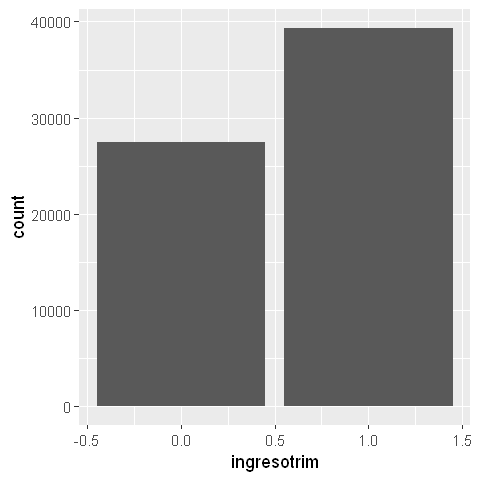

In [20]:
#se verán algunas de las gráficas de los datos:
genigh<-ggplot(data=enigh_t)
genigh+geom_bar(mapping = aes(x=ingresotrim))
#más de la mitad de los datos tiene un ingreso mayor a 12,000
table(enigh_t$ingresotrim)

Para ser ver de una mejor forma la proporción, se puede medir la proporción en porcentaje:

In [21]:
prop.table(table(enigh_t$ingresotrim))


        0         1 
0.4110405 0.5889595 

Aproximadamente un 58.89% de los encuestados tiene un ingreso trimestral debajo de $12,000$, mientras que los demás ganan por arriba de $12,000$

## gráficas sobre la edad

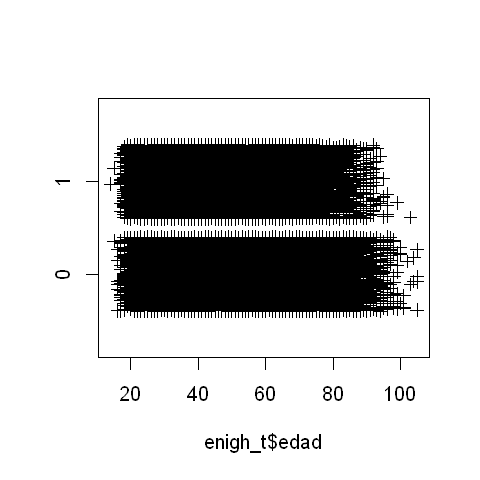

In [22]:
stripchart(enigh_t$edad~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

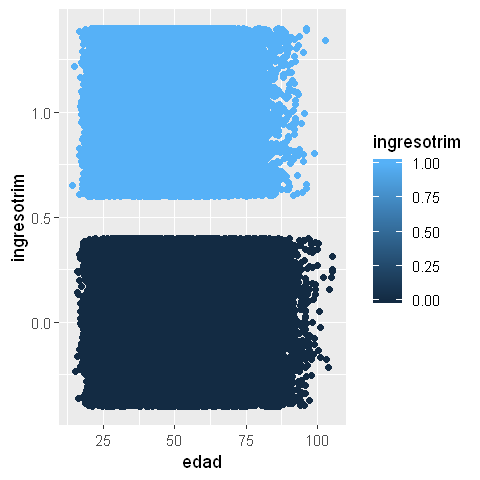

In [23]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=edad,y=ingresotrim,color=ingresotrim))

Al tener tantos datos, no se puede apreciar una diferencia con los presentes datos, pero con un diagrama de caja y brazos si se puede notar

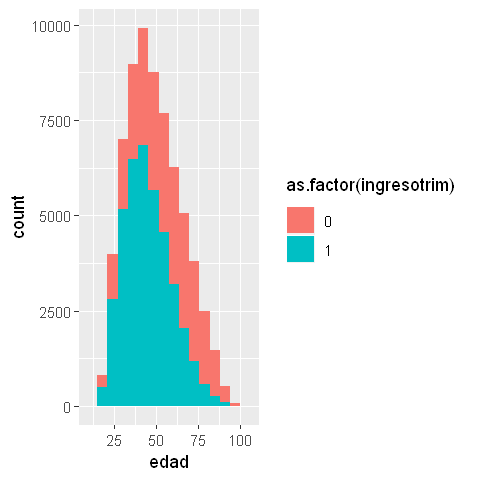

In [24]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=edad,fill=as.factor(ingresotrim)),bins=16)

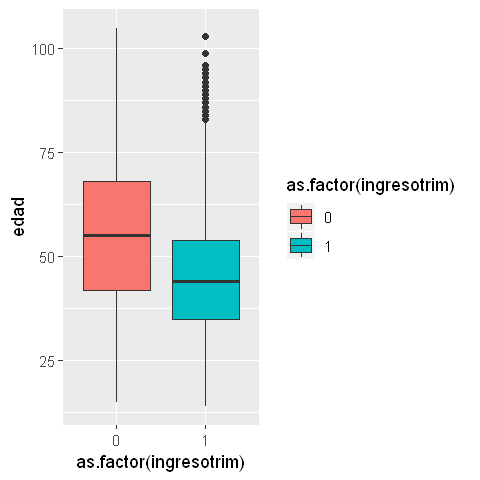

In [25]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=edad,fill=as.factor(ingresotrim)))
#conforme aumenta la edad, aumenta la proporción de personas que tienen un ingreso mayor a 12,000

al parecer, si habría diferencia con respecto a la edad... hay una mayor de personas

In [26]:
table(enigh_t$edad)


  14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29 
   1    2    6   30   90  133  250  309  413  534  646  710  807  878  977 1019 
  30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45 
1264 1102 1301 1351 1380 1336 1549 1454 1712 1551 1766 1415 1858 1734 1515 1637 
  46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61 
1582 1456 1603 1335 1607 1187 1473 1291 1287 1203 1383 1045 1164 1060 1250  821 
  62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77 
 934 1026  916  992  914  807  740  689  781  533  687  616  605  574  573  455 
  78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93 
 423  327  431  274  292  287  263  227  237  155  125  102   93   64   58   33 
  94   95   96   97   98   99  100  101  102  103  104  105 
  39   24   27   11   10    8    4    3    1    2    2    4 

Las edades podrían tender a una distribución normal

**RECOMENDACIÓN:MANTENER EDAD EN EL MODELO** 

In [27]:
#names(enigh_t)

## gráficas sobre hor_1

**hor_1** El tiempo, en horas, que las personas dedicaron a trabajar 

In [28]:
table(enigh_t$hor_1)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
20511   148   285   280   218   225   277   317   341   151   524    32   468 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   38   366   423   328    25   380    21   853   456    65    41   901   480 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
   66   109   526    24  1714    19   394    76    49  1149  1092    56   144 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
   57  4034    45  1234    82   312  1383   319    90  8393   402  2133   141 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
  292   109  1083   549  1527   125   219    53  3430    42   141   351   165 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
  240   391    50   168    41  1353    25  1410    36    49   115    64   175 
   78    79    80    81    82    83    84    85    

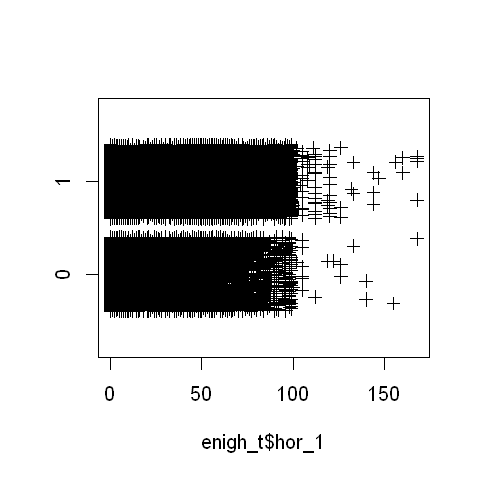

In [29]:
stripchart(enigh_t$hor_1~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

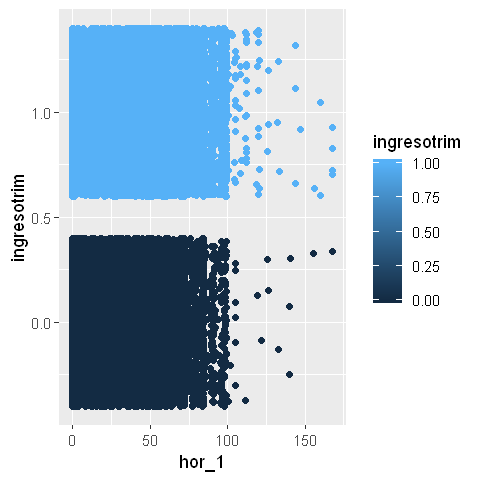

In [30]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=hor_1,y=ingresotrim,color=ingresotrim))

Al tener tantos datos, no se puede apreciar una diferencia con los presentes datos, pero con un diagrama de caja y brazos si se podría notar

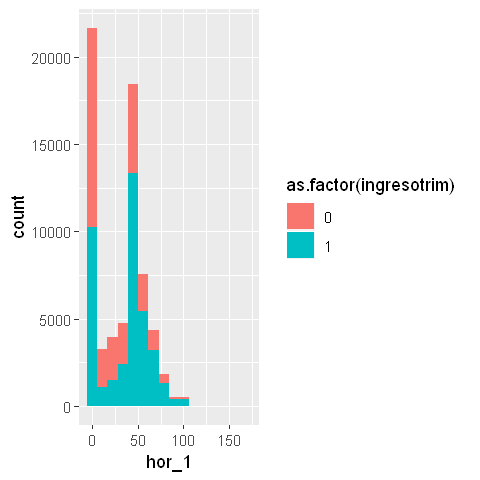

In [31]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=hor_1,fill=as.factor(ingresotrim)),bins=16)

Tenemos muchos casos en los que se reportó que trabajan 0 horas, pero tienen ingresos por arriba de 12,000... también tenemos algunos casos donde no ganan, pero la concentración de datos en el cero podría sesgar el resultado.

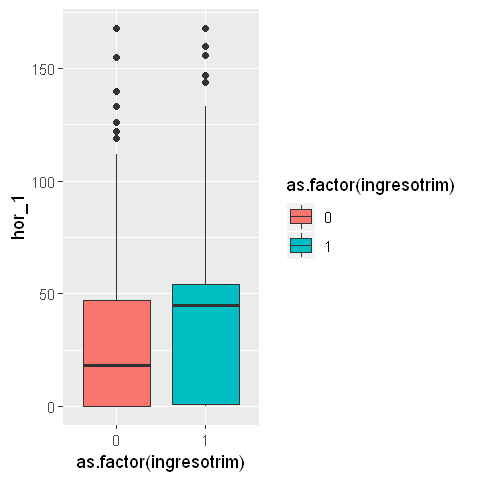

In [32]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=hor_1,fill=as.factor(ingresotrim)))

tenemos muchas personas que trabajan 0 horas... **¿Qué pasaría si quitamos a los que trabajan 0 horas?**

In [33]:
enigh_thor1masde0<-filter(enigh_t,enigh_t$hor_1>0)

In [34]:
table(enigh_thor1masde0$hor_1)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 148  285  280  218  225  277  317  341  151  524   32  468   38  366  423  328 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  25  380   21  853  456   65   41  901  480   66  109  526   24 1714   19  394 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  76   49 1149 1092   56  144   57 4034   45 1234   82  312 1383  319   90 8393 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
 402 2133  141  292  109 1083  549 1527  125  219   53 3430   42  141  351  165 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 240  391   50  168   41 1353   25 1410   36   49  115   64  175  146   24  301 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
  19   27   13  848   39   25   19   24   10  213   90   26    9   24   20  199 
  97   98   99  100  102  1

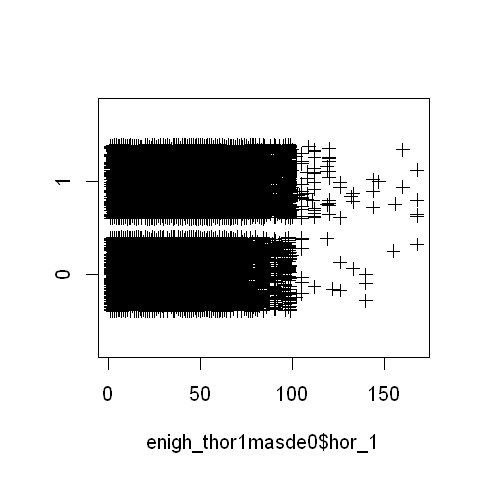

In [35]:
stripchart(enigh_thor1masde0$hor_1~enigh_thor1masde0$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

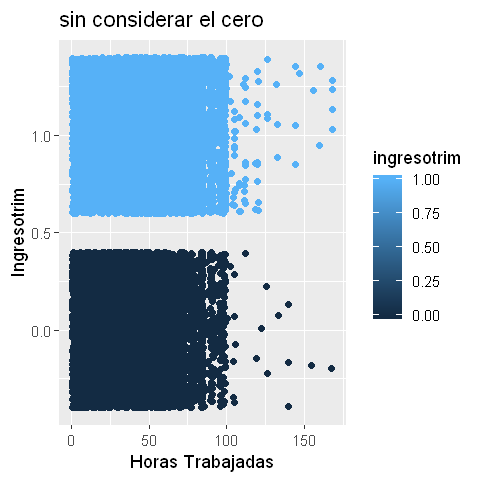

In [36]:
ggplot(data=enigh_thor1masde0)+geom_jitter(mapping = aes(x=hor_1,y=enigh_thor1masde0$ingresotrim,color=ingresotrim))+labs(title="sin considerar el cero",x="Horas Trabajadas",y="Ingresotrim")

Al tener tantos datos, no se puede apreciar una diferencia muy significativa con la presente gráfica, pero con un diagrama de caja y brazos si se podría notar.

Sin embargo, los datos de Horas Trabajadas en el hogar están un poquito más "estirados".

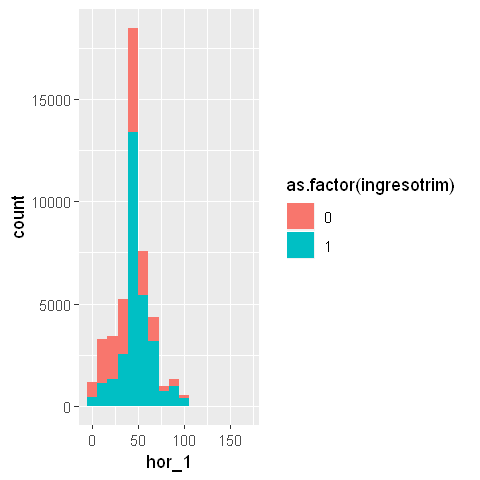

In [37]:
ggplot(data=enigh_thor1masde0)+geom_histogram(mapping = aes(x=hor_1,fill=as.factor(ingresotrim)),bins=16)

Se nota la gran cantidad de personas que trabajan aproximadamente 48 horas a la semana, lo que en teoría marca la ley... pero también se ven muchos casos en los que trabajan casi 100 horas a la semana... ¿es posible? si, pues es la cantidad de horas trabajadas en 1 semana por hogar, no quiere decir que sea exactamente la misma persona quien las trabajó.

En el caso de los hogares donde se laboraron 48 horas, podrían ser los hogares donde solo una persona trabaja y los demás habitantes del hogar no.

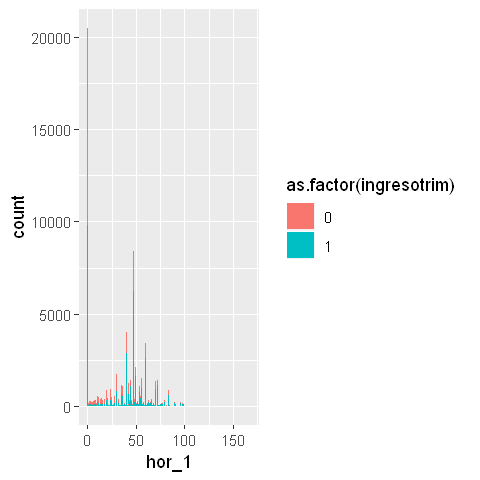

In [38]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=hor_1,fill=as.factor(ingresotrim)))
#Omitiendo a los que trabajan cero horas, el número de horas trabajadas si podría afectar al ingreso

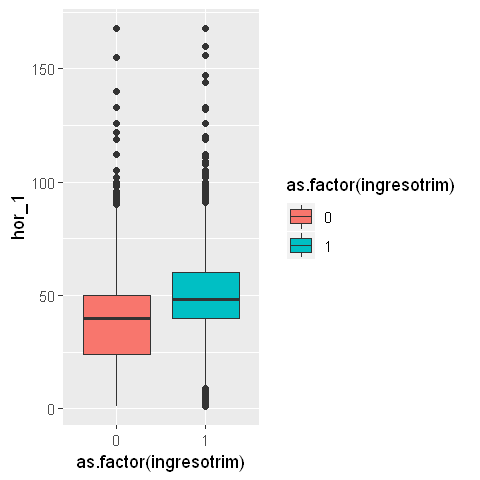

In [39]:
ggplot(data=enigh_thor1masde0)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=hor_1,fill=as.factor(ingresotrim)))

podría llegar a tener "cierta representatividad", si no se cuenta a las personas que trabajan 0 pesos. es decir, descartando a las personas que reciben pensiones, jubilaciones, herencias y/o no quisieron declarar sus horas trabajadas (posiblemente trabajo informal)

**RECOMENDACIÓN:MANTENER hor_1 EN EL MODELO** 

In [40]:
#names(enigh_t)

### gráficas sobre hijos_viv

**hijos_viv**: Producto del embarazo que al momento de su extracción o expulsión dio alguna señal de vida, tal como movimiento, latido del corazón, llanto o respiro, aunque después haya muerto.

In [41]:
table(enigh_t$hijos_viv)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
51387  1705  3175  3485  2183  1304   897   675   566   418   344   203   193 
   13    14    15    16    17    18    19    20    21 
  125    94    42    26    11     8     1     2     1 

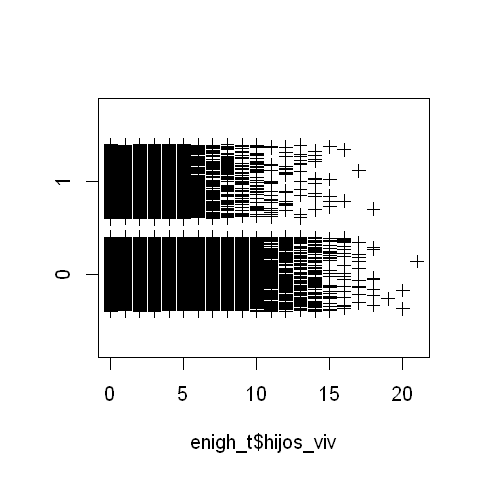

In [42]:
stripchart(enigh_t$hijos_viv~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

Al tener tantos datos, no se puede apreciar una diferencia con la presente gráfica, pero con un diagrama de caja y brazos si se podría notar.

Por otro lado, podría si existir diferencia.

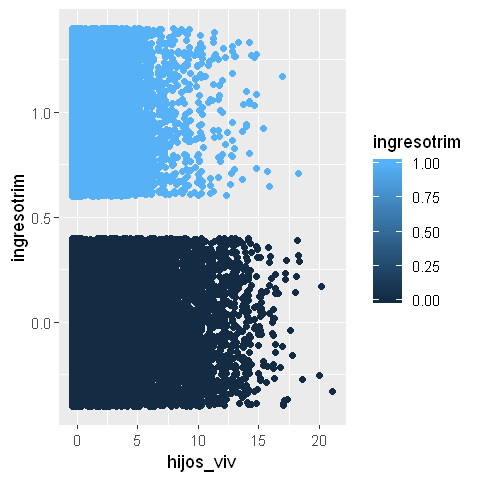

In [43]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=hijos_viv,y=ingresotrim,color=ingresotrim))

Aqui se puede ver que, según parece, al aumentar el número de hijos es menos probable tener un ingreso mayor de 12,000

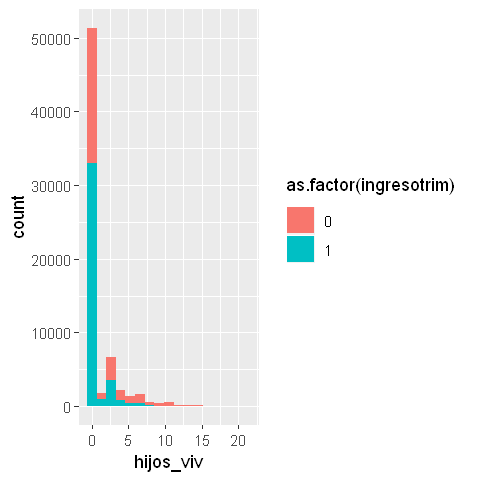

In [44]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=hijos_viv,fill=as.factor(ingresotrim)),bins=17)

al parecer tenemos algún dato atípico arriba de 15... para hacerle doble click analizaremos las estadísticas descriptivas de esta variable:

In [45]:
summary(enigh_t$hijos_viv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.9656  0.0000 21.0000 

21 hijos nacidos vivos en el caso de esta variable... ¿quien es?

In [46]:
conejo<-enigh_t[which.max(enigh_t$hijos_viv),]
conejo

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,renta,estim_pago,...,tot_hom,tot_muj,tot_hog,factor,clave_entidad_num,codigo_rural_num,Entidad_Federativa,Ambito,casa_propia,suma_pago_hogar
2560292224,0,67,0,21,23,0,2,0,700,...,2,3,1,398,25,6,Sinaloa,Rural,Propia,700


Resulta ser una persona de 67 años, que vive en sinaloa en un ámbito rural, que **gana MENOS** de 12,000 en adelante trimestralmente...

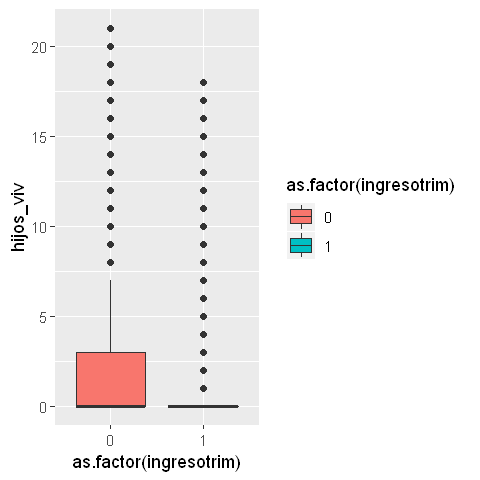

In [47]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=hijos_viv,fill=as.factor(ingresotrim)))

al existir muchas personas (en los datos) que no tienen hijos, las medidas de tendencia central se ven afectadas

In [48]:
table(enigh_t$hijos_viv)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
51387  1705  3175  3485  2183  1304   897   675   566   418   344   203   193 
   13    14    15    16    17    18    19    20    21 
  125    94    42    26    11     8     1     2     1 

**OJO**: de 66,845 observaciones, 51,387 no tienen hijos... esto puede provocar un sesgo en el modelo, pues solo se consideraron cerca de 11,500 con hijos... 

**RECOMENDACIÓN: Probar el modelo con hijos_viv y sin hijos_viv... probar la predicción**

## gráficas sobre antigüedad

**antigüedad** Tiempo que tiene la vivienda de haber sido construida. 

In [49]:
table(enigh_t$antiguedad)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
10672  1762  1204  1399  1373  1806  1703  1465  2183  1096  4597   814  1773 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
 1047  1052  3819  1210   792  1143   436  4882   324   697   595   499  2239 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
  489   375   541   201  4195   229   362   253   210  1209   362   167   270 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
  124  2529    74   168   125    99   501   162    53    91    38  1383    36 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
   51    34    43   136    55    19    19     9   567    13    21    10    11 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
   51    27    13    11    11   260     4     7     7     6    24    17     6 
   78    80    81    82    83    84    85    86    

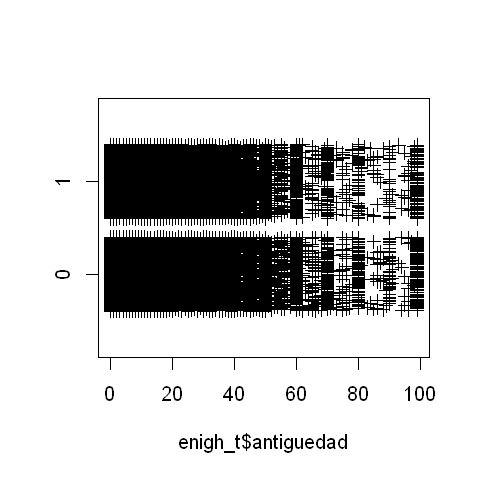

In [50]:
stripchart(enigh_t$antiguedad~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

No se nota mucha diferencia...

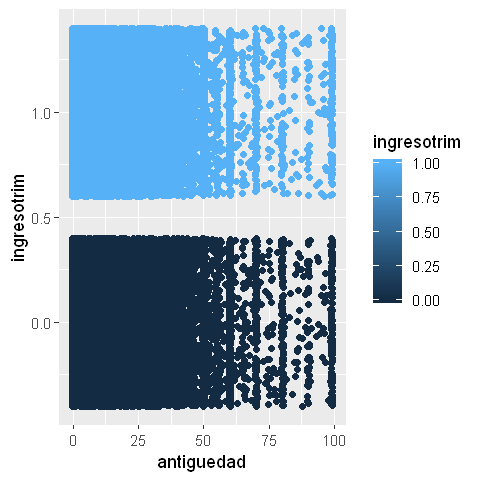

In [51]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=antiguedad,y=ingresotrim,color=ingresotrim))

No se nota una diferencia significativa

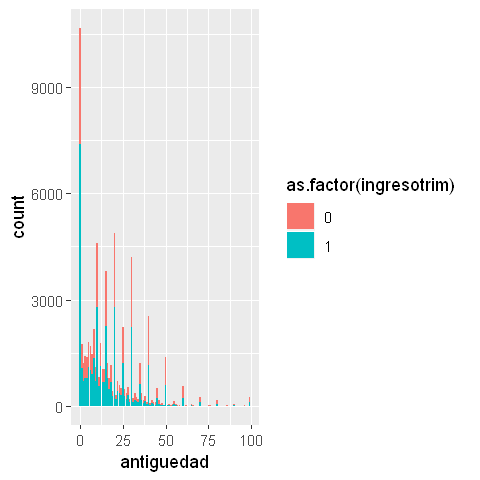

In [52]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=antiguedad,fill=as.factor(ingresotrim)))
#Esta variable parecería no tener mucha representatividad en el modelo de lo que se 
#busca predecir, esta variable será eliminada del modelo

Como puede notarse, tenemos una gran cantidad de personas cuya casa tiene antiguedad de 0 años (casa nueva) que tiene un ingreso mayor a 12,000. Se ve interesante, pero podría sesgar mis resultados...

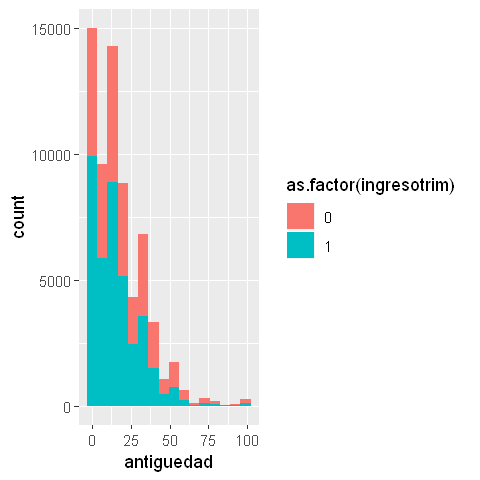

In [53]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=antiguedad,fill=as.factor(ingresotrim)),bins=16)

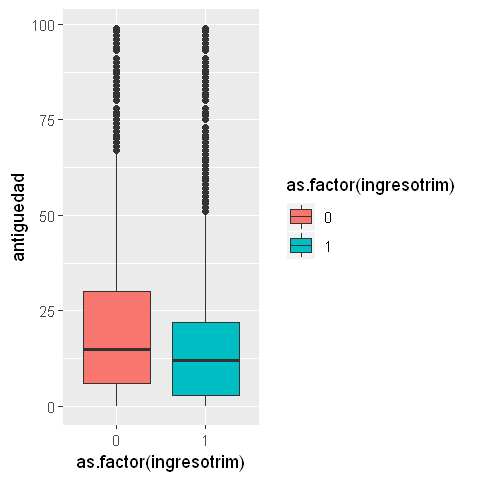

In [54]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=antiguedad,fill=as.factor(ingresotrim)))

al parecer esta variable podría definir algo en el modelo.

**RECOMENDACION:MANTENER antiguedad EN EL MODELO**

## gráficas con focos_inca

**focos_inca**: Número de focos incandescentes que se usan para iluminar la vivienda, tanto en el interior como en el exterior.

In [55]:
table(enigh_t$focos_inca)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
39734  6044  6357  4903  3617  2326  1533   800   541   246   308    84   107 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   31    30    63    17     8    12     5    29     6     5     1     4     5 
   26    27    28    29    30    31    32    33    35    40    50    61    98 
    1     1     2     1     9     3     3     1     3     1     2     1     1 

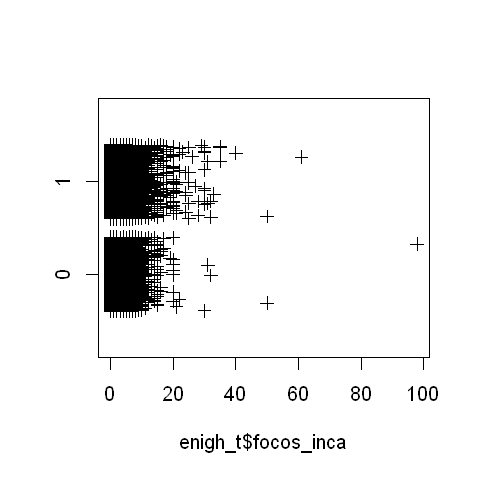

In [56]:
stripchart(enigh_t$focos_inca~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

Al parecer tenemos otra vez datos atípicos...

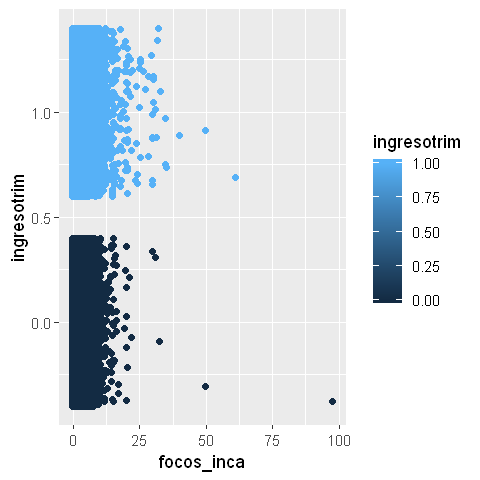

In [57]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=focos_inca,y=ingresotrim,color=ingresotrim))

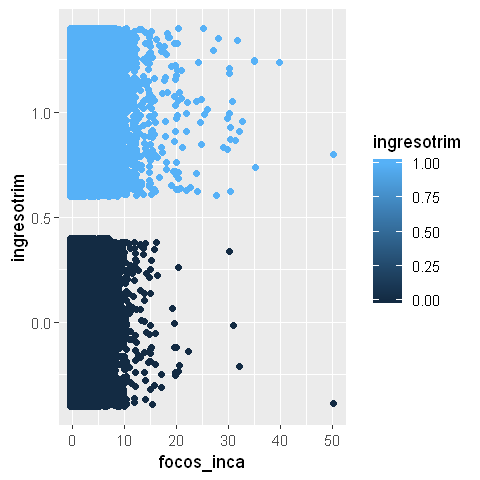

In [58]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=focos_inca,y=ingresotrim,color=ingresotrim))+
  coord_cartesian(xlim = c(0,50))

Parecería que a partir de 12.5 (aprox) focos, en adelamte, aumentan un poco las probabilidades de ganar arriba de 12,000

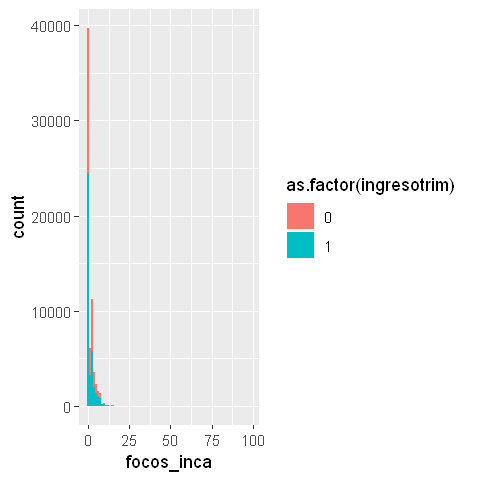

In [59]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=focos_inca,fill=as.factor(ingresotrim)),bins=80)

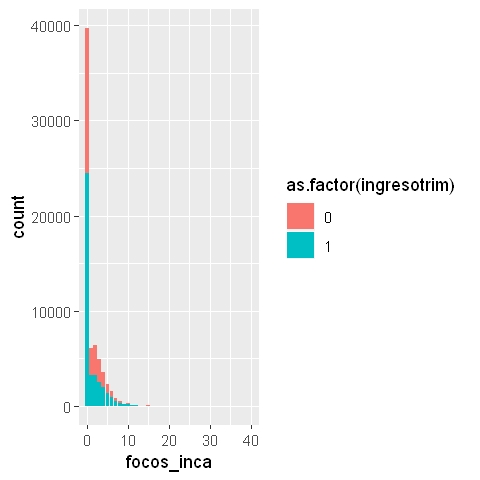

In [60]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=focos_inca,fill=as.factor(ingresotrim)))+
  coord_cartesian(xlim = c(0,40))

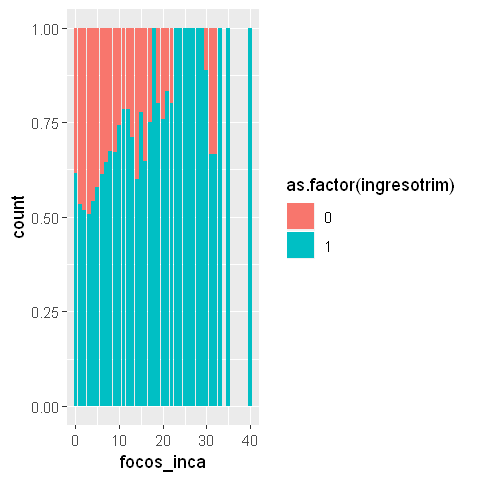

In [61]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=focos_inca,fill=as.factor(ingresotrim)),position = "fill")+
  coord_cartesian(xlim = c(0,40))

Hay una alta proporción de personas que ganan por arriba de 12,000 que usan focos incandescentes.

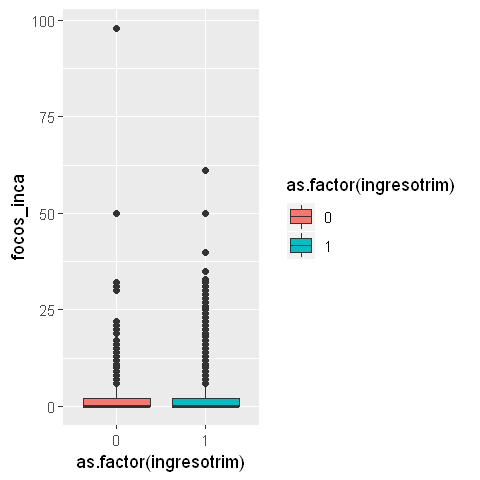

In [62]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=focos_inca,fill=as.factor(ingresotrim)))

al parecer no hay una diferencia tan grande entre estas variables.

**RECOMENDACION:MANTENER focos_inca EN EL MODELO**

## gráficas con focos_ahor

**focos_ahor**: Número de focos ahorradores que se usan para iluminar la vivienda, tanto en el interior como en el exterior.

In [63]:
table(enigh_t$focos_ahor)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
9239 3336 5990 7708 8194 7289 6511 4422 3979 1851 2853  761 1233  418  413  748 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 256  146  186   69  431   48   79   39   47  137   27   28   26    9  152    5 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   48 
  14    9    5   29    4    2    5    2   51    3    3    1    5    9    2    2 
  49   50   53   54   55   56   57   60   63   65   70   73   74   75   80   86 
   1   36    1    2    1    2    1    7    1    1    2    1    1    1    2    1 
  88   89   99 
   1    1    6 

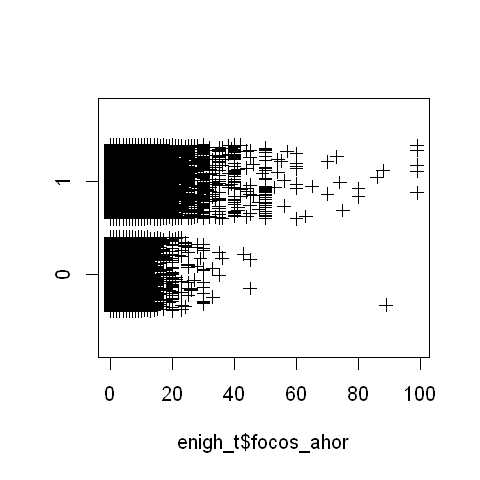

In [64]:
stripchart(enigh_t$focos_ahor~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

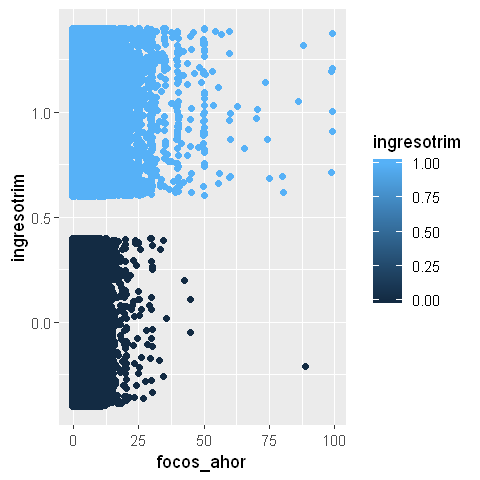

In [65]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=focos_ahor,y=ingresotrim,color=ingresotrim))

parece existir una gran diferencia en esta variable, pues las personas con mayores ingresos parecen si tener más focos.

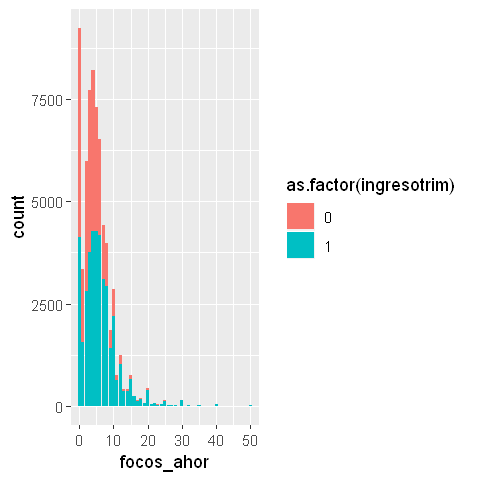

In [66]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=focos_ahor,fill=as.factor(ingresotrim)))+
  coord_cartesian(xlim = c(0,50))

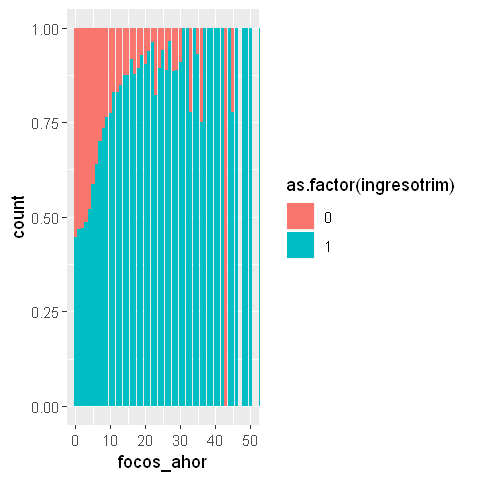

In [67]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=focos_ahor,fill=as.factor(ingresotrim)),position = "fill")+
  coord_cartesian(xlim = c(0,50))#+facet_wrap(~ingresotrim)

un poco en comparación con los focos incandescentes, se ve más dura la diferencia al aumentar el número de focos ahorradores.

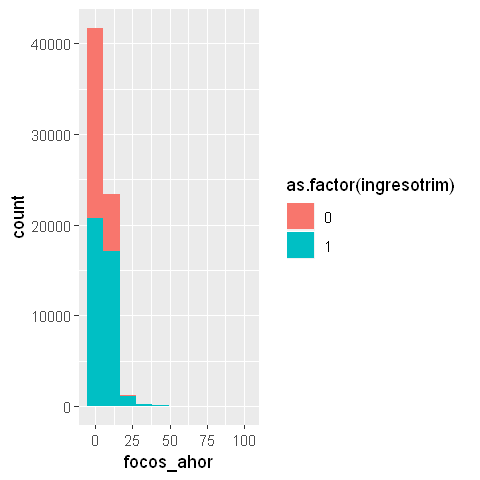

In [68]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=focos_ahor,fill=as.factor(ingresotrim)),bins=10)

Al ver la gráfica podríamos pensar que nuevamente hay un super atípico... evaluemos las estadísticas descriptivas.

In [69]:
summary(enigh_t$focos_ahor)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   5.165   7.000  99.000 

La mayor cantidad de focos en un hogar es 99...

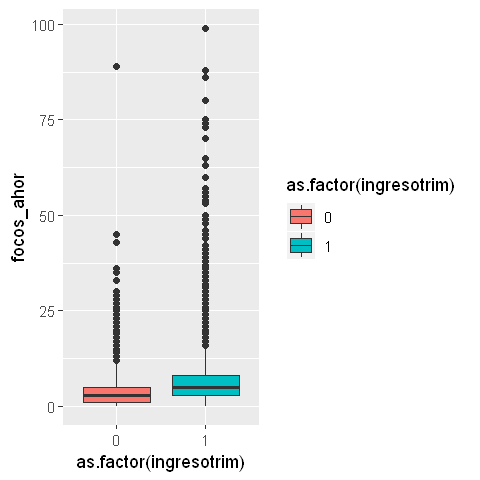

In [70]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=focos_ahor,fill=as.factor(ingresotrim)))

al parecer si hay una ligera distribución en cuanto a focos_ahor... mantener.

**RECOMENDACION:MANTENER focos_ahor en el modelo.**

## gráficas con renta

**renta**: Monto de la renta mensual.

In [71]:
table(enigh_t$renta)


    0   100   130   150   180   200   228   240   250   300   320   333   350 
58648     1     1     2     1    21     1     4    20    77     1     1    22 
  360   370   375   380   392   400   420   430   450   460   480   490   500 
    1     1     2     1     1   110     6     1    29     1     1     1   402 
  530   550   555   560   600   650   700   704   720   730   750   767   770 
    2    28     1     2   316    19   280     1     2     1    40     1     1 
  780   795   800   808   820   835   850   870   900   920   922   950  1000 
    2     1   564     1     1     1    49     1   178     2     1    22   944 
 1030  1050  1060  1100  1130  1140  1150  1200  1250  1300  1340  1350  1370 
    1     2     2   125     1     1     8   575    15   225     1    11     2 
 1400  1430  1450  1464  1500  1550  1600  1650  1660  1670  1700  1711  1730 
  152     1     6     1   870     4   155     5     1     2    92     1     1 
 1750  1800  1850  1864  1900  1920  1950  2000  20

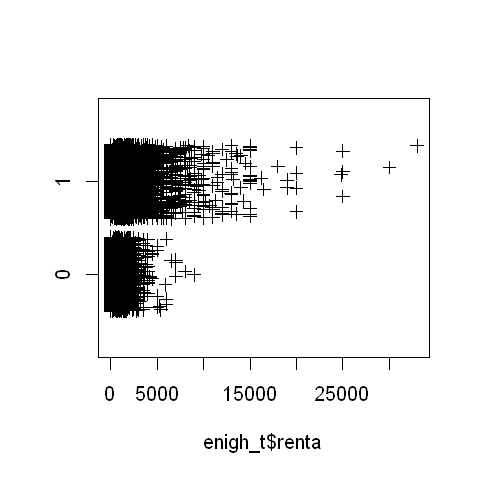

In [72]:
stripchart(enigh_t$renta~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

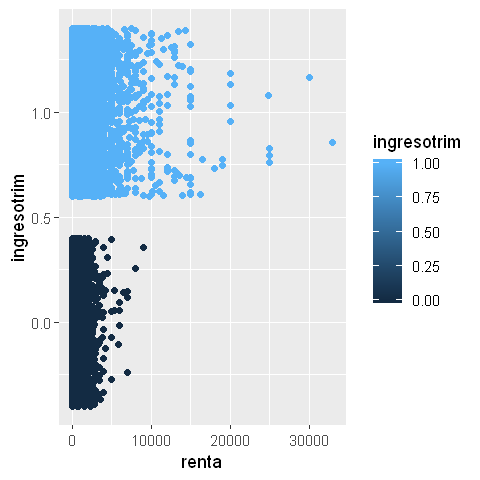

In [73]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=renta,y=ingresotrim,color=ingresotrim))

A diferencia de lo que pensé, hay una mayor cantidad de personas que rentan y ganan arriba de 12,000 contra las que no.

esta variable discriina totalmente... si pagas una renta de abajo de 12,000 podrías o no tener un ingreso menor a 12,000, pero si pagas mas de 12,000 de renta, seguro ganas más de 12,000.

Por otro lado, tenemos muchos ceros, que son las personas que tienen casa propia... se analizará la opción de separar.

Warning message:
"position_stack requires non-overlapping x intervals"

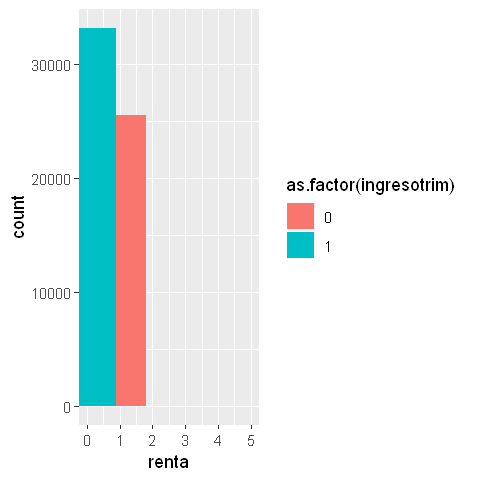

In [74]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=renta,fill=as.factor(ingresotrim)))+
  coord_cartesian(xlim = c(0,5))

Warning message:
"position_stack requires non-overlapping x intervals"

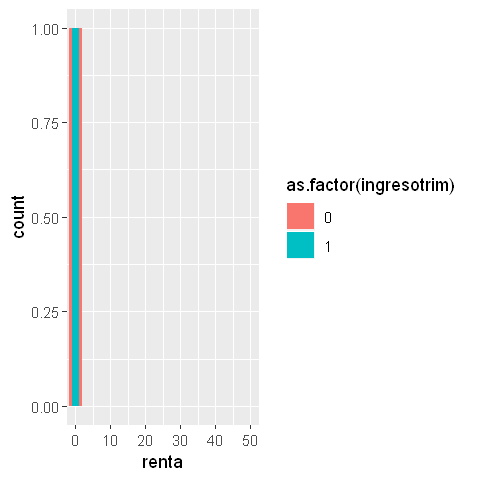

In [75]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=renta,fill=as.factor(ingresotrim)),position = "fill")+
  coord_cartesian(xlim = c(0,50))#+facet_wrap(~ingresotrim)

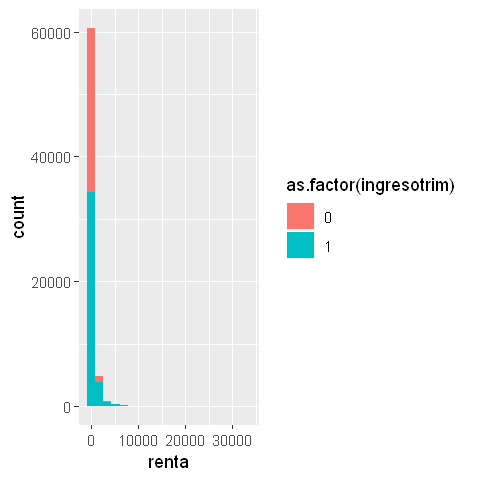

In [76]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=renta,fill=as.factor(ingresotrim)),bins=20)

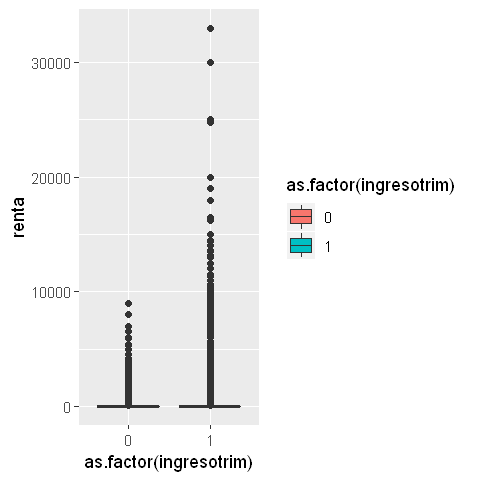

In [77]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=renta,fill=as.factor(ingresotrim)))

al parecer no hay una diferencia tan grande entre estas variables.

**RECOMENDACION:MANTENER renta en el modelo**

## gráficas con estim_pago

**estim_pago**: Valor estimado del alquiler mensual de la vivienda que habita el hogar.

In [78]:
table(enigh_t$estim_pago)


     0      1     10     50     80     90    100    150    180    200    220 
  8197      3      1      8      3      1    200     66      1    803      1 
   250    280    300    350    400    450    480    500    550    560    600 
    76      1   1642     54   1038     28      1   6122      7      1   1958 
   625    650    676    700    750    754    800    850    860    900    913 
     1     11      1   1387     18      1   4099     18      1    370      1 
   950    980   1000   1040   1050   1080   1100   1150   1160   1200   1206 
     5      1  10527      1      1      1    118      2      1   2862      1 
  1250   1300   1350   1360   1380   1400   1440   1450   1500   1550   1560 
     9    457      4      1      1    139      1      1   7944      2      1 
  1580   1600   1700   1750   1800   1847   1850   1880   1900   1964   2000 
     1    216    119      1    822      1      1      1     23      1   6103 
  2042   2100   2172   2200   2250   2300   2350   2400   2500 

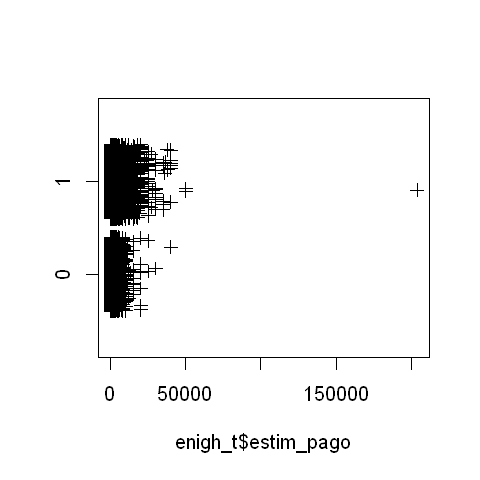

In [79]:
stripchart(enigh_t$estim_pago~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

No se nota mucha diferencia...

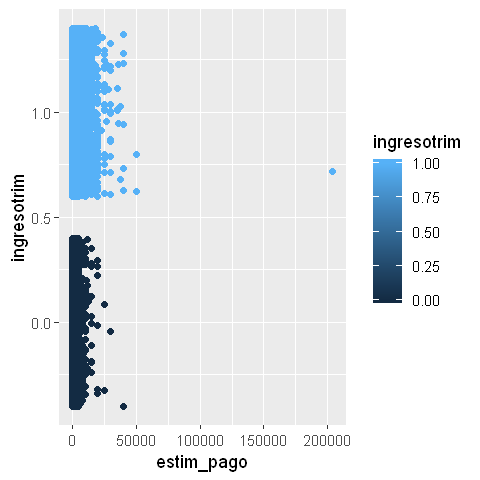

In [80]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=estim_pago,y=ingresotrim,color=ingresotrim))

parece que se me esconden algunos datos debido al atípico... voy a hacer zoom...

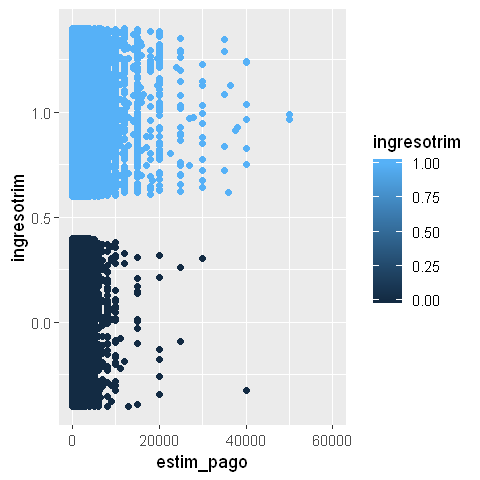

In [81]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=estim_pago,y=ingresotrim,color=ingresotrim))+coord_cartesian(xlim = c(0,60000))

Esta variable discrimina totalmente...

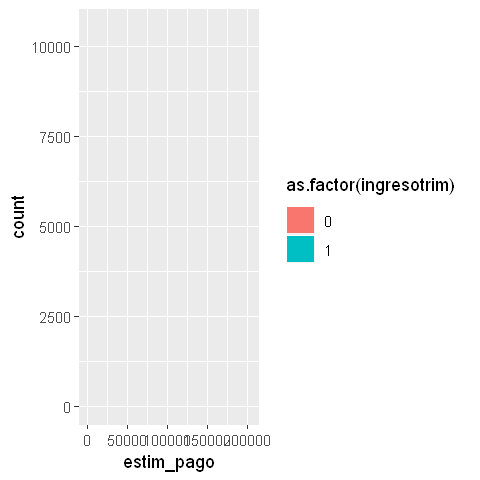

In [82]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=estim_pago,fill=as.factor(ingresotrim)))

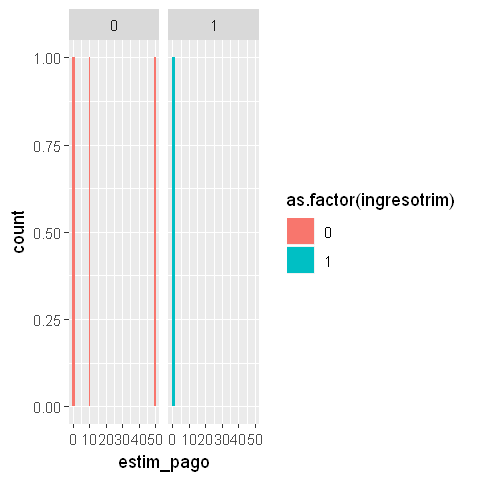

In [83]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=estim_pago,fill=as.factor(ingresotrim)),position = "fill")+
  coord_cartesian(xlim = c(0,50))+facet_wrap(~ingresotrim)

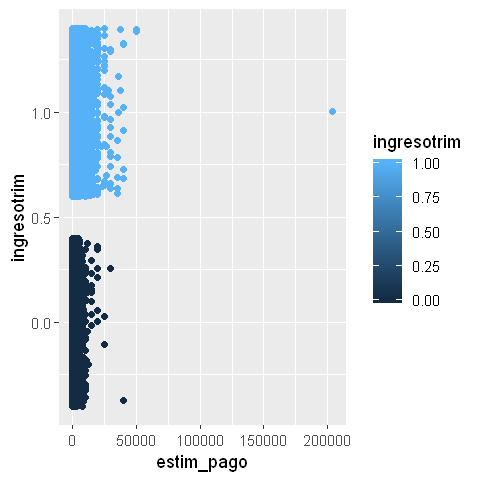

In [84]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=estim_pago,y=ingresotrim,color=ingresotrim))
#como sale "Slim" en la encuesta, lo quitamos por ser outlier

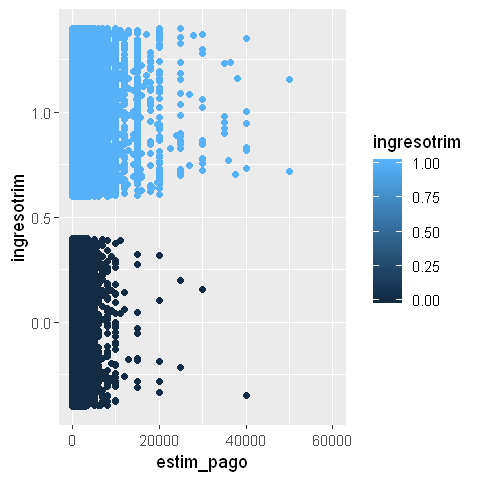

In [85]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=estim_pago,y=ingresotrim,color=ingresotrim))+
  coord_cartesian(xlim=c(0,60000))

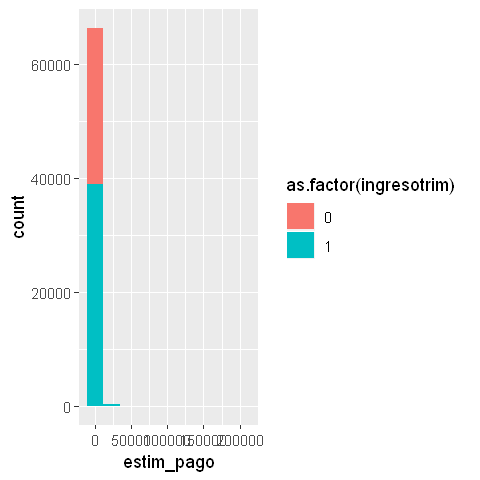

In [86]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=estim_pago,fill=as.factor(ingresotrim)),bins=10)

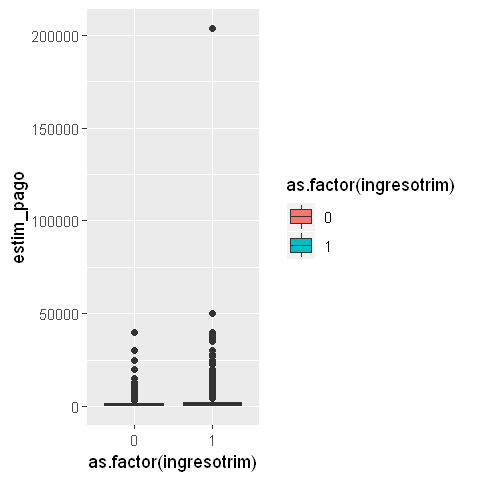

In [87]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=estim_pago,fill=as.factor(ingresotrim)))

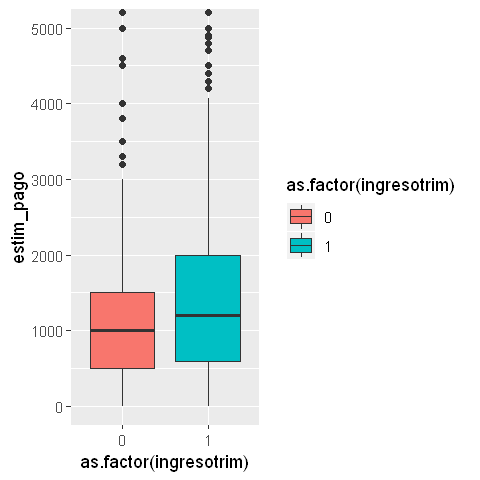

In [88]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=estim_pago,fill=as.factor(ingresotrim)))+
  coord_cartesian(ylim=c(0,5000))

parece que la variable puede servir...

**RECOMENDACION: MANTENER**

## gráficas con tot_resid

**tot_resid**: Número de personas que habitan la vivienda.

In [89]:
table(enigh_t$tot_resid)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
 7401 11687 12997 15031 10192  4820  2332  1184   582   278   153    79    48 
   14    15    16    17    18    19    21    22 
   16    19    12     5     3     4     1     1 

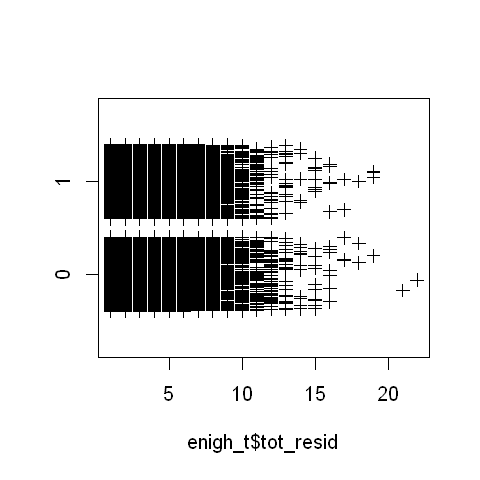

In [90]:
stripchart(enigh_t$tot_resid~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

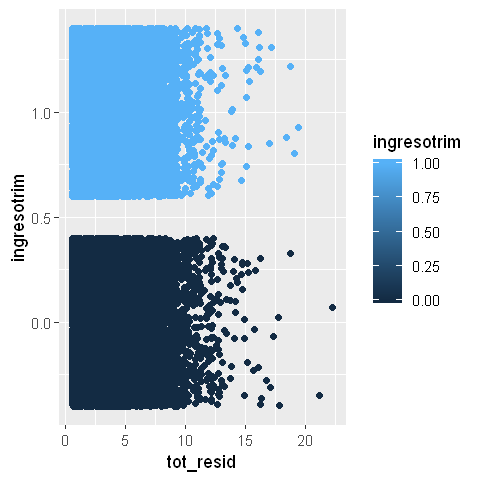

In [91]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=tot_resid,y=ingresotrim,color=ingresotrim))

No se nota mucha diferencia...

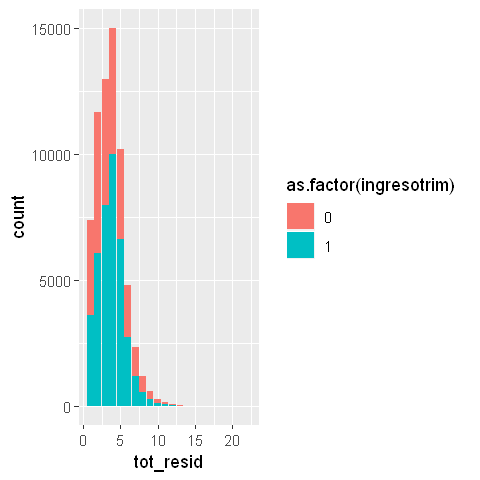

In [92]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_resid,fill=as.factor(ingresotrim)))

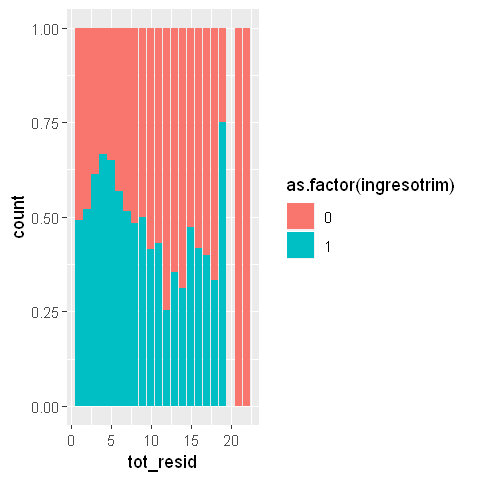

In [93]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_resid,fill=as.factor(ingresotrim)),position = "fill")

parece no representativo

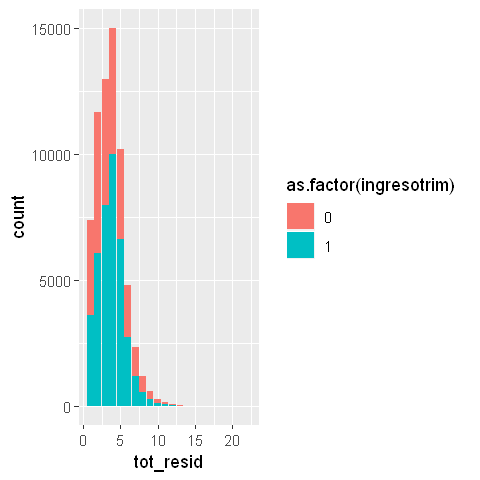

In [94]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_resid,fill=as.factor(ingresotrim)))

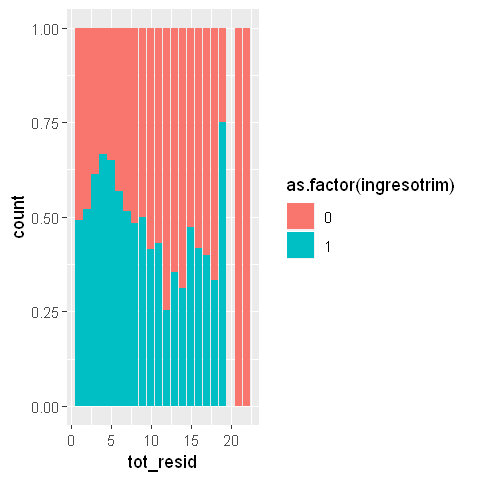

In [95]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_resid,fill=as.factor(ingresotrim)),position = "fill")

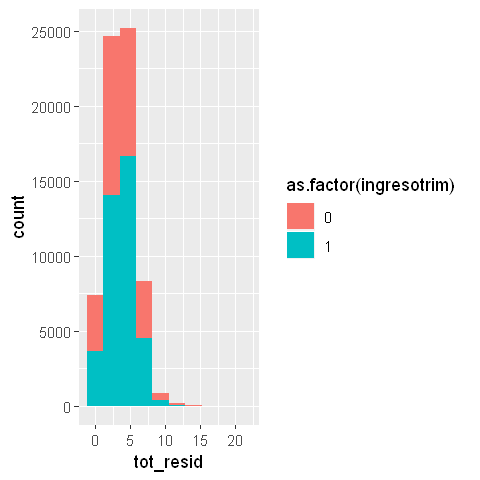

In [96]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=tot_resid,fill=as.factor(ingresotrim)),bins=10)

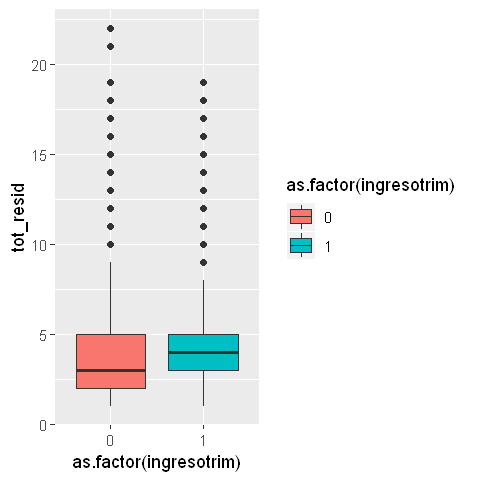

In [97]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=tot_resid,fill=as.factor(ingresotrim)))

al parecer no hay una diferencia tan grande entre estas variables.

**RECOMENDACION:QUITAR**

## gráficas con tot_hom

**tot_hom**: Número de personas hombres que habitan en la vivienda.

In [98]:
table(enigh_t$tot_hom)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
 5827 24898 20053 10597  3832  1102   345   126    40    15     6     3     1 

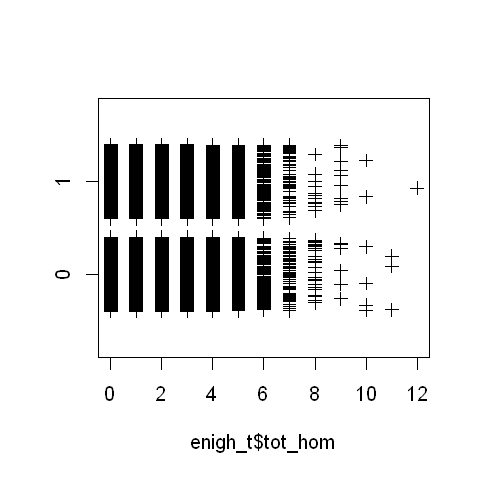

In [99]:
stripchart(enigh_t$tot_hom~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

No se nota mucha diferencia...

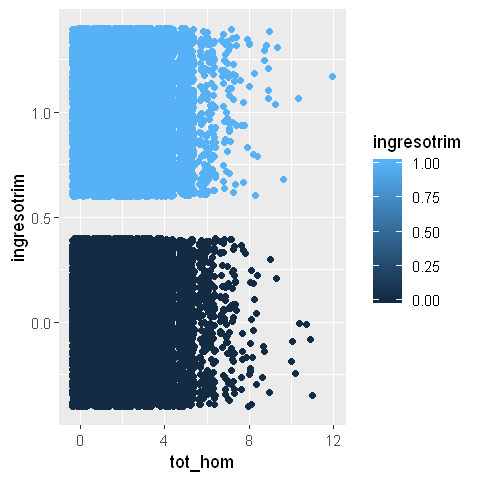

In [100]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=tot_hom,y=ingresotrim,color=ingresotrim))

podríamos decir que hay una ligera diferencia, mientras más hombres en el hogar, menores son los ingresos

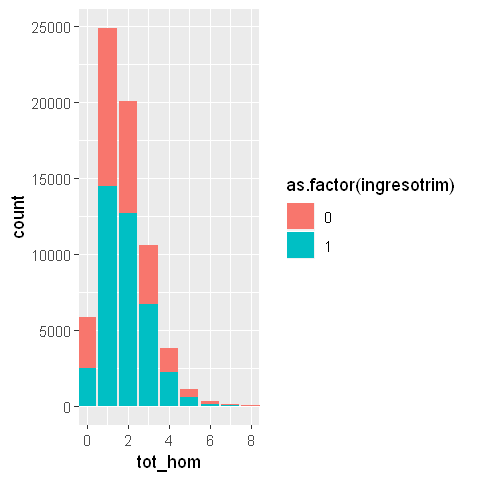

In [101]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_hom,fill=as.factor(ingresotrim)))+
  coord_cartesian(xlim = c(0,8))

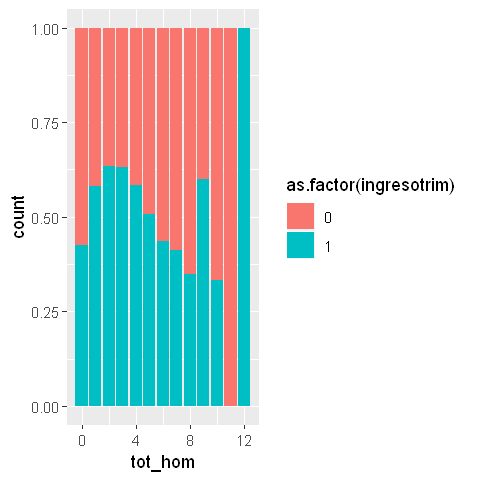

In [102]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_hom,fill=as.factor(ingresotrim)),position = "fill")

mientras más hombres hay en casa, al parecer disminuyen las probabilidades de ganar arriba de 12,000

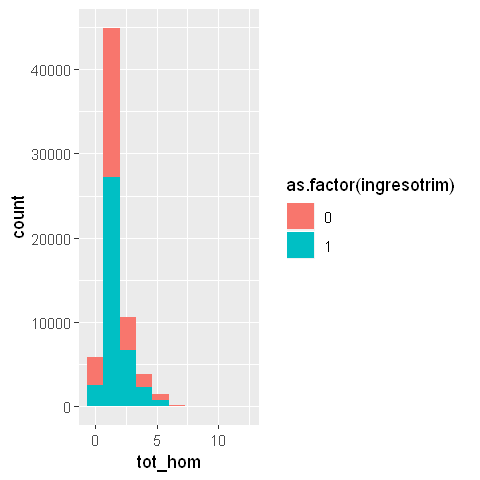

In [103]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=tot_hom,fill=as.factor(ingresotrim)),bins=10)

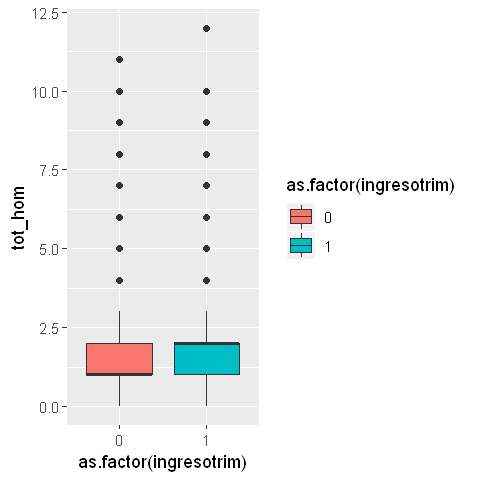

In [104]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=tot_hom,fill=as.factor(ingresotrim)))

la mediana se ve interesante... haremos zoom a 4 hombres

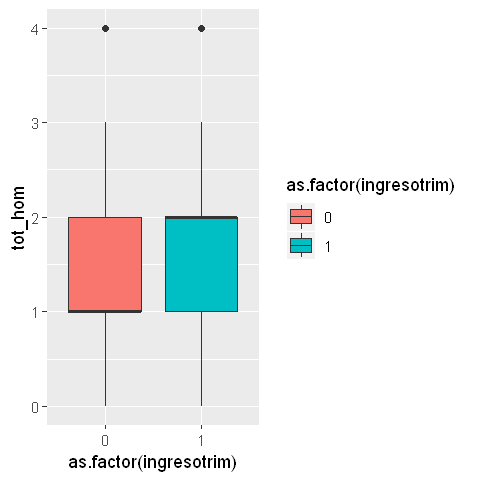

In [105]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=tot_hom,fill=as.factor(ingresotrim)))+
  coord_cartesian(ylim=c(0,4))

interesante diferencia en las medianas... mantener variable para ver el efecto

al parecer no hay una diferencia tan grande entre estas variables.

**RECOMENDACION:MANTENER**

## gráficas con tot_muj

**tot_muj**: Número de personas mujeres que habitan en la vivienda.

In [106]:
table(enigh_t$tot_muj)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
 5240 23880 20106 11163  4328  1401   490   138    67    18     7     5     1 
   14 
    1 

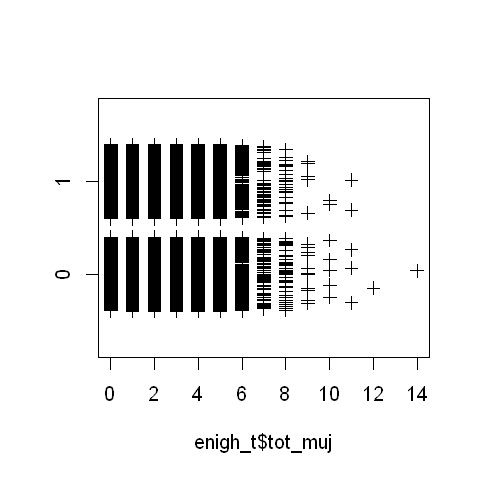

In [107]:
stripchart(enigh_t$tot_muj~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

No se nota mucha diferencia...

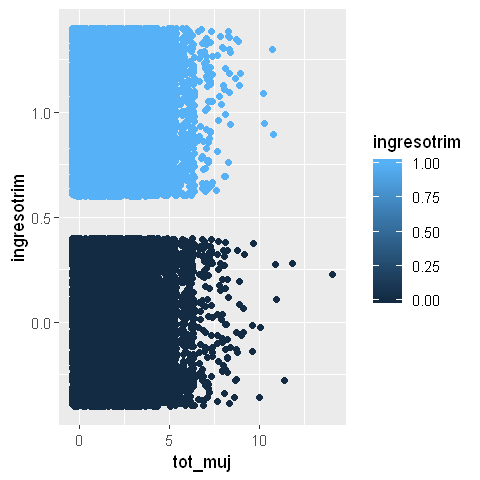

In [108]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=tot_muj,y=ingresotrim,color=ingresotrim))

A diferencia de la cantidad de hombres en el hogar, no se ve una diferencia tan fuerte en el caso de la cantidad de mujeres en el hogar.

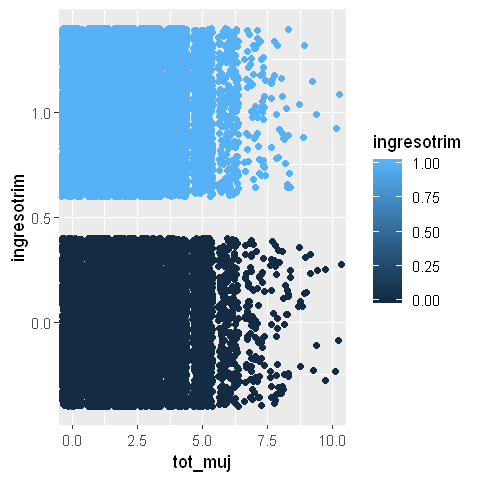

In [109]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=tot_muj,y=ingresotrim,color=ingresotrim))+
  coord_cartesian(xlim=c(0,10))

Efectivamente, no se ve una gran diferencia.

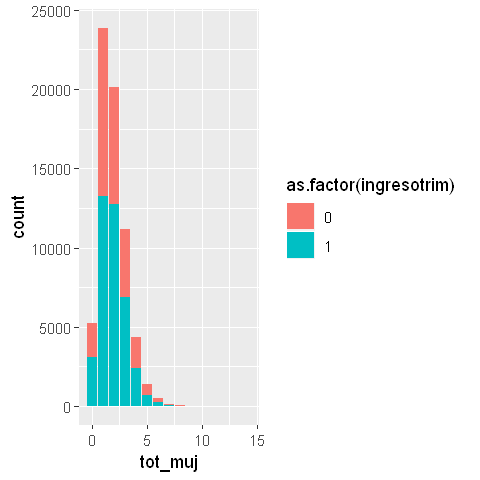

In [110]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_muj,fill=as.factor(ingresotrim)))

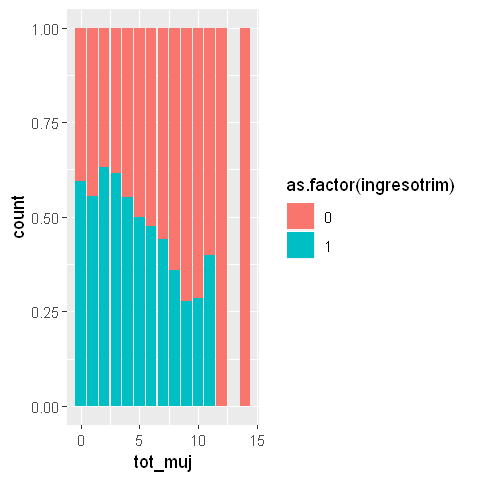

In [111]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_muj,fill=as.factor(ingresotrim)),position = "fill")

En esta gráfica si se nota una sutil diferencia... a medida que aumenta la cantidad de mujeres en el hogar disminuye la probabilidad de que se ganen 12,000 trimestrales...

supongo que tiene que ver con que el mientras el total de personas aumenta en el hogar, suelen ser hogares con menores recursos.

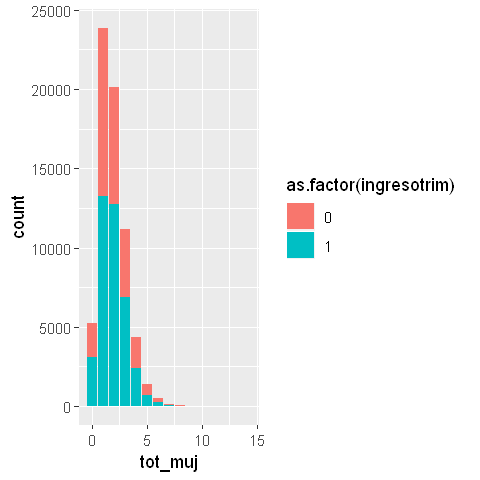

In [112]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_muj,fill=as.factor(ingresotrim)))
#tot_hom y tot_muj están correlacionadas con tot_resid, entonces se quitan ambas para
#dejar tot_resid, pues el comportamiento es prácticamente el mismo

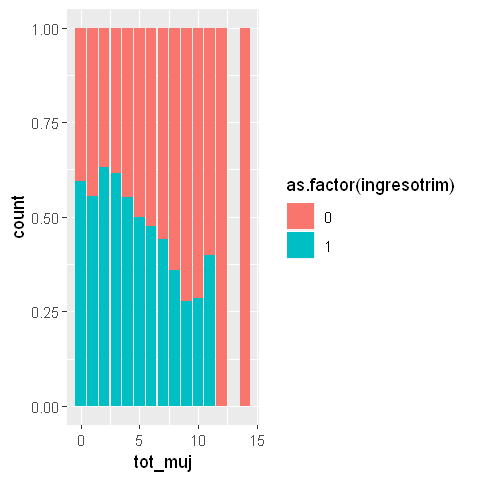

In [113]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_muj,fill=as.factor(ingresotrim)),position = "fill")

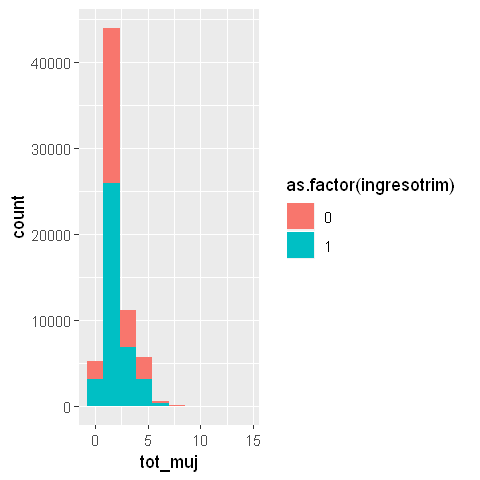

In [114]:
ggplot(data=enigh_t)+geom_histogram(mapping = aes(x=tot_muj,fill=as.factor(ingresotrim)),bins=10)

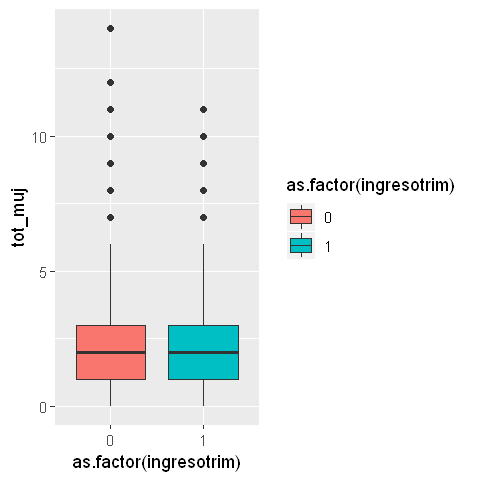

In [115]:
ggplot(data=enigh_t)+geom_boxplot(mapping = aes(x=as.factor(ingresotrim),y=tot_muj,fill=as.factor(ingresotrim)))

al parecer no hay una diferencia tan grande entre estas variables.

**RECOMENDACION:debería quitarse esta variable.**

## gráficas con tot_hog

**tot_hog**: Total de hogares en la vivienda.

In [116]:
table(enigh_t$tot_hog)


    1     2     3     4     5 
65882   848    95    18     2 

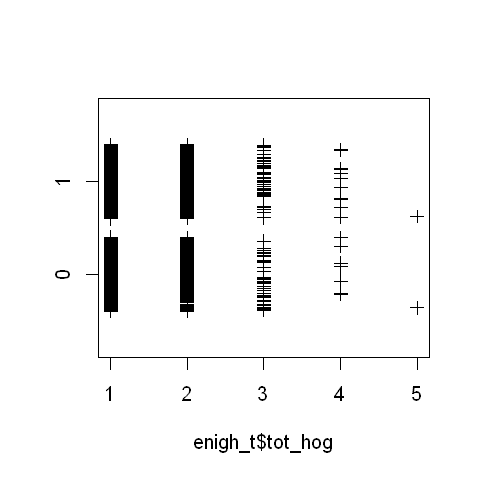

In [117]:
stripchart(enigh_t$tot_hog~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

No se nota mucha diferencia...

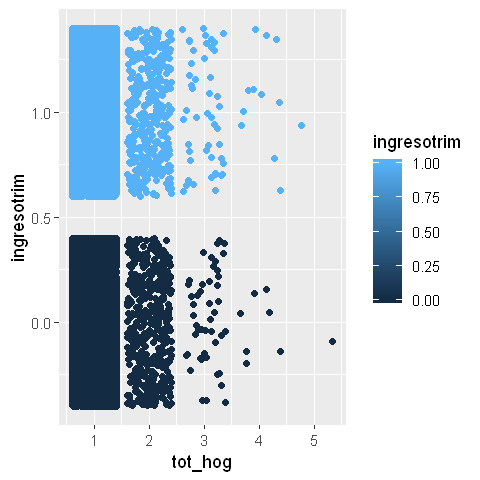

In [118]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=tot_hog,y=ingresotrim,color=ingresotrim))

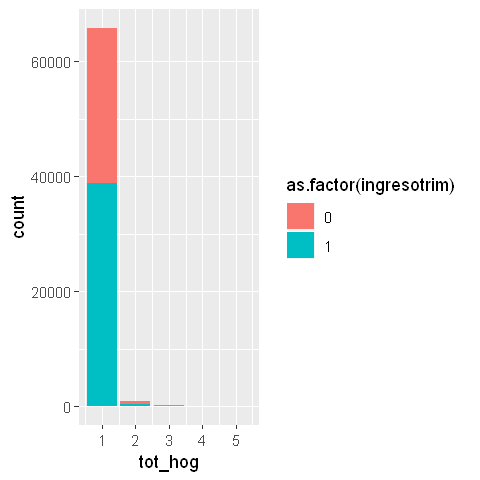

In [119]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=tot_hog,fill=as.factor(ingresotrim)))

casi todos los datos están concentrados en 1... va a sesgar el modelo, quitar

**RECOMENDACION: QUITAR**

## gráficas con factor

**factor**: Factor de expansión.
<br>Sinceramente, esta variable la agregué solo por curiosidad...

In [120]:
#table(enigh_t$factor)

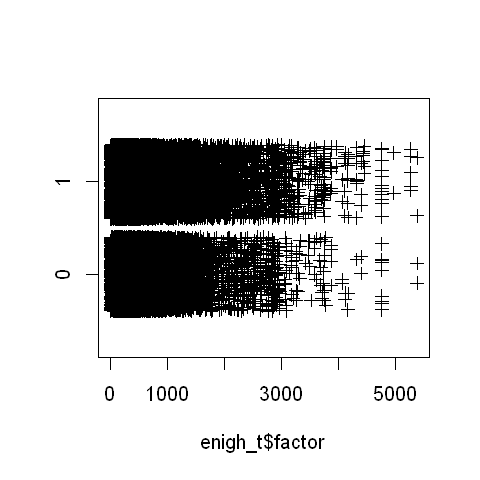

In [121]:
stripchart(enigh_t$factor~enigh_t$ingresotrim,
          method="jitter",
          jitter=.40,
          pch=3,
          cex=1)

No se nota mucha diferencia...

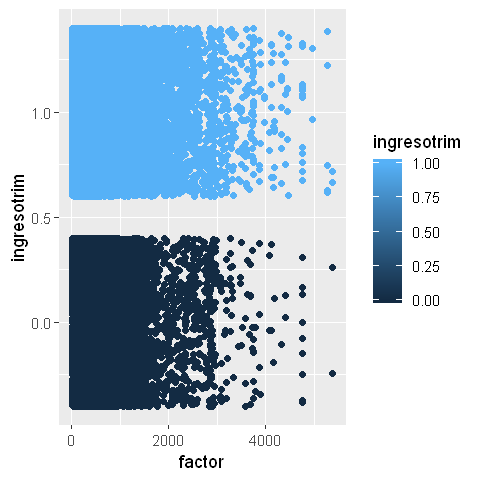

In [122]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=factor,y=ingresotrim,color=ingresotrim))

parece que el factor si discrimina... ¿qué es?

<img src= "factor.PNG">

no resulta muy descriptvo...

según el INEGI: 

<img src="explicacion_inegi.PNG">

Por lo tanto, como el objetivo es poder preguntar a CUALQUIER persona en la calle ciertos datos y saber si cumplen o no con un ingreso trimestral de 12,000... se elimina, pues no es posible usarla.

**RECOMENDACION: ELIMINAR**

## gráficas de variables calculadas:

### gráficas de Entidad_federativa

In [123]:
options(repr.plot.width=8, repr.plot.height=6)#esta línea sólo se ejecuta para jupyterlab con R

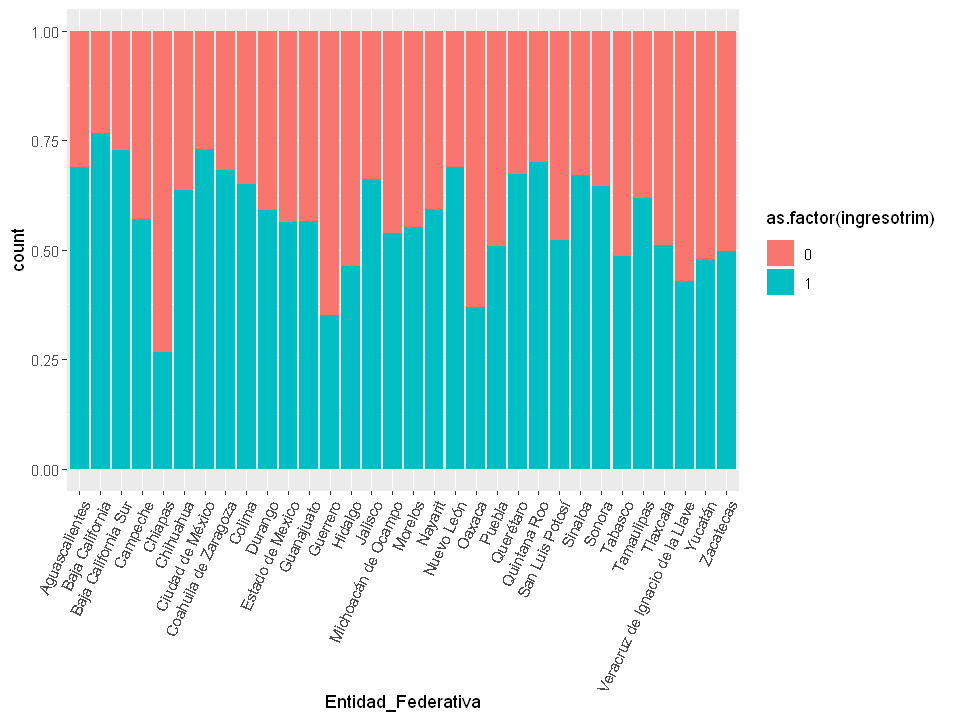

In [124]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=Entidad_Federativa,fill=as.factor(ingresotrim)),
                              position = "fill")+
  theme(axis.text.x = element_text(angle = 65,hjust = 1))
#hay entidades federativas en las que es más probable tener un ingreso mayor a 12,000 que en otras

Efectivamente hay algunas entidades que disminuyen la probabilidad de tener un ingreso mayor a 12,000

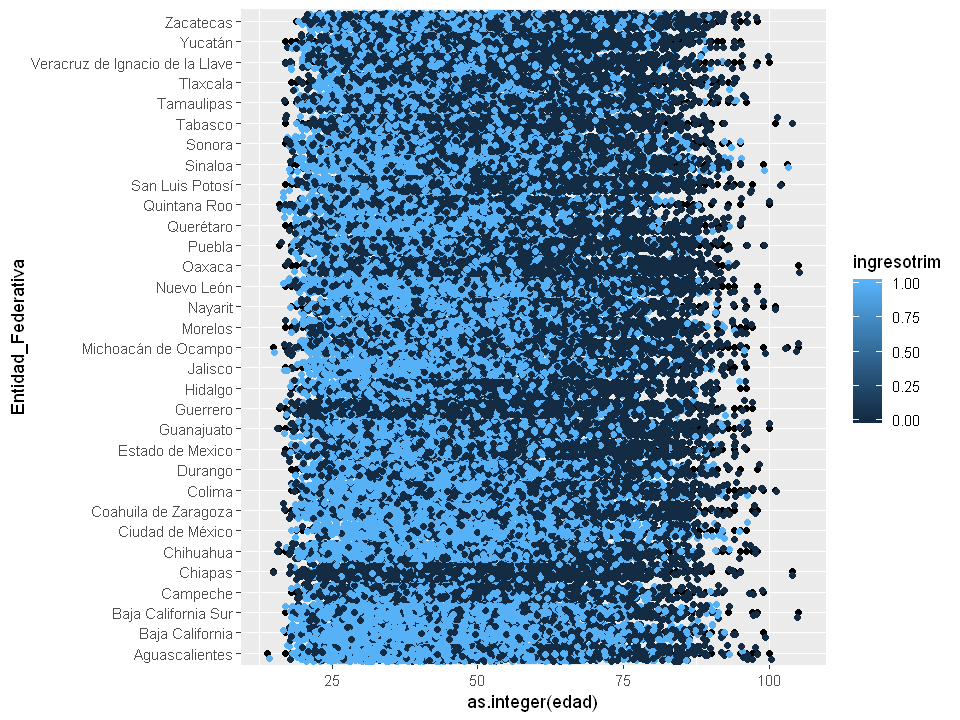

In [125]:
ggplot(data=enigh_t)+geom_point(mapping = aes(x=as.integer(edad),y=Entidad_Federativa))+
geom_jitter(mapping = aes(x=as.integer(edad),y=Entidad_Federativa,color=ingresotrim))


aqui se pueden ver 2 cosas... mientras aumenta la edad aumenta la probabilidad de tener un ingreso menor a 12,000, pero se ve mayor el efecto en algunos estados... esto resulta interesante, **MANTENER EN EL MODELO**

In [126]:
options(repr.plot.width=4, repr.plot.height=4)#esta línea sólo se ejecuta para jupyterlab con R

### gráficas de Ambito

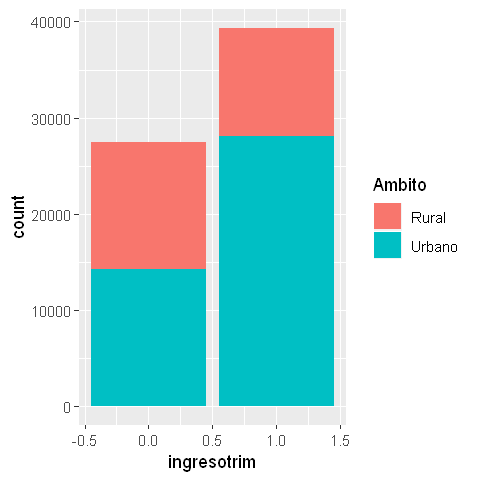

In [127]:
ggplot(data=enigh_t)+geom_bar(mapping = aes(x=ingresotrim,fill=Ambito))
#Parece que si es de un ambito urbano, es más probable que gane más de 12 mil pesos

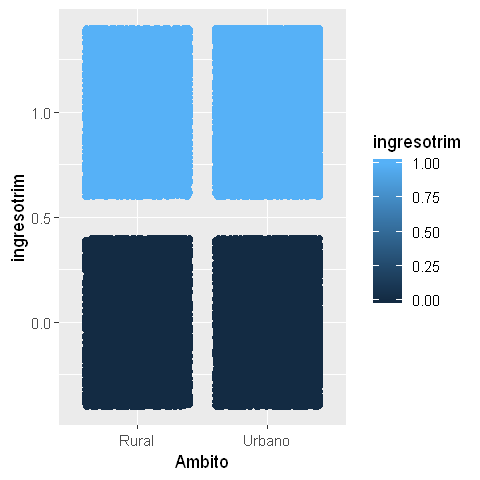

In [128]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=Ambito,y=ingresotrim,color=ingresotrim))

Esta gráfica no sirve para nada, pero la dejé solo para mostrarla.

In [129]:
options(repr.plot.width=8, repr.plot.height=6)#esta línea sólo se ejecuta para jupyterlab con R

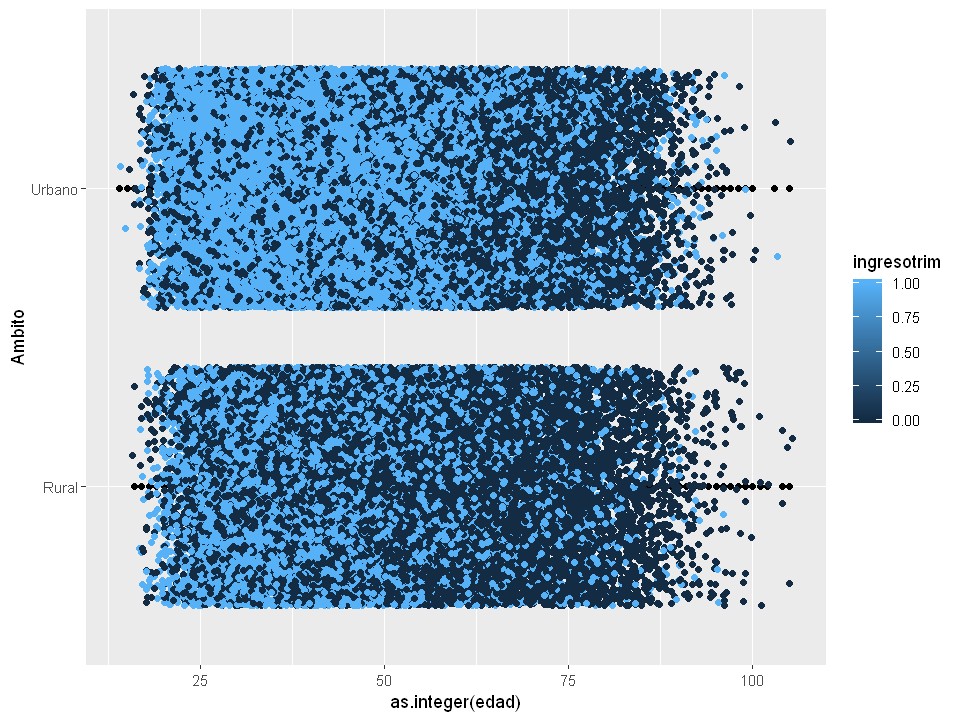

In [130]:
ggplot(data=enigh_t)+geom_point(mapping = aes(x=as.integer(edad),y=Ambito))+
geom_jitter(mapping = aes(x=as.integer(edad),y=Ambito,color=ingresotrim))


Como era de esperarse, en un ámbito rural se ve más afectado el incremento de edad al disminuir la probabilidad de ganar más de 12,000 pesos trimestrales... **MANTENER EN EL MODELO**

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


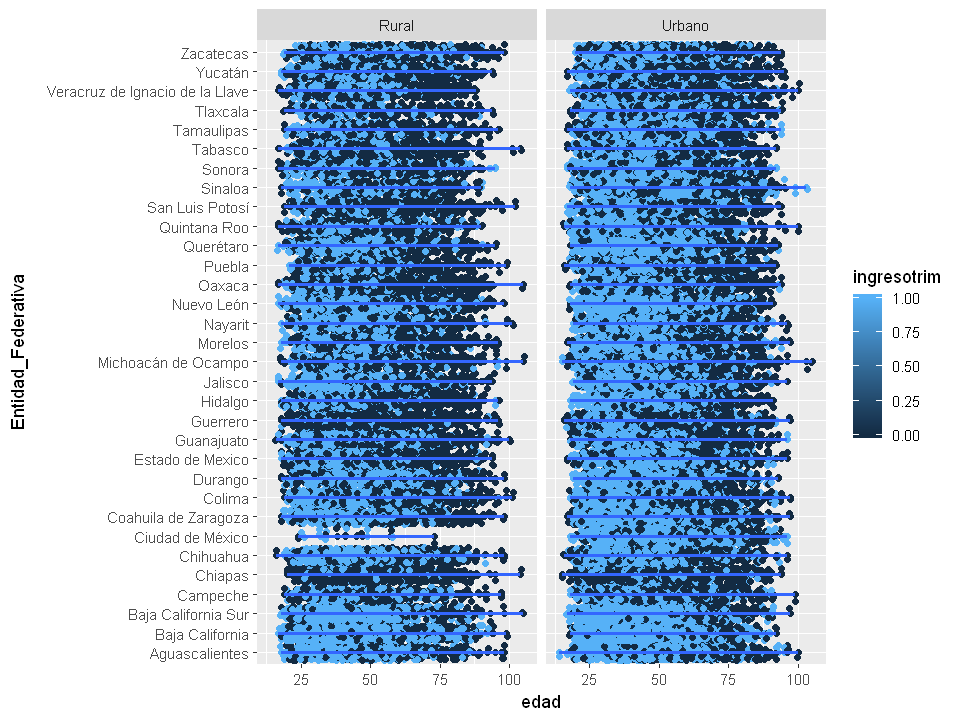

In [131]:
ggplot(data=enigh_t,mapping = aes(x=edad,y=Entidad_Federativa,color=ingresotrim))+
  geom_point()+
  geom_jitter()+
  geom_smooth()+
  facet_wrap(~Ambito)
#Se notan diferencias en cada entidad, entre ambito rural y urbano

Aqui se puede notar el efecto combinado de la edad y de vivir en una zona rural/urbana y en cierta entidad

### Gráficas con casa_propia

Esta variable la definí como tiene casa propia o no, dependiendo de renta y estim pago

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


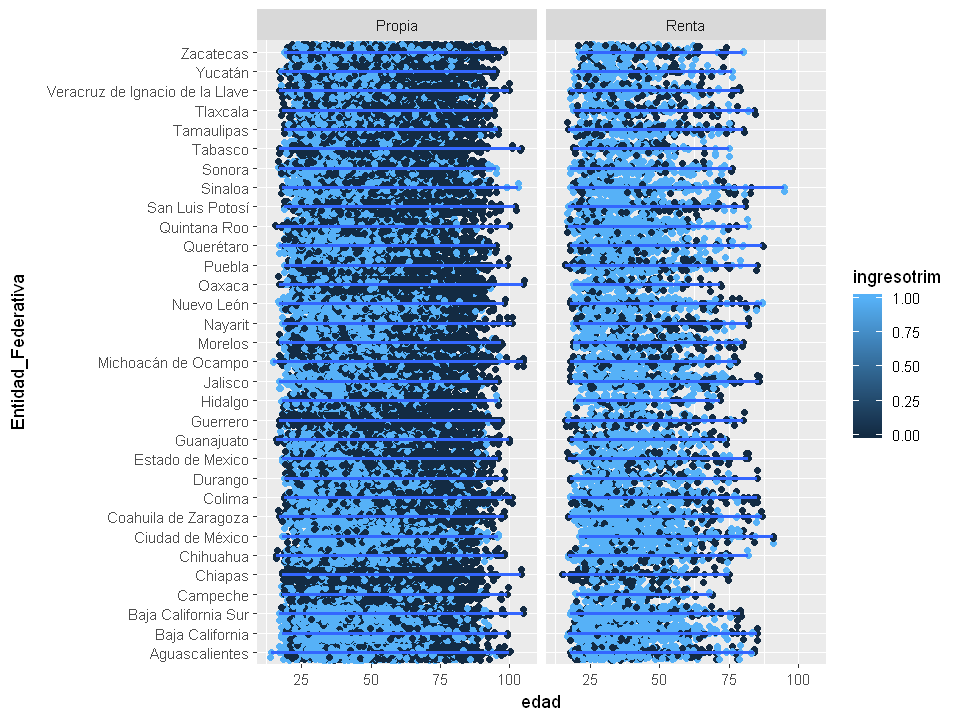

In [132]:
ggplot(data=enigh_t,mapping = aes(x=edad,y=Entidad_Federativa,color=ingresotrim))+
  geom_point()+
  geom_jitter()+
  geom_smooth()+
  facet_wrap(~casa_propia)
#Se notan diferencias en cada entidad, entre ambito rural y urbano

Se ve el efecto de tener casa propia o rentar conforme aumenta la edad en cada entidad... **MANTENER, PERO ENTONCES QUITAR RENTA Y ESTIM_PAGO**

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


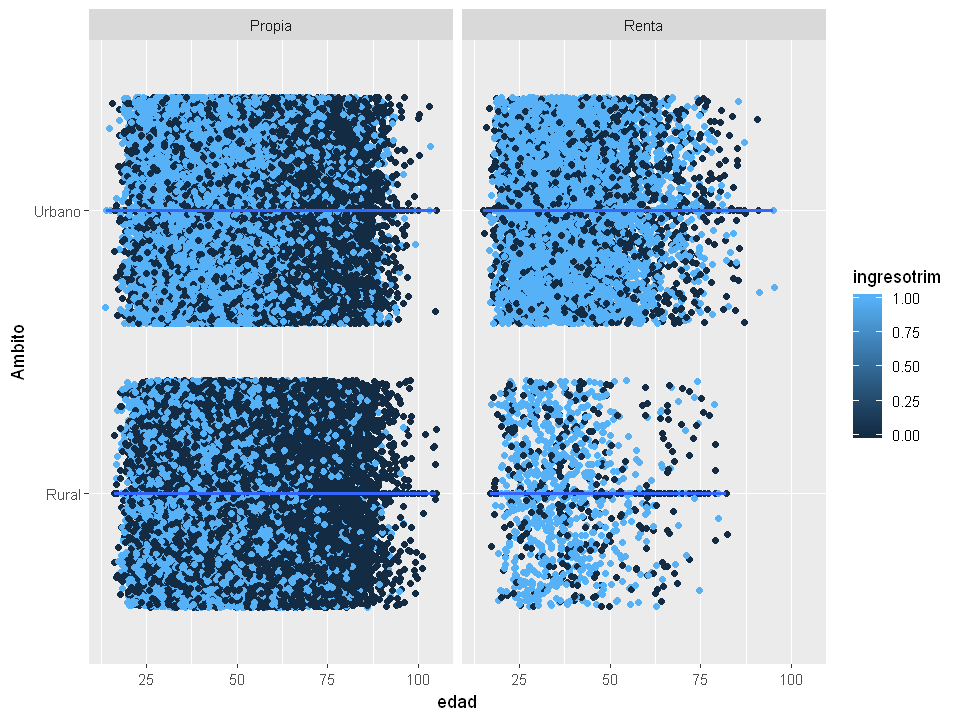

In [133]:
ggplot(data=enigh_t,mapping = aes(x=edad,y=Ambito,color=ingresotrim))+
  geom_point()+
  geom_jitter()+
  geom_smooth()+
  facet_wrap(~casa_propia)
#Se notan diferencias en cada entidad, entre ambito rural y urbano

Esta gráfica resulta interesante, pues muestra que mientras aumenta la edad, si puede verse afectado en mayor o menor medida si tienes casa propia/rentas y vives en un ambito rural/urbano

In [134]:
options(repr.plot.width=4, repr.plot.height=4)#esta línea sólo se ejecuta para jupyterlab con R

### gráficas de suma_pago_hogar

esta variable fue definida como el gasto total en el hogar, ya sea por renta o por estim_pago

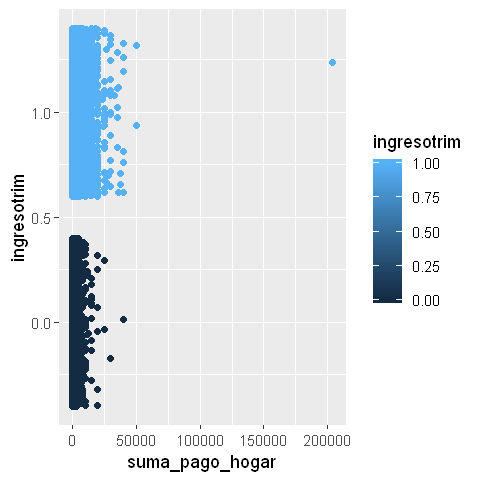

In [135]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=suma_pago_hogar,y=ingresotrim,color=ingresotrim))

nuevamente, el buen slim hace que no podamos ver los datos de los demás... haré zoom en todos los demás.

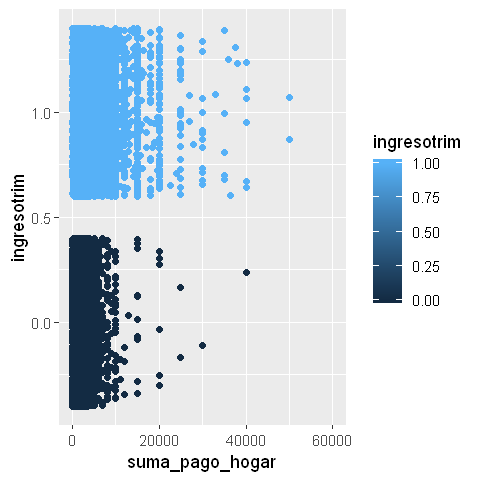

In [136]:
ggplot(data=enigh_t)+geom_jitter(mapping = aes(x=suma_pago_hogar,y=ingresotrim,color=ingresotrim))+
  coord_cartesian(xlim=c(0,60000))

parece que separa bien...

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


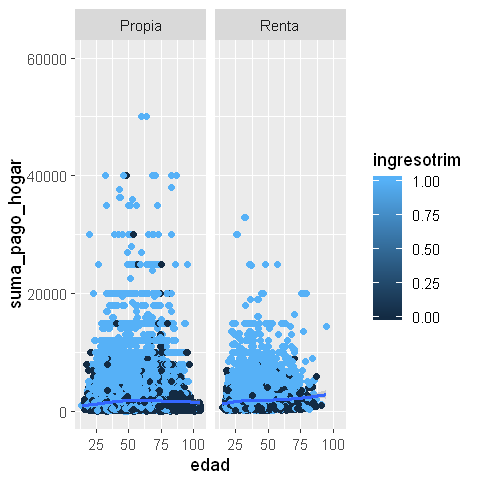

In [137]:
ggplot(data=enigh_t,mapping = aes(x=edad,y=suma_pago_hogar,color=ingresotrim))+
  geom_point()+
  geom_jitter()+
  geom_smooth()+
  facet_wrap(~casa_propia)+
  coord_cartesian(ylim=c(0,60000))
#Se notan diferencias en cada entidad, entre ambito rural y urbano

Esta gráfica se realizó con el objetivo de ver cual de las dos variables separa mejor... creo que casa_propia separa mejor, por lo que no usaré suma_pago_hogar **QUITAR**

# 3) CONSTRUYENDO LA BASE DE ENTRENAMIENTO Y PRUEBA (PREDICCIÓN)

## Resultados del Análisis Exploratorio:
1. **folioviv**:no usar como tal, de aqui salen otras variables.
2. **ingresotrim**: Variable a predecir.
3. **edad**: Mantener en el modelo.
4. **hor_1**: mantener en el modelo, pero probar al filtrar quitando el cero.
5. **hijos_viv**: probar con y sin esta variable, pues la proporción de ceros puede sesgar el modelo.
6. **antigüedad**: Mantener en el modelo.
7. **focos_inca**: Mantener en el modelo.
8. **focos_ahor**: Mantener en el modelo.
9. **renta**: Quitar.
10. **estim_pago**: Quitar.
11. **tot_resid**: Quitar.
12. **tot_hom**: Mantener en el modelo.
13. **tot_muj**: Mantener en el modelo.
14. **tot_hog**: Quitar.
15. **factor**: Quitar.
16. **clave_entidad_num**: Quitar.
17. **codigo_rural_num**: Quitar.
18. **Entidad_federativa**: Mantener en el modelo.
19. **Ambito**: Mantener en el modelo.
20. **casa_propia**: Mantener en el modelo.
21. **suma_pago_hogar**: Quitar.

Quitando variables del data set

In [138]:
#se quitan las variables del data set
enigh_t<-enigh_t[,-c(9,10,11,14,15:17,21)]
enigh_t$ingresotrim<- as.factor(enigh_t$ingresotrim)
enigh_t$Entidad_Federativa<- as.factor(enigh_t$Entidad_Federativa)
enigh_t$Ambito<- as.factor(enigh_t$Ambito)

#para revisar las variables que quedan:
head(enigh_t)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003801,1,33,40,0,0,3,8,1,1,Aguascalientes,Urbano,Renta
100003802,1,29,75,0,0,0,7,1,1,Aguascalientes,Urbano,Renta
100003803,1,47,0,0,20,0,17,2,4,Aguascalientes,Urbano,Propia
100003804,1,29,40,0,0,3,10,0,3,Aguascalientes,Urbano,Renta
100003805,1,55,37,0,7,0,12,2,0,Aguascalientes,Urbano,Propia
100010401,1,66,36,0,16,10,10,2,3,Aguascalientes,Urbano,Propia


In [139]:
names(enigh_t)

[1] "folioviv"           "ingresotrim"        "edad"              
 [4] "hor_1"              "hijos_viv"          "antiguedad"        
 [7] "focos_inca"         "focos_ahor"         "tot_hom"           
[10] "tot_muj"            "Entidad_Federativa" "Ambito"            
[13] "casa_propia"

Estadísticas descriptivas de las variables que mantuvimos:

In [140]:
summary(enigh_t$edad)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.00   37.00   47.00   49.13   60.00  105.00 

In [141]:
summary(enigh_t$hor_1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0    37.0    31.6    50.0   168.0 

In [142]:
summary(enigh_t$hijos_viv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.9656  0.0000 21.0000 

In [143]:
summary(enigh_t$antiguedad)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    5.00   14.00   17.18   25.00   99.00 

In [144]:
summary(enigh_t$focos_inca)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.358   2.000  98.000 

In [145]:
summary(enigh_t$focos_ahor)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   5.165   7.000  99.000 

In [146]:
summary(enigh_t$tot_hom)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   1.812   2.000  12.000 

In [147]:
summary(enigh_t$tot_muj)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   1.895   3.000  14.000 

Midiendo las correlaciones con el paquete corrplot

In [148]:
enigh_tcorrel<-c(enigh_t$ingresotrim,enigh_t$edad,enigh_t$hor_1,enigh_t$hijos_viv,enigh_t$antiguedad,enigh_t$focos_inca,enigh_t$focos_ahor,enigh_t$tot_hom,enigh_t$tot_muj)

In [149]:
enigh_t$ingresotrim<- as.integer(enigh_t$ingresotrim)
stats::cor(select(enigh_t,as.integer(ingresotrim):tot_muj),method = "pearson")
enigh_t$ingresotrim<- as.factor(enigh_t$ingresotrim)

,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj
ingresotrim,1.000000000,-0.298491765,0.245378460,-0.24257027,-0.13399417,-0.005268263,0.238958325,0.047426843,-0.002957672
edad,-0.298491765,1.000000000,-0.320591409,0.29204913,0.42664627,0.009885211,0.047279595,-0.141058188,-0.095216552
hor_1,0.245378460,-0.320591409,1.000000000,-0.23646767,-0.14343805,-0.001553795,-0.007190406,0.098625333,0.007626383
hijos_viv,-0.242570274,0.292049128,-0.236467672,1.00000000,0.11749938,0.018264091,-0.061500186,-0.193583978,0.081765081
antiguedad,-0.133994166,0.426646268,-0.143438050,0.11749938,1.00000000,0.017027349,0.046074708,-0.057839020,-0.026869626
focos_inca,-0.005268263,0.009885211,-0.001553795,0.01826409,0.01702735,1.000000000,-0.305676493,0.044735030,0.037235260
focos_ahor,0.238958325,0.047279595,-0.007190406,-0.06150019,0.04607471,-0.305676493,1.000000000,-0.009810307,0.018014839
tot_hom,0.047426843,-0.141058188,0.098625333,-0.19358398,-0.05783902,0.044735030,-0.009810307,1.000000000,0.234365382
tot_muj,-0.002957672,-0.095216552,0.007626383,0.08176508,-0.02686963,0.037235260,0.018014839,0.234365382,1.000000000


no hay variables correlacionadas de forma alta, la única que podría preocuparnos es edad vs antiguedad, pero no es tan grave.

# MODELO 1: **CON** HIJOS VIV Y **SIN FILTRAR** HOR_1

## Generando la base para este modelo

In [150]:
enigh_t_mod1<-enigh_t

In [151]:
head(enigh_t_mod1)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003801,2,33,40,0,0,3,8,1,1,Aguascalientes,Urbano,Renta
100003802,2,29,75,0,0,0,7,1,1,Aguascalientes,Urbano,Renta
100003803,2,47,0,0,20,0,17,2,4,Aguascalientes,Urbano,Propia
100003804,2,29,40,0,0,3,10,0,3,Aguascalientes,Urbano,Renta
100003805,2,55,37,0,7,0,12,2,0,Aguascalientes,Urbano,Propia
100010401,2,66,36,0,16,10,10,2,3,Aguascalientes,Urbano,Propia


In [152]:
names(enigh_t_mod1)

[1] "folioviv"           "ingresotrim"        "edad"              
 [4] "hor_1"              "hijos_viv"          "antiguedad"        
 [7] "focos_inca"         "focos_ahor"         "tot_hom"           
[10] "tot_muj"            "Entidad_Federativa" "Ambito"            
[13] "casa_propia"

## Plantando semilla y dividiendo la base en train y test

In [153]:
#insertando la semilla
set.seed(123972)
#obteniendo el 80% de los 66845 datos
66845*.8

#División de la base en 80% ajuste y 20% test
muestra<-sample(1:nrow(enigh),(nrow(enigh_t_mod1)*.8))
enigh_t_mod1_train<-enigh_t_mod1[muestra,]
enigh_t_mod1_test<-enigh_t_mod1[-muestra,]

[1] 53476

In [154]:
#asignandolas e forma de una tibble
enigh_t_mod1_train_t <- as_tibble(enigh_t_mod1_train)
enigh_t_mod1_test_t <- as_tibble(enigh_t_mod1_test)

In [155]:
#para que las imprima en forma de tibble
head(enigh_t_mod1_train_t)
head(enigh_t_mod1_test_t)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
2801907806,2,44,84,0,20,1,3,4,1,Tamaulipas,Urbano,Propia
1504414702,2,58,48,0,30,0,10,2,2,Estado de Mexico,Urbano,Propia
806716906,2,58,0,0,0,0,0,1,2,Chihuahua,Urbano,Propia
2760440001,1,37,0,0,15,0,12,3,3,Tabasco,Rural,Propia
860699511,2,75,60,0,20,0,4,1,1,Chihuahua,Rural,Propia
920370602,2,65,0,0,70,0,8,1,1,Ciudad de México,Urbano,Propia


folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003804,2,29,40,0,0,3,10,0,3,Aguascalientes,Urbano,Renta
100031903,2,54,48,0,40,6,0,3,1,Aguascalientes,Urbano,Propia
100062603,2,36,0,4,0,0,3,1,5,Aguascalientes,Urbano,Renta
100068001,1,73,0,0,51,0,6,1,1,Aguascalientes,Urbano,Propia
100068006,2,30,56,0,0,0,8,2,1,Aguascalientes,Urbano,Renta
100074205,2,25,43,0,0,0,6,2,1,Aguascalientes,Urbano,Renta


## Búsqueda del mejor modelo:

In [156]:
#?glm

In [157]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 1, todas las variables

# Ajustando la regresión logística

res_reglog_mod1_01<-glm(ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+
                    tot_muj+Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod1_train_t) 
summary(res_reglog_mod1_01)


Call:
glm(formula = ingresotrim ~ edad + hor_1 + hijos_viv + antiguedad + 
    focos_inca + focos_ahor + tot_hom + tot_muj + Entidad_Federativa + 
    Ambito + casa_propia, family = binomial(), data = enigh_t_mod1_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.7408  -0.8890   0.4327   0.8385   3.2404  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                        0.6517553  0.0783397   8.320
edad                                              -0.0348714  0.0007980 -43.700
hor_1                                              0.0146116  0.0004161  35.111
hijos_viv                                         -0.1810609  0.0061400 -29.489
antiguedad                                        -0.0028487  0.0007263  -3.922
focos_inca                                         0.1326307  0.0056162  23.616
focos_ahor                                         0.2025553  0.0038035  53.255
tot_hom

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.8108

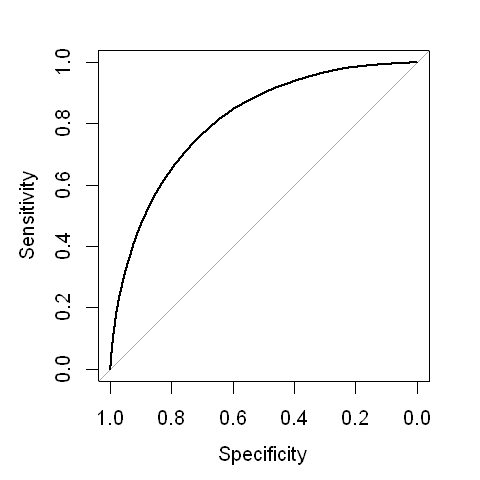

In [158]:
#curva roc con paquete ROCR
res_reglog_mod1_01roc<-roc(enigh_t_mod1_train_t$ingresotrim,as.vector(res_reglog_mod1_01$fitted.values))
plot(res_reglog_mod1_01roc)
auc(res_reglog_mod1_01roc)

In [159]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod1_01_pred_test<-predict(res_reglog_mod1_01,newdata=enigh_t_mod1_test_t,type="response")
table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod1_01_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  4586  824
            2  3361 4598

In [160]:
prop.table(table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod1_01_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34303239 0.06163513
            2 0.25140250 0.34392999

Como se vió en el análisis exploratorio de datos, tot_muj resulta no significativo, por lo que se elimina del modelo y se prueba nuevamente:

In [161]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 2, se quita tot_muj por no significativo

# Ajustando la regresión logística

res_reglog_mod1_02<-glm(ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+
                    +Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod1_train_t) 
summary(res_reglog_mod1_02)


Call:
glm(formula = ingresotrim ~ edad + hor_1 + hijos_viv + antiguedad + 
    focos_inca + focos_ahor + tot_hom + +Entidad_Federativa + 
    Ambito + casa_propia, family = binomial(), data = enigh_t_mod1_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.7248  -0.8888   0.4334   0.8389   3.2484  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                        0.6237545  0.0765557   8.148
edad                                              -0.0347107  0.0007921 -43.819
hor_1                                              0.0146229  0.0004161  35.142
hijos_viv                                         -0.1827912  0.0060604 -30.161
antiguedad                                        -0.0028454  0.0007264  -3.917
focos_inca                                         0.1319808  0.0055995  23.570
focos_ahor                                         0.2020590  0.0037895  53.321
tot_hom         

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.8108

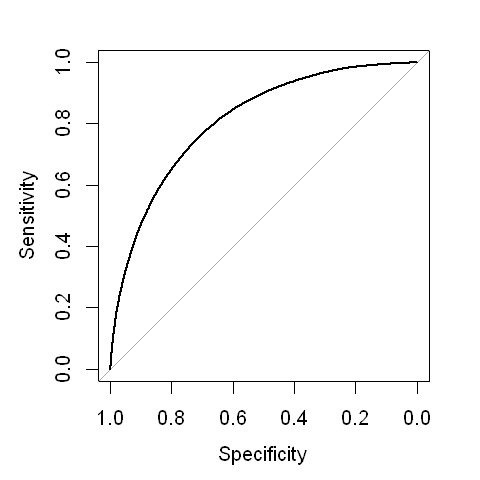

In [162]:
res_reglog_mod1_02roc<-roc(enigh_t_mod1_train_t$ingresotrim,as.vector(res_reglog_mod1_02$fitted.values))
plot(res_reglog_mod1_02roc)
auc(res_reglog_mod1_02roc)

In [163]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod1_02_pred_test<-predict(res_reglog_mod1_02,newdata=enigh_t_mod1_test_t,type="response")
table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod1_02_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  4582  828
            2  3357 4602

In [164]:
prop.table(table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod1_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34273319 0.06193433
            2 0.25110330 0.34422919

no cambia mucho el modelo... ¿que pasa si quito entidad federativa? esto por que me está agregando demasiadas variables al modelo.

In [165]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 2, quitando Entidad Federativa para "ver cómo se afecta el modelo"

# Ajustando la regresión logística

res_reglog_mod1_03<-glm(ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+
                    +Ambito+casa_propia,family=binomial(),data=enigh_t_mod1_train_t) 
summary(res_reglog_mod1_03)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + hijos_viv + antiguedad + 
    focos_inca + focos_ahor + tot_hom + +Ambito + casa_propia, 
    family = binomial(), data = enigh_t_mod1_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.9581   0.4811   0.8803   3.1377  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.2914761  0.0485656   6.002 1.95e-09 ***
edad             -0.0338820  0.0007697 -44.022  < 2e-16 ***
hor_1             0.0136289  0.0004043  33.707  < 2e-16 ***
hijos_viv        -0.1804415  0.0059339 -30.409  < 2e-16 ***
antiguedad       -0.0022280  0.0007040  -3.165  0.00155 ** 
focos_inca        0.1525994  0.0054310  28.098  < 2e-16 ***
focos_ahor        0.2093975  0.0037207  56.278  < 2e-16 ***
tot_hom          -0.0493916  0.0087177  -5.666 1.46e-08 ***
AmbitoUrbano      0.6092584  0.0216609  28.127  < 2e-16 ***
casa_propiaRenta  0.4083690  0.0349796  11.675  < 2e-16 ***
---
Signif. codes

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.7895

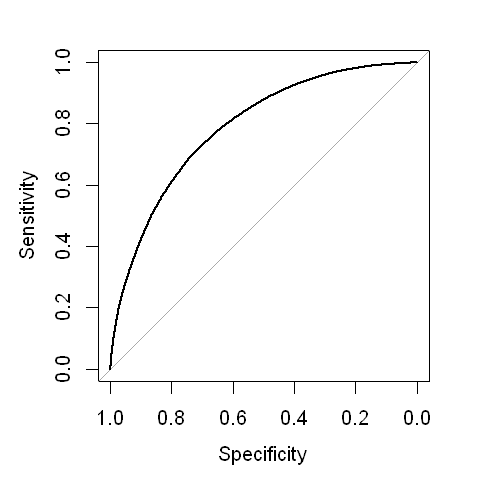

In [166]:
res_reglog_mod1_03roc<-roc(enigh_t_mod1_train_t$ingresotrim,as.vector(res_reglog_mod1_03$fitted.values))
plot(res_reglog_mod1_03roc)
auc(res_reglog_mod1_03roc)

In [167]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod1_03_pred_test<-predict(res_reglog_mod1_03,newdata=enigh_t_mod1_test_t,type="response")
table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod1_03_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  4628  782
            2  3693 4266

In [168]:
prop.table(table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod1_03_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34617398 0.05849353
            2 0.27623607 0.31909642

para comparar, pondré todos los modelos juntos:

en cuanto a la tabla de confusión, se interpreta de la siguiente manera:

|           |   |        Modelo        |                      |
|-----------|---|:--------------------:|:--------------------:|
|           |   |       negativo       |       positivo       |
|           |   |           0          |           1          |
|   Falso   | 0 |   Falsos Negativos   |   Falsos Positivos   |
| Verdadero | 1 | Verdaderos Negativos | Verdaderos Positivos |

|           |   |        Modelo        |                      |
|-----------|---|:--------------------:|:--------------------:|
|           |   |       negativo       |       positivo       |
|           |   |           0          |           1          |
|   Falso   | 0 |   Falsos Negativos   |   Falsos Positivos   |
| Verdadero | 1 | Verdaderos Negativos | Verdaderos Positivos |

|  |  | Modelo |  |
|-----------|---|:--------------------:|:--------------------:|
|  |  | negativo | positivo |
|  |  | 0 | 1 |
| Falso | 0 | Falsos Negativos | Falsos Positivos |
| Verdadero | 1 | Verdaderos Negativos | Verdaderos Positivos |

|  	|  	| Modelo 	|  	|
|-----------	|---	|:--------------------:	|:--------------------:	|
|  	|  	| negativo 	| positivo 	|
|  	|  	| 0 	| 1 	|
| Falso 	| 0 	| Falsos Negativos 	| Falsos Positivos 	|
| Verdadero 	| 1 	| Verdaderos Negativos 	| Verdaderos Positivos 	|

Sensitividad de la prueba = verdaderospositivos/verdaderos

Especificidad de la prueba = FalsosNegativos/negativos

### Resultados:

modelo 1, regresión 1: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Entidad_Federativa+Ambito+casa_propia

In [169]:
prop.table(table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod1_01_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34303239 0.06163513
            2 0.25140250 0.34392999

modelo 1, regresión 2: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+Entidad_Federativa+Ambito+casa_propia

In [170]:
prop.table(table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod1_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34273319 0.06193433
            2 0.25110330 0.34422919

modelo 1, regresión 3: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+Ambito+casa_propia

In [171]:
prop.table(table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod1_03_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34617398 0.05849353
            2 0.27623607 0.31909642

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

+ AIC mod1 reg 01: 55793
+ AIC mod1 reg 02: 55794
+ AIC mod1 reg 03: 58134

en cuanto Akaike, convienen los modelos 1 o 2 por menor Akaike (AIC)

Areas bajo la curva:

modelo 1, regresión 1: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Entidad_Federativa+Ambito+casa_propia

In [172]:
auc(res_reglog_mod1_01roc)

Area under the curve: 0.8108

modelo 1, regresión 2: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+Entidad_Federativa+Ambito+casa_propia

In [173]:
auc(res_reglog_mod1_02roc)

Area under the curve: 0.8108

modelo 1, regresión 3: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+Ambito+casa_propia

In [174]:
auc(res_reglog_mod1_03roc)

Area under the curve: 0.7895

In [175]:
res_reglog_mod1_01roc


Call:
roc.default(response = enigh_t_mod1_train_t$ingresotrim, predictor = as.vector(res_reglog_mod1_01$fitted.values))

Data: as.vector(res_reglog_mod1_01$fitted.values) in 22066 controls (enigh_t_mod1_train_t$ingresotrim 1) < 31410 cases (enigh_t_mod1_train_t$ingresotrim 2).
Area under the curve: 0.8108

In [176]:
options(repr.plot.width=8, repr.plot.height=6)#esta línea sólo se ejecuta para jupyterlab con R

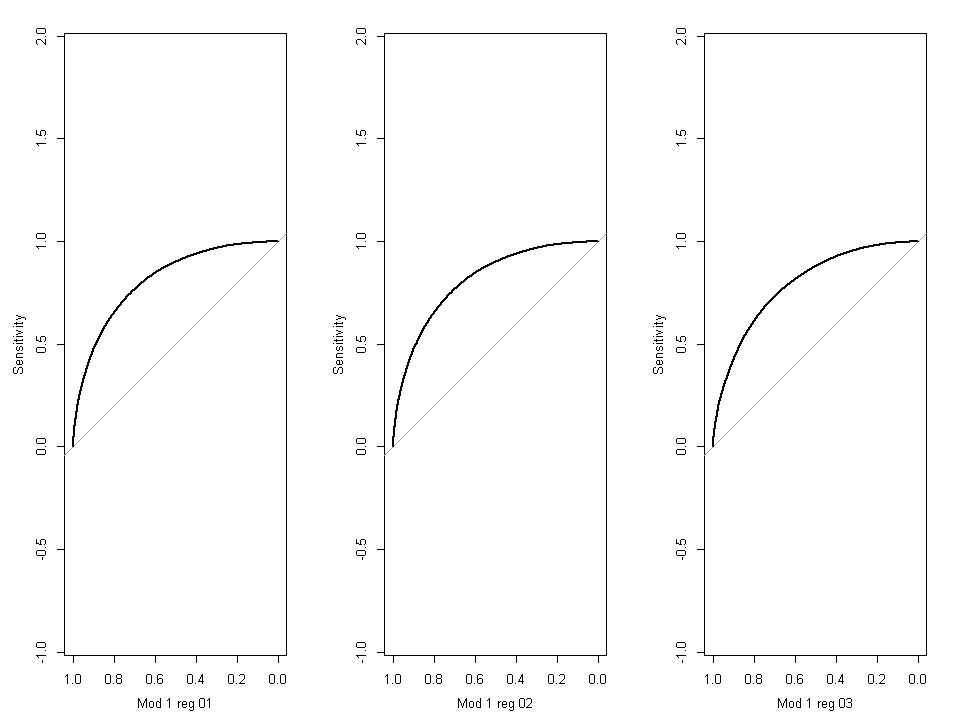

In [177]:
par(mfcol=c(1,3))#subplots
#par(cex=1)
plot(res_reglog_mod1_01roc,xlab="Mod 1 reg 01")
plot(res_reglog_mod1_02roc,xlab="Mod 1 reg 02")
plot(res_reglog_mod1_03roc,xlab="Mod 1 reg 03")


# MODELO 2: **SIN** HIJOS VIV Y **SIN FILTRAR** HOR_1

## Generando la base para este modelo

In [178]:
enigh_t_mod2<-enigh_t[,-5]

In [179]:
head(enigh_t_mod2)

folioviv,ingresotrim,edad,hor_1,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003801,2,33,40,0,3,8,1,1,Aguascalientes,Urbano,Renta
100003802,2,29,75,0,0,7,1,1,Aguascalientes,Urbano,Renta
100003803,2,47,0,20,0,17,2,4,Aguascalientes,Urbano,Propia
100003804,2,29,40,0,3,10,0,3,Aguascalientes,Urbano,Renta
100003805,2,55,37,7,0,12,2,0,Aguascalientes,Urbano,Propia
100010401,2,66,36,16,10,10,2,3,Aguascalientes,Urbano,Propia


In [180]:
names(enigh_t_mod2)

[1] "folioviv"           "ingresotrim"        "edad"              
 [4] "hor_1"              "antiguedad"         "focos_inca"        
 [7] "focos_ahor"         "tot_hom"            "tot_muj"           
[10] "Entidad_Federativa" "Ambito"             "casa_propia"

## Plantando semilla y dividiendo la base en train y test

In [181]:
#insertando la semilla
set.seed(123972)
#obteniendo el 80% de los 66845 datos
66845*.8

#División de la base en 80% ajuste y 20% test
muestra<-sample(1:nrow(enigh),(nrow(enigh_t_mod2)*.8))
enigh_t_mod2_train<-enigh_t_mod2[muestra,]
enigh_t_mod2_test<-enigh_t_mod2[-muestra,]

[1] 53476

In [182]:
#asignandolas e forma de una tibble
enigh_t_mod2_train_t <- as_tibble(enigh_t_mod2_train)
enigh_t_mod2_test_t <- as_tibble(enigh_t_mod2_test)

In [183]:
#para que las imprima en forma de tibble
head(enigh_t_mod2_train_t)
head(enigh_t_mod2_test_t)

folioviv,ingresotrim,edad,hor_1,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
2801907806,2,44,84,20,1,3,4,1,Tamaulipas,Urbano,Propia
1504414702,2,58,48,30,0,10,2,2,Estado de Mexico,Urbano,Propia
806716906,2,58,0,0,0,0,1,2,Chihuahua,Urbano,Propia
2760440001,1,37,0,15,0,12,3,3,Tabasco,Rural,Propia
860699511,2,75,60,20,0,4,1,1,Chihuahua,Rural,Propia
920370602,2,65,0,70,0,8,1,1,Ciudad de México,Urbano,Propia


folioviv,ingresotrim,edad,hor_1,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003804,2,29,40,0,3,10,0,3,Aguascalientes,Urbano,Renta
100031903,2,54,48,40,6,0,3,1,Aguascalientes,Urbano,Propia
100062603,2,36,0,0,0,3,1,5,Aguascalientes,Urbano,Renta
100068001,1,73,0,51,0,6,1,1,Aguascalientes,Urbano,Propia
100068006,2,30,56,0,0,8,2,1,Aguascalientes,Urbano,Renta
100074205,2,25,43,0,0,6,2,1,Aguascalientes,Urbano,Renta


## Búsqueda del mejor modelo:

In [184]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 1, todas las variables

# Ajustando la regresión logística

res_reglog_mod2_01<-glm(ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+
                    tot_muj+Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod2_train_t) 
summary(res_reglog_mod2_01)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + antiguedad + focos_inca + 
    focos_ahor + tot_hom + tot_muj + Entidad_Federativa + Ambito + 
    casa_propia, family = binomial(), data = enigh_t_mod2_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.9017   0.4374   0.8536   2.5223  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                        0.6216840  0.0774619   8.026
edad                                              -0.0392467  0.0007834 -50.097
hor_1                                              0.0163426  0.0004106  39.806
antiguedad                                        -0.0027284  0.0007171  -3.805
focos_inca                                         0.1332926  0.0055487  24.022
focos_ahor                                         0.2084048  0.0037787  55.153
tot_hom                                            0.0296869  0.0089547   3.315
tot_muj            

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.8021

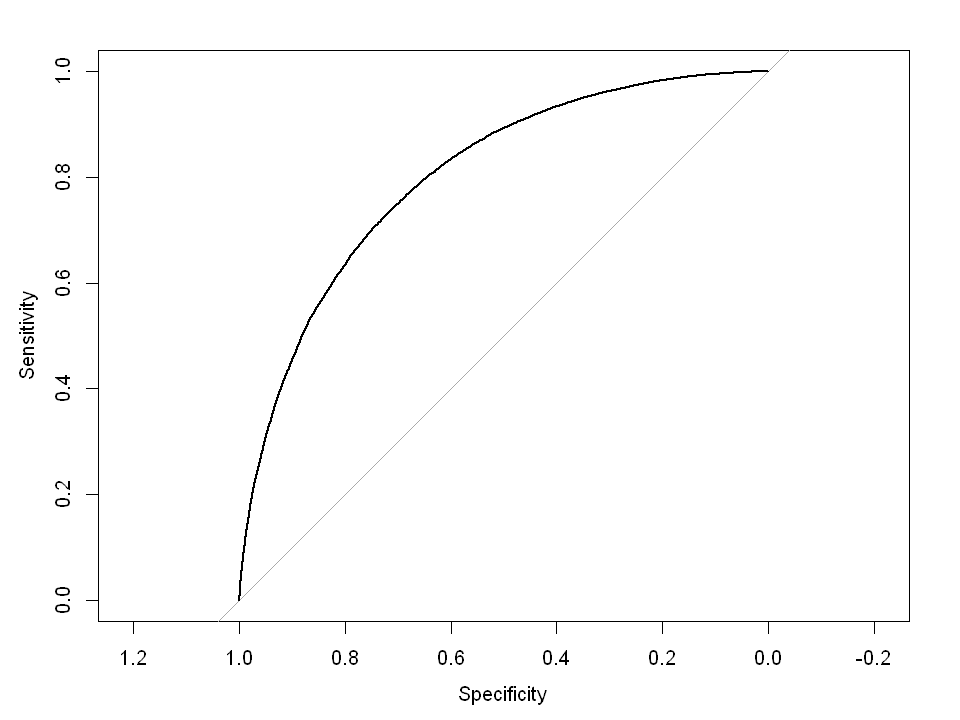

In [185]:
#curva roc con paquete ROCR
res_reglog_mod2_01roc<-roc(enigh_t_mod2_train_t$ingresotrim,as.vector(res_reglog_mod2_01$fitted.values))
plot(res_reglog_mod2_01roc)
auc(res_reglog_mod2_01roc)

In [186]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod2_01_pred_test<-predict(res_reglog_mod2_01,newdata=enigh_t_mod2_test_t,type="response")
table(enigh_t_mod2_test_t$ingresotrim,res_reglog_mod2_01_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  4581  829
            2  3475 4484

In [187]:
prop.table(table(enigh_t_mod2_test_t$ingresotrim,res_reglog_mod2_01_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34265839 0.06200913
            2 0.25992969 0.33540280

En este caso tot_muj resultó significativo, así como todas las demás variables... se mantiene el modelo tal cual, pero para reducir número de variables probaré quitar Entidad Federativa.

In [188]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 2, quitando la Entidad.

# Ajustando la regresión logística

res_reglog_mod2_02<-glm(ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+
                    tot_muj+Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod2_train_t) 
summary(res_reglog_mod2_02)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + antiguedad + focos_inca + 
    focos_ahor + tot_hom + tot_muj + Entidad_Federativa + Ambito + 
    casa_propia, family = binomial(), data = enigh_t_mod2_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.9017   0.4374   0.8536   2.5223  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                        0.6216840  0.0774619   8.026
edad                                              -0.0392467  0.0007834 -50.097
hor_1                                              0.0163426  0.0004106  39.806
antiguedad                                        -0.0027284  0.0007171  -3.805
focos_inca                                         0.1332926  0.0055487  24.022
focos_ahor                                         0.2084048  0.0037787  55.153
tot_hom                                            0.0296869  0.0089547   3.315
tot_muj            

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.8021

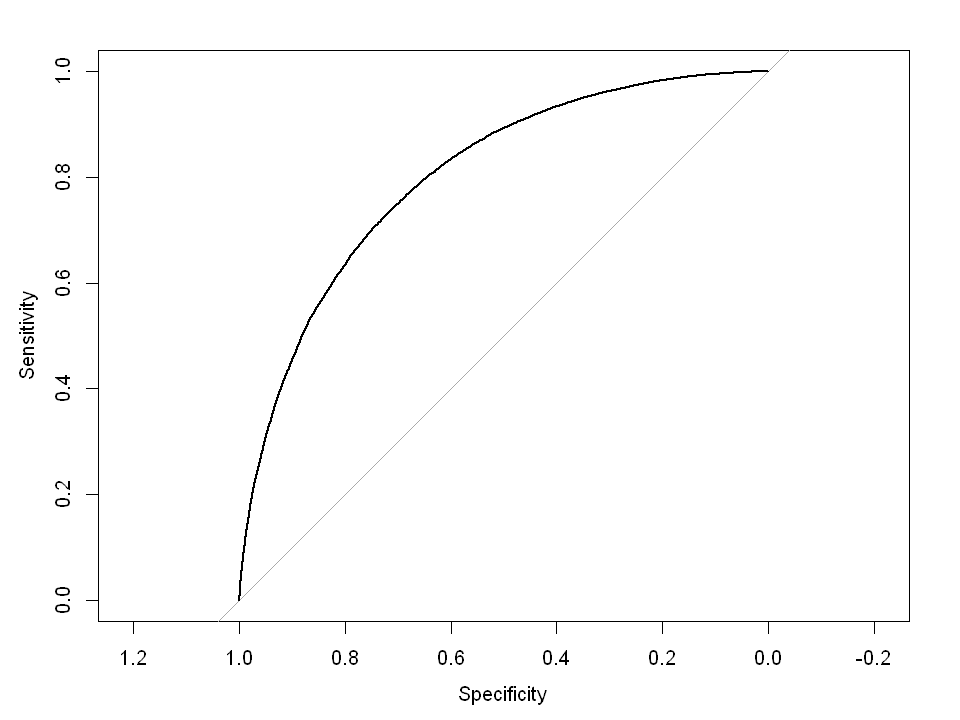

In [189]:
#curva roc con paquete ROCR
res_reglog_mod2_02roc<-roc(enigh_t_mod2_train_t$ingresotrim,as.vector(res_reglog_mod2_02$fitted.values))
plot(res_reglog_mod2_02roc)
auc(res_reglog_mod2_02roc)

In [190]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod2_02_pred_test<-predict(res_reglog_mod2_02,newdata=enigh_t_mod2_test_t,type="response")
table(enigh_t_mod2_test_t$ingresotrim,res_reglog_mod2_02_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  4581  829
            2  3475 4484

In [191]:
prop.table(table(enigh_t_mod2_test_t$ingresotrim,res_reglog_mod2_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34265839 0.06200913
            2 0.25992969 0.33540280

### Resultados:

modelo 2, regresión 1: <br>
ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Entidad_Federativa+Ambito+casa_propia

In [192]:
prop.table(table(enigh_t_mod2_test_t$ingresotrim,res_reglog_mod2_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34265839 0.06200913
            2 0.25992969 0.33540280

modelo 2, regresión 2: <br>
ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+Ambito+casa_propia

In [193]:
prop.table(table(enigh_t_mod2_test_t$ingresotrim,res_reglog_mod2_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34265839 0.06200913
            2 0.25992969 0.33540280

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

+ AIC mod2 reg 01: 56813
+ AIC mod2 reg 02: 56813

en cuanto Akaike, conviene el modelo 2 por tener el mismo Akaike (AIC), pero menor cantidad de variables

Areas bajo la curva:

modelo 2, regresión 1: <br>
ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Entidad_Federativa+Ambito+casa_propia

In [194]:
auc(res_reglog_mod2_01roc)

Area under the curve: 0.8021

modelo 2, regresión 2: <br>
ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+Ambito+casa_propia

In [195]:
auc(res_reglog_mod2_02roc)

Area under the curve: 0.8021

**Resultado**: se mantiene el modelo sin Entidad Federativa  (modelo2, reg02)

# MODELO 3: **CON** HIJOS VIV Y **FILTRANDO** HOR_1

## Generando la base para este modelo

In [196]:
enigh_t_mod3<-enigh_t
enigh_t_mod3<-filter(enigh_t_mod3,enigh_t_mod3$hor_1>0)

In [197]:
head(enigh_t_mod3)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003801,2,33,40,0,0,3,8,1,1,Aguascalientes,Urbano,Renta
100003802,2,29,75,0,0,0,7,1,1,Aguascalientes,Urbano,Renta
100003804,2,29,40,0,0,3,10,0,3,Aguascalientes,Urbano,Renta
100003805,2,55,37,0,7,0,12,2,0,Aguascalientes,Urbano,Propia
100010401,2,66,36,0,16,10,10,2,3,Aguascalientes,Urbano,Propia
100010406,2,53,57,0,33,2,5,2,2,Aguascalientes,Urbano,Propia


In [198]:
names(enigh_t_mod3)

[1] "folioviv"           "ingresotrim"        "edad"              
 [4] "hor_1"              "hijos_viv"          "antiguedad"        
 [7] "focos_inca"         "focos_ahor"         "tot_hom"           
[10] "tot_muj"            "Entidad_Federativa" "Ambito"            
[13] "casa_propia"

In [199]:
#filter(enigh_t_mod3,enigh_t_mod3$hor_1==0)

## Plantando semilla y dividiendo la base en train y test

In [200]:
#insertando la semilla
set.seed(123972)
#obteniendo el 80% de los 66845 datos
nrow(filter(enigh,enigh$hor_1>0))*.8

#División de la base en 80% ajuste y 20% test
muestra<-sample(1:nrow(filter(enigh,enigh$hor_1>0)),(nrow(filter(enigh,enigh$hor_1>0))*.8))
enigh_t_mod3_train<-enigh_t_mod3[muestra,]
enigh_t_mod3_test<-enigh_t_mod3[-muestra,]

[1] 37067.2

In [201]:
#asignandolas e forma de una tibble
enigh_t_mod3_train_t <- as_tibble(enigh_t_mod3_train)
enigh_t_mod3_test_t <- as_tibble(enigh_t_mod3_test)

In [202]:
#para que las imprima en forma de tibble
head(enigh_t_mod3_train_t)
head(enigh_t_mod3_test_t)

folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
1001696703,1,50,72,0,30,3,1,1,3,Durango,Urbano,Propia
2107502606,2,43,56,0,0,4,1,4,1,Puebla,Urbano,Renta
1204623810,1,86,50,0,50,0,6,1,0,Guerrero,Urbano,Propia
1302697711,2,63,60,0,16,3,4,1,2,Hidalgo,Urbano,Propia
1301325203,2,54,56,0,27,0,10,2,1,Hidalgo,Urbano,Propia
1460745726,1,36,48,0,18,6,0,2,5,Jalisco,Rural,Propia


folioviv,ingresotrim,edad,hor_1,hijos_viv,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003805,2,55,37,0,7,0,12,2,0,Aguascalientes,Urbano,Propia
100031901,1,41,56,4,0,3,2,4,5,Aguascalientes,Urbano,Renta
100031904,2,45,48,0,0,2,3,2,2,Aguascalientes,Urbano,Propia
100041502,2,33,12,0,25,1,12,1,0,Aguascalientes,Urbano,Propia
100041505,2,54,84,0,0,15,15,3,1,Aguascalientes,Urbano,Propia
100062606,1,64,20,1,64,0,6,0,1,Aguascalientes,Urbano,Propia


## Búsqueda del mejor modelo:

In [203]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 1, todas las variables

# Ajustando la regresión logística

res_reglog_mod3_01<-glm(ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+
                    tot_muj+Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod3_train_t) 
summary(res_reglog_mod3_01)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + hijos_viv + antiguedad + 
    focos_inca + focos_ahor + tot_hom + tot_muj + Entidad_Federativa + 
    Ambito + casa_propia, family = binomial(), data = enigh_t_mod3_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8620   0.4571   0.8018   2.9032  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                       -0.0950032  0.1011867  -0.939
edad                                              -0.0295605  0.0010401 -28.421
hor_1                                              0.0245815  0.0006972  35.260
hijos_viv                                         -0.1496863  0.0085167 -17.576
antiguedad                                        -0.0025036  0.0009029  -2.773
focos_inca                                         0.1425755  0.0070955  20.094
focos_ahor                                         0.2084995  0.0048878  42.657
tot_hom

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.8071

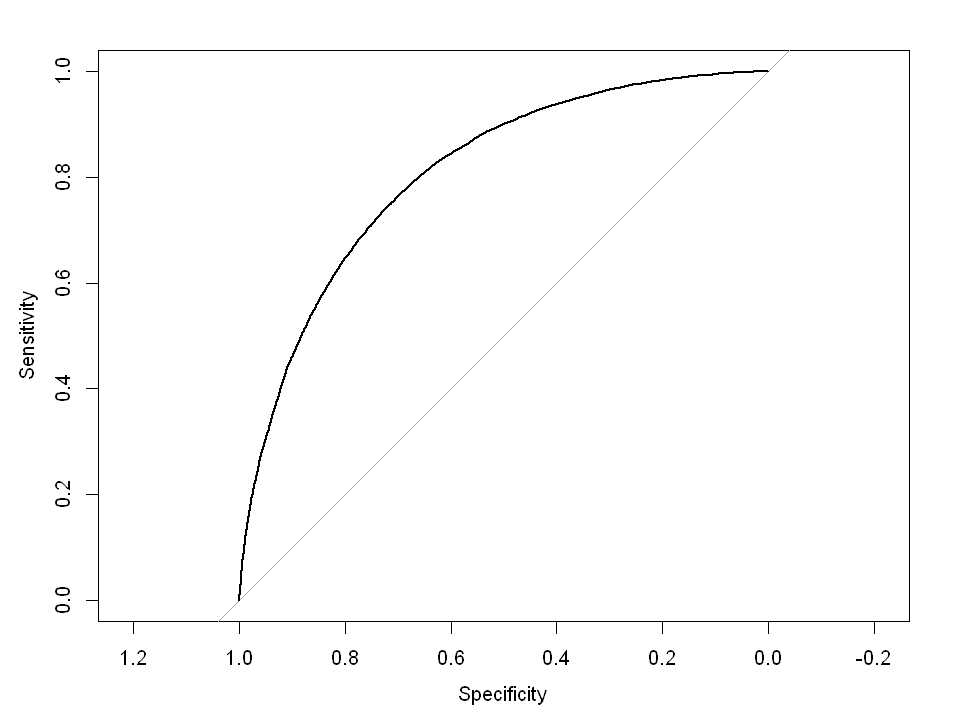

In [204]:
#curva roc con paquete ROCR
res_reglog_mod3_01roc<-roc(enigh_t_mod3_train_t$ingresotrim,as.vector(res_reglog_mod3_01$fitted.values))
plot(res_reglog_mod3_01roc)
auc(res_reglog_mod3_01roc)

In [205]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod3_01_pred_test<-predict(res_reglog_mod3_01,newdata=enigh_t_mod3_test_t,type="response")
table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_01_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  2643  728
            2  2002 3894

In [206]:
prop.table(table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_01_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28520557 0.07855833
            2 0.21603539 0.42020071

En este caso tot_muj resultó no significativo, a diferencia de todas las demás... se quita del modelo:

In [207]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 2, sin tot_muj

# Ajustando la regresión logística

res_reglog_mod3_02<-glm(ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+
                    Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod3_train_t) 
summary(res_reglog_mod3_02)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + hijos_viv + antiguedad + 
    focos_inca + focos_ahor + tot_hom + Entidad_Federativa + 
    Ambito + casa_propia, family = binomial(), data = enigh_t_mod3_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8624   0.4572   0.8020   2.9077  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                       -0.1321944  0.0995102  -1.328
edad                                              -0.0293642  0.0010353 -28.362
hor_1                                              0.0245576  0.0006970  35.234
hijos_viv                                         -0.1526058  0.0084061 -18.154
antiguedad                                        -0.0024813  0.0009029  -2.748
focos_inca                                         0.1414682  0.0070673  20.017
focos_ahor                                         0.2077277  0.0048674  42.678
tot_hom          

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.807

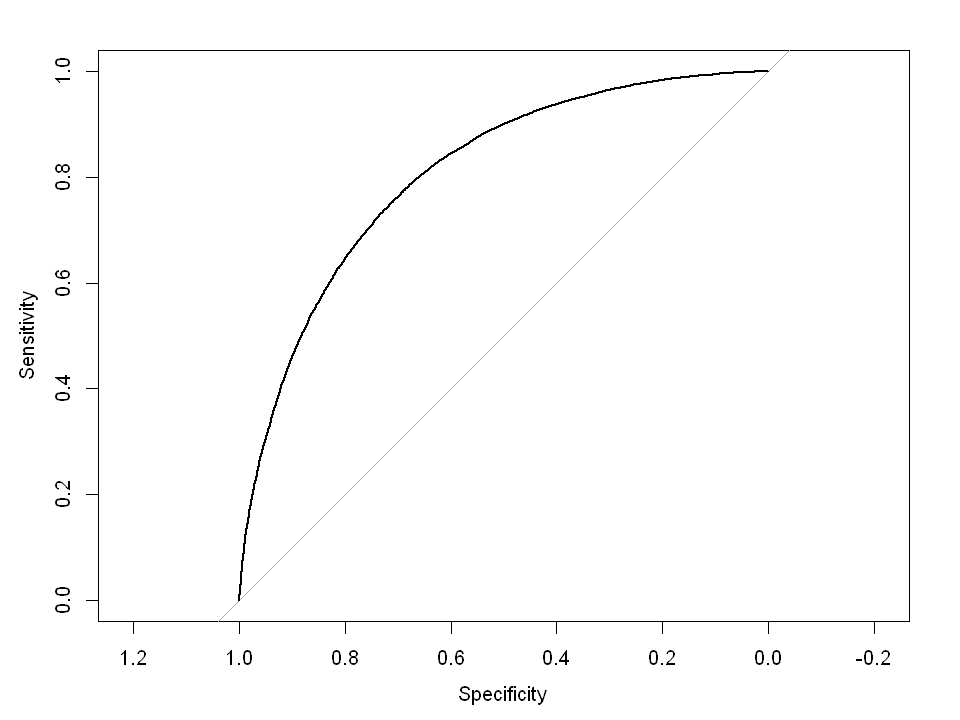

In [208]:
#curva roc con paquete ROCR
res_reglog_mod3_02roc<-roc(enigh_t_mod3_train_t$ingresotrim,as.vector(res_reglog_mod3_02$fitted.values))
plot(res_reglog_mod3_02roc)
auc(res_reglog_mod3_02roc)

In [209]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod3_02_pred_test<-predict(res_reglog_mod3_02,newdata=enigh_t_mod3_test_t,type="response")
table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_02_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  2640  731
            2  1994 3902

In [210]:
prop.table(table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28488184 0.07888205
            2 0.21517212 0.42106399

resultados similares, pero baja significancia de antiguedad. Probar sin antiguedad:

In [211]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 3, sin tot_muj y sin antiguedad

# Ajustando la regresión logística

res_reglog_mod3_03<-glm(ingresotrim ~ edad+hor_1+hijos_viv+focos_inca+focos_ahor+tot_hom+
                    Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod3_train_t) 
summary(res_reglog_mod3_03)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + hijos_viv + focos_inca + 
    focos_ahor + tot_hom + Entidad_Federativa + Ambito + casa_propia, 
    family = binomial(), data = enigh_t_mod3_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8618   0.4570   0.8021   2.9191  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                       -0.1337347  0.0994774  -1.344
edad                                              -0.0303054  0.0009781 -30.985
hor_1                                              0.0245811  0.0006968  35.275
hijos_viv                                         -0.1524029  0.0084032 -18.136
focos_inca                                         0.1408825  0.0070602  19.954
focos_ahor                                         0.2071761  0.0048593  42.635
tot_hom                                           -0.0356854  0.0109522  -3.258
Entidad_FederativaBaja Califor

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.8068

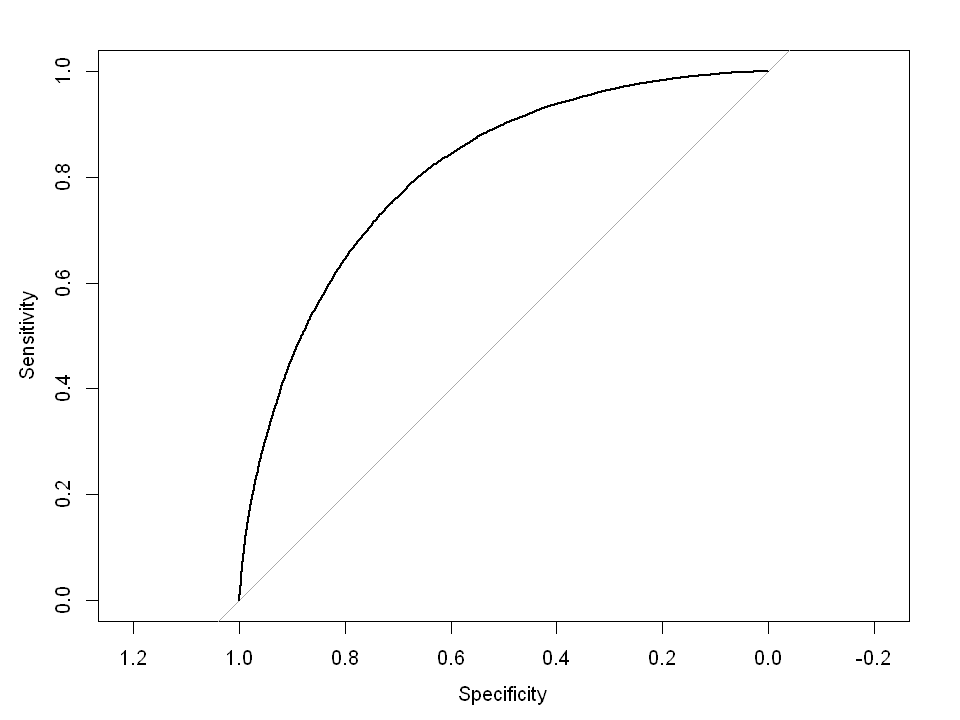

In [212]:
#curva roc con paquete ROCR
res_reglog_mod3_03roc<-roc(enigh_t_mod3_train_t$ingresotrim,as.vector(res_reglog_mod3_03$fitted.values))
plot(res_reglog_mod3_03roc)
auc(res_reglog_mod3_03roc)

In [213]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod3_03_pred_test<-predict(res_reglog_mod3_03,newdata=enigh_t_mod3_test_t,type="response")
table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_03_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  2647  724
            2  2000 3896

In [214]:
prop.table(table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_03_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28563721 0.07812669
            2 0.21581957 0.42041653

resultados similares... probando sin Entidad:

In [215]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 4, Sin tot_muj, sin antiguedad, sin entidad

# Ajustando la regresión logística

res_reglog_mod3_04<-glm(ingresotrim ~ edad+hor_1+hijos_viv+focos_inca+focos_ahor+tot_hom+
                    Ambito+casa_propia,family=binomial(),data=enigh_t_mod3_train_t) 
summary(res_reglog_mod3_04)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + hijos_viv + focos_inca + 
    focos_ahor + tot_hom + Ambito + casa_propia, family = binomial(), 
    data = enigh_t_mod3_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.9632   0.5199   0.8530   2.7229  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.4900264  0.0645973  -7.586 3.30e-14 ***
edad             -0.0299956  0.0009416 -31.856  < 2e-16 ***
hor_1             0.0243602  0.0006719  36.258  < 2e-16 ***
hijos_viv        -0.1510164  0.0081074 -18.627  < 2e-16 ***
focos_inca        0.1653099  0.0067948  24.329  < 2e-16 ***
focos_ahor        0.2159661  0.0047324  45.636  < 2e-16 ***
tot_hom          -0.0616624  0.0105350  -5.853 4.82e-09 ***
AmbitoUrbano      0.5969082  0.0258779  23.066  < 2e-16 ***
casa_propiaRenta  0.4623782  0.0410777  11.256  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter f

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.7788

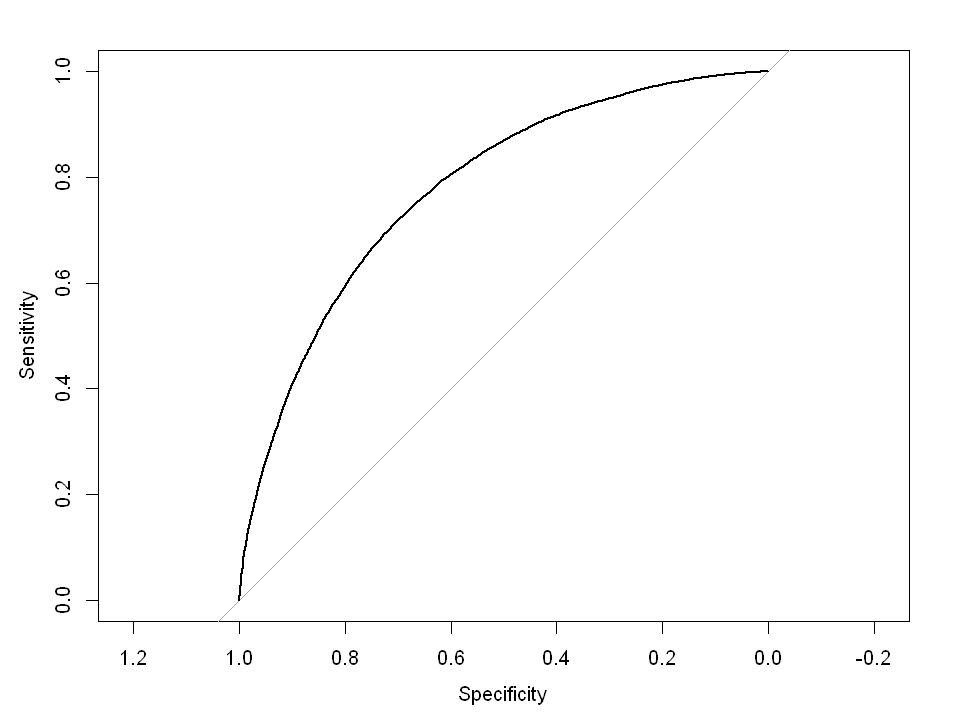

In [216]:
#curva roc con paquete ROCR
res_reglog_mod3_04roc<-roc(enigh_t_mod3_train_t$ingresotrim,as.vector(res_reglog_mod3_04$fitted.values))
plot(res_reglog_mod3_04roc)
auc(res_reglog_mod3_04roc)

In [217]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod3_04_pred_test<-predict(res_reglog_mod3_04,newdata=enigh_t_mod3_test_t,type="response")
table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_04_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  2648  723
            2  2311 3585

In [218]:
prop.table(table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_04_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28574512 0.07801878
            2 0.24937952 0.38685659

baja la capacidad de predicción del modelo, por lo tanto se mantiene en el modelo la variable Entidad_federativa.

### Resultados:

modelo 3, regresión 1: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Entidad_Federativa+Ambito+casa_propia

In [219]:
prop.table(table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_01_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28520557 0.07855833
            2 0.21603539 0.42020071

modelo 3, regresión 2: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+Entidad_Federativa+Ambito+casa_propia

In [220]:
prop.table(table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28488184 0.07888205
            2 0.21517212 0.42106399

modelo 3, regresión 3: <br>
ingresotrim ~ edad+hor_1+hijos_viv+focos_inca+focos_ahor+tot_hom+Entidad_Federativa+Ambito+casa_propia

In [221]:
prop.table(table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_03_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28563721 0.07812669
            2 0.21581957 0.42041653

modelo 3, regresión 4: <br>
ingresotrim ~ edad+hor_1+hijos_viv+focos_inca+focos_ahor+tot_hom+Ambito+casa_propia

In [222]:
prop.table(table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_04_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28574512 0.07801878
            2 0.24937952 0.38685659

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

+ AIC mod3 reg 01: 37751
+ AIC mod3 reg 02: 37753
+ AIC mod3 reg 03: 37759
+ AIC mod3 reg 04: 39852

en cuanto Akaike, convienen los modelos 1 o 2 por menor Akaike (AIC)

Areas bajo la curva:

modelo 3, regresión 1:

In [223]:
auc(res_reglog_mod3_01roc)

Area under the curve: 0.8071

modelo 3, regresión 2:

In [224]:
auc(res_reglog_mod3_02roc)

Area under the curve: 0.807

modelo 3, regresión 3:

In [225]:
auc(res_reglog_mod3_03roc)

Area under the curve: 0.8068

modelo 3, regresión 4:

In [226]:
auc(res_reglog_mod3_04roc)

Area under the curve: 0.7788

In [227]:
options(repr.plot.width=8, repr.plot.height=6)#esta línea sólo se ejecuta para jupyterlab con R

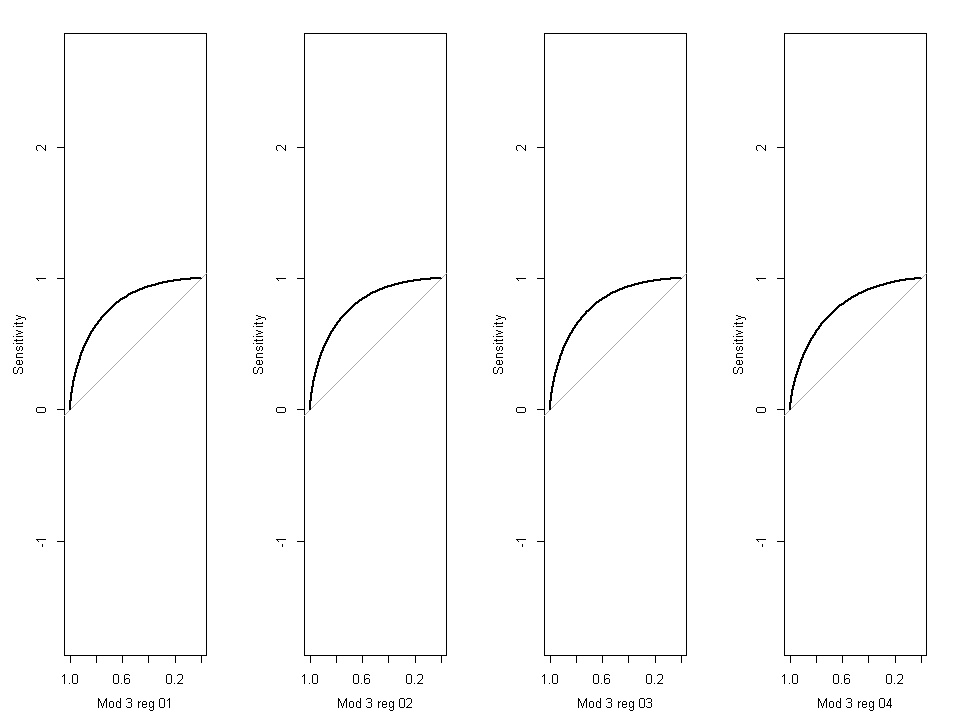

In [228]:
par(mfcol=c(1,4))#subplots
#par(cex=1)
plot(res_reglog_mod3_01roc,xlab="Mod 3 reg 01")
plot(res_reglog_mod3_02roc,xlab="Mod 3 reg 02")
plot(res_reglog_mod3_03roc,xlab="Mod 3 reg 03")
plot(res_reglog_mod3_04roc,xlab="Mod 3 reg 04")


# MODELO 4: **SIN** HIJOS VIV Y **FILTRANDO** HOR_1

## Generando la base para este modelo

In [229]:
enigh_t_mod4<-enigh_t[,-5]
enigh_t_mod4<-filter(enigh_t_mod4,enigh_t_mod4$hor_1>0)

In [230]:
head(enigh_t_mod4)

folioviv,ingresotrim,edad,hor_1,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003801,2,33,40,0,3,8,1,1,Aguascalientes,Urbano,Renta
100003802,2,29,75,0,0,7,1,1,Aguascalientes,Urbano,Renta
100003804,2,29,40,0,3,10,0,3,Aguascalientes,Urbano,Renta
100003805,2,55,37,7,0,12,2,0,Aguascalientes,Urbano,Propia
100010401,2,66,36,16,10,10,2,3,Aguascalientes,Urbano,Propia
100010406,2,53,57,33,2,5,2,2,Aguascalientes,Urbano,Propia


In [231]:
names(enigh_t_mod4)

[1] "folioviv"           "ingresotrim"        "edad"              
 [4] "hor_1"              "antiguedad"         "focos_inca"        
 [7] "focos_ahor"         "tot_hom"            "tot_muj"           
[10] "Entidad_Federativa" "Ambito"             "casa_propia"

In [232]:
#filter(enigh_t_mod4,enigh_t_mod4$hor_1==0)

## Plantando semilla y dividiendo la base en train y test

In [233]:
#insertando la semilla
set.seed(123972)
#obteniendo el 80% de los 66845 datos
nrow(filter(enigh,enigh$hor_1>0))*.8

#División de la base en 80% ajuste y 20% test
muestra<-sample(1:nrow(filter(enigh,enigh$hor_1>0)),(nrow(filter(enigh,enigh$hor_1>0))*.8))
enigh_t_mod4_train<-enigh_t_mod4[muestra,]
enigh_t_mod4_test<-enigh_t_mod4[-muestra,]

[1] 37067.2

In [234]:
#asignandolas e forma de una tibble
enigh_t_mod4_train_t <- as_tibble(enigh_t_mod4_train)
enigh_t_mod4_test_t <- as_tibble(enigh_t_mod4_test)

In [235]:
#para que las imprima en forma de tibble
head(enigh_t_mod4_train_t)
head(enigh_t_mod4_test_t)

folioviv,ingresotrim,edad,hor_1,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
1001696703,1,50,72,30,3,1,1,3,Durango,Urbano,Propia
2107502606,2,43,56,0,4,1,4,1,Puebla,Urbano,Renta
1204623810,1,86,50,50,0,6,1,0,Guerrero,Urbano,Propia
1302697711,2,63,60,16,3,4,1,2,Hidalgo,Urbano,Propia
1301325203,2,54,56,27,0,10,2,1,Hidalgo,Urbano,Propia
1460745726,1,36,48,18,6,0,2,5,Jalisco,Rural,Propia


folioviv,ingresotrim,edad,hor_1,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003805,2,55,37,7,0,12,2,0,Aguascalientes,Urbano,Propia
100031901,1,41,56,0,3,2,4,5,Aguascalientes,Urbano,Renta
100031904,2,45,48,0,2,3,2,2,Aguascalientes,Urbano,Propia
100041502,2,33,12,25,1,12,1,0,Aguascalientes,Urbano,Propia
100041505,2,54,84,0,15,15,3,1,Aguascalientes,Urbano,Propia
100062606,1,64,20,64,0,6,0,1,Aguascalientes,Urbano,Propia


## Búsqueda del mejor modelo:

In [236]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 1, todas las variables

# Ajustando la regresión logística

res_reglog_mod4_01<-glm(ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+
                    tot_muj+Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod4_train_t) 
summary(res_reglog_mod4_01)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + antiguedad + focos_inca + 
    focos_ahor + tot_hom + tot_muj + Entidad_Federativa + Ambito + 
    casa_propia, family = binomial(), data = enigh_t_mod4_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8715   0.4641   0.8087   2.5743  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                       -0.1847453  0.1004162  -1.840
edad                                              -0.0317608  0.0010305 -30.821
hor_1                                              0.0263968  0.0006887  38.327
antiguedad                                        -0.0024032  0.0008980  -2.676
focos_inca                                         0.1436891  0.0070652  20.338
focos_ahor                                         0.2129732  0.0048708  43.724
tot_hom                                            0.0057732  0.0110317   0.523
tot_muj            

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.8026

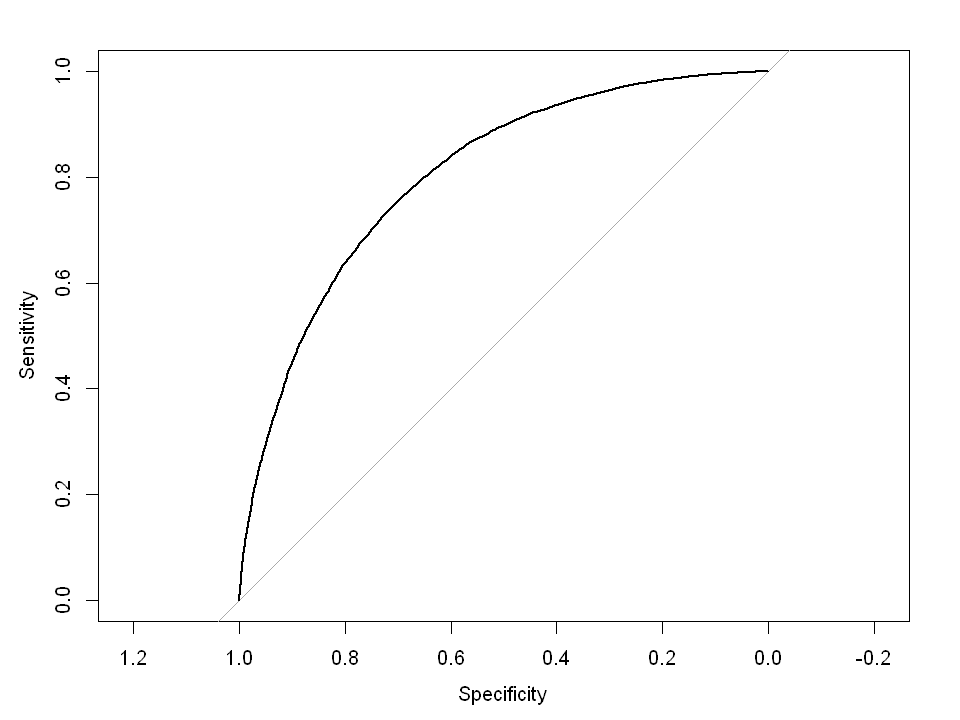

In [237]:
#curva roc con paquete ROCR
res_reglog_mod4_01roc<-roc(enigh_t_mod4_train_t$ingresotrim,as.vector(res_reglog_mod4_01$fitted.values))
plot(res_reglog_mod4_01roc)
auc(res_reglog_mod4_01roc)

In [238]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod4_01_pred_test<-predict(res_reglog_mod4_01,newdata=enigh_t_mod4_test_t,type="response")
table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_01_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  2635  736
            2  2029 3867

In [239]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_01_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones     FALSE      TRUE
            1 0.2843423 0.0794216
            2 0.2189490 0.4172871

En este caso tot_muj resultó nada significativo, quitar del modelo:

In [240]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 2, sin hijos viv y sin tot_muj

# Ajustando la regresión logística

res_reglog_mod4_02<-glm(ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+
                    Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod4_train_t) 
summary(res_reglog_mod4_02)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + antiguedad + focos_inca + 
    focos_ahor + tot_hom + Entidad_Federativa + Ambito + casa_propia, 
    family = binomial(), data = enigh_t_mod4_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8714   0.4657   0.8100   2.5800  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                       -0.2852045  0.0984579  -2.897
edad                                              -0.0313595  0.0010268 -30.542
hor_1                                              0.0264279  0.0006885  38.387
antiguedad                                        -0.0023387  0.0008979  -2.605
focos_inca                                         0.1409537  0.0070254  20.063
focos_ahor                                         0.2112239  0.0048443  43.602
tot_hom                                           -0.0061370  0.0107864  -0.569
Entidad_FederativaBaja Califo

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.8022

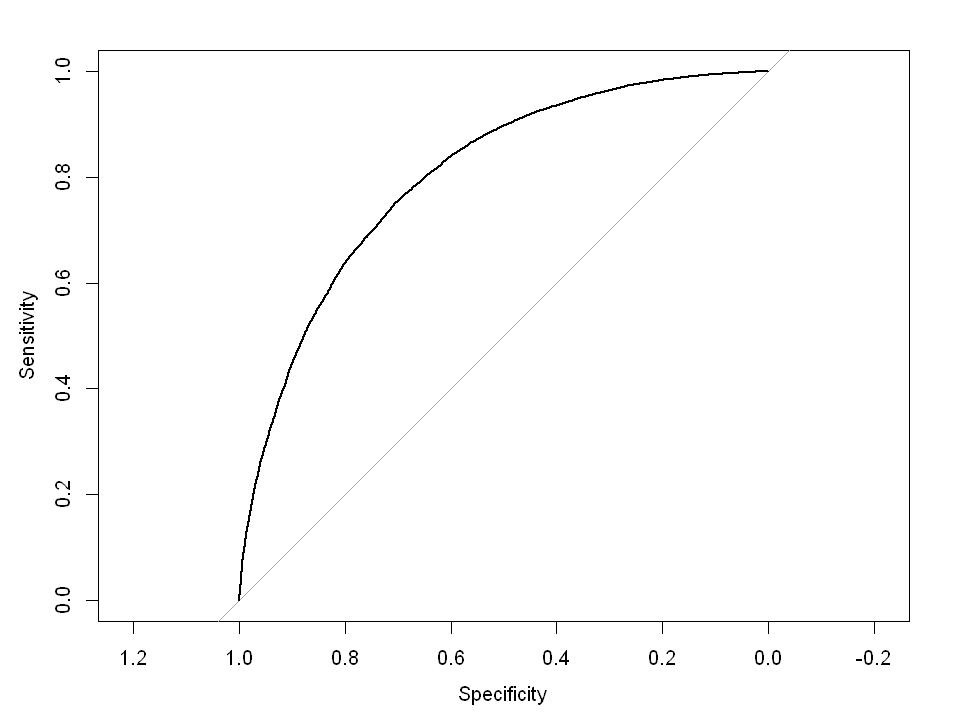

In [241]:
#curva roc con paquete ROCR
res_reglog_mod4_02roc<-roc(enigh_t_mod4_train_t$ingresotrim,as.vector(res_reglog_mod4_02$fitted.values))
plot(res_reglog_mod4_02roc)
auc(res_reglog_mod4_02roc)

In [242]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod4_02_pred_test<-predict(res_reglog_mod4_02,newdata=enigh_t_mod4_test_t,type="response")
table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_02_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  2631  740
            2  2029 3867

In [243]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28391065 0.07985324
            2 0.21894896 0.41728715

En este caso tot_hom resultó nada significativo, quitar del modelo:

In [244]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 3, sin tot_viv, sin tot_muj, sin tot_hom

# Ajustando la regresión logística

res_reglog_mod4_03<-glm(ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+
                    Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod4_train_t) 
summary(res_reglog_mod4_03)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + antiguedad + focos_inca + 
    focos_ahor + Entidad_Federativa + Ambito + casa_propia, family = binomial(), 
    data = enigh_t_mod4_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8705   0.4657   0.8098   2.5816  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                       -0.2982504  0.0957488  -3.115
edad                                              -0.0313167  0.0010240 -30.584
hor_1                                              0.0264002  0.0006867  38.445
antiguedad                                        -0.0023360  0.0008979  -2.602
focos_inca                                         0.1406539  0.0070036  20.083
focos_ahor                                         0.2111078  0.0048391  43.625
Entidad_FederativaBaja California                  0.7942018  0.0964797   8.232
Entidad_FederativaBaja California Sur  

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.8022

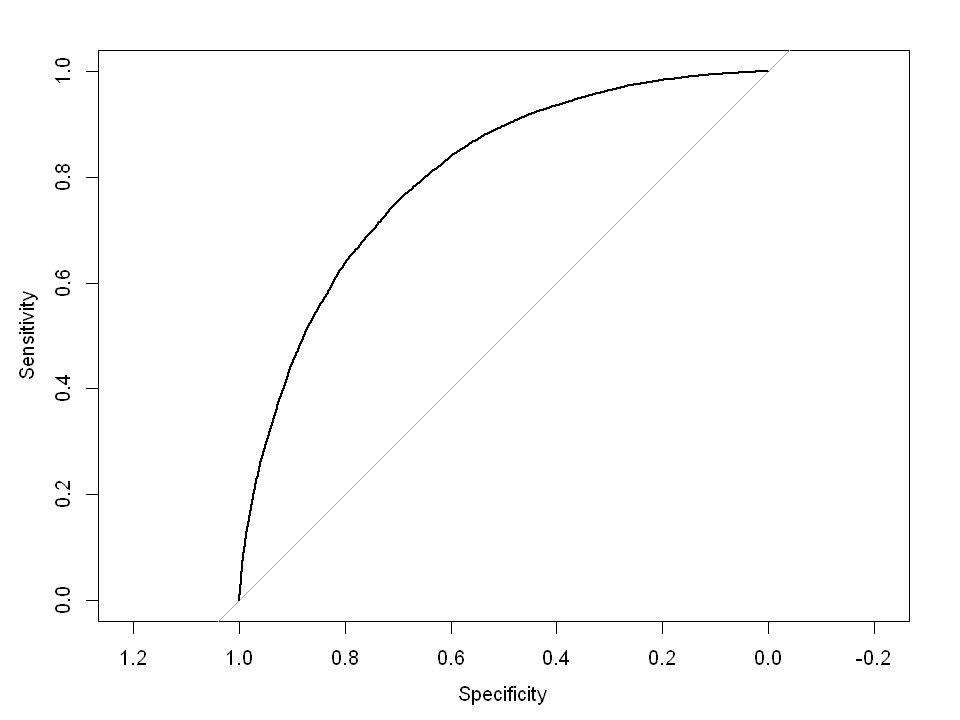

In [245]:
#curva roc con paquete ROCR
res_reglog_mod4_03roc<-roc(enigh_t_mod4_train_t$ingresotrim,as.vector(res_reglog_mod4_03$fitted.values))
plot(res_reglog_mod4_03roc)
auc(res_reglog_mod4_03roc)

In [246]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod4_03_pred_test<-predict(res_reglog_mod4_03,newdata=enigh_t_mod4_test_t,type="response")
table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_03_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  2633  738
            2  2036 3860

In [247]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_03_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28412647 0.07963742
            2 0.21970433 0.41653178

En este caso antiguedad es significativo, pero en menor grado... probar sin antiguedad en el modelo. 

In [248]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 4, sin hijos viv, sin tot_muj, sin antiguedad

# Ajustando la regresión logística

res_reglog_mod4_04<-glm(ingresotrim ~ edad+hor_1+focos_inca+focos_ahor+
                    Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod4_train_t) 
summary(res_reglog_mod4_04)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + focos_inca + focos_ahor + 
    Entidad_Federativa + Ambito + casa_propia, family = binomial(), 
    data = enigh_t_mod4_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8706   0.4660   0.8102   2.6008  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                       -0.2990769  0.0957254  -3.124
edad                                              -0.0322024  0.0009668 -33.308
hor_1                                              0.0264199  0.0006866  38.480
focos_inca                                         0.1401082  0.0069969  20.024
focos_ahor                                         0.2105769  0.0048311  43.588
Entidad_FederativaBaja California                  0.8065436  0.0963575   8.370
Entidad_FederativaBaja California Sur              0.4114107  0.1071780   3.839
Entidad_FederativaCampeche                        -0

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.8026

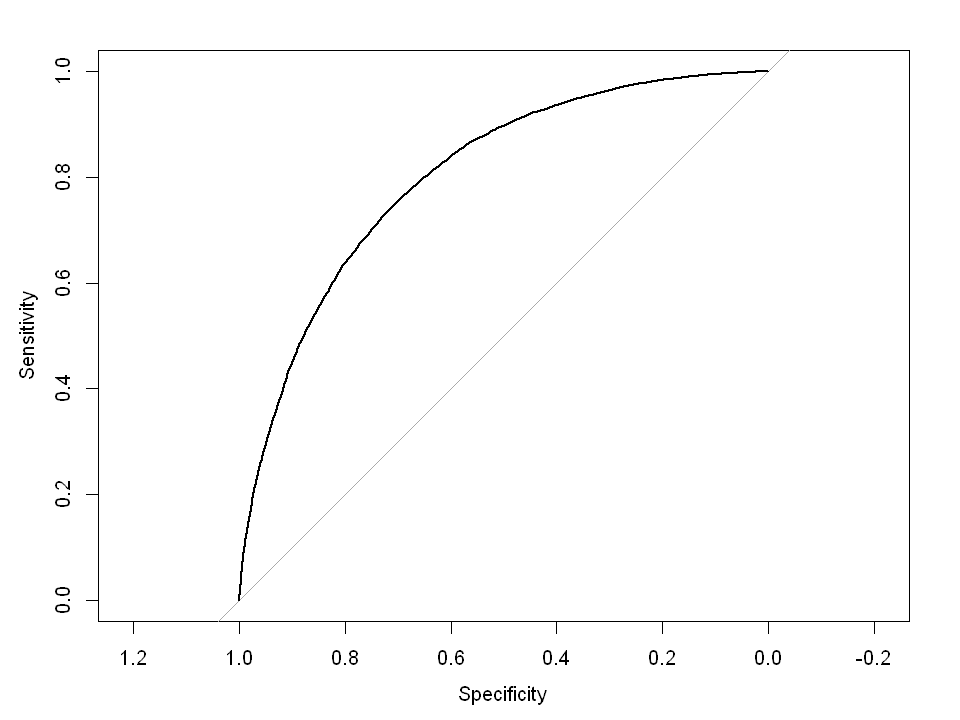

In [249]:
#curva roc con paquete ROCR
res_reglog_mod4_04roc<-roc(enigh_t_mod4_train_t$ingresotrim,as.vector(res_reglog_mod4_01$fitted.values))
plot(res_reglog_mod4_04roc)
auc(res_reglog_mod4_04roc)

In [250]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod4_04_pred_test<-predict(res_reglog_mod4_04,newdata=enigh_t_mod4_test_t,type="response")
table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_04_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  2632  739
            2  2035 3861

In [251]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_04_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28401856 0.07974533
            2 0.21959642 0.41663969

En este caso todas las variables resultaron significativas, probar sin entidad por ser muchas variables.

In [252]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 5, sin hijos viv, tot muj, tot hom, antiguedad, entidad

# Ajustando la regresión logística

res_reglog_mod4_05<-glm(ingresotrim ~ edad+hor_1+focos_inca+focos_ahor+
                    +Ambito+casa_propia,family=binomial(),data=enigh_t_mod4_train_t) 
summary(res_reglog_mod4_05)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + hor_1 + focos_inca + focos_ahor + 
    +Ambito + casa_propia, family = binomial(), data = enigh_t_mod4_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.9673   0.5294   0.8609   2.3756  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.6934391  0.0603980  -11.48   <2e-16 ***
edad             -0.0316755  0.0009298  -34.06   <2e-16 ***
hor_1             0.0260683  0.0006621   39.37   <2e-16 ***
focos_inca        0.1637993  0.0067266   24.35   <2e-16 ***
focos_ahor        0.2190652  0.0047008   46.60   <2e-16 ***
AmbitoUrbano      0.5570020  0.0255585   21.79   <2e-16 ***
casa_propiaRenta  0.4604244  0.0406556   11.32   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 48492  on 37066  degrees of freedom
Residual deviance: 40218  on 37060  degrees of freedom
A

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.7733

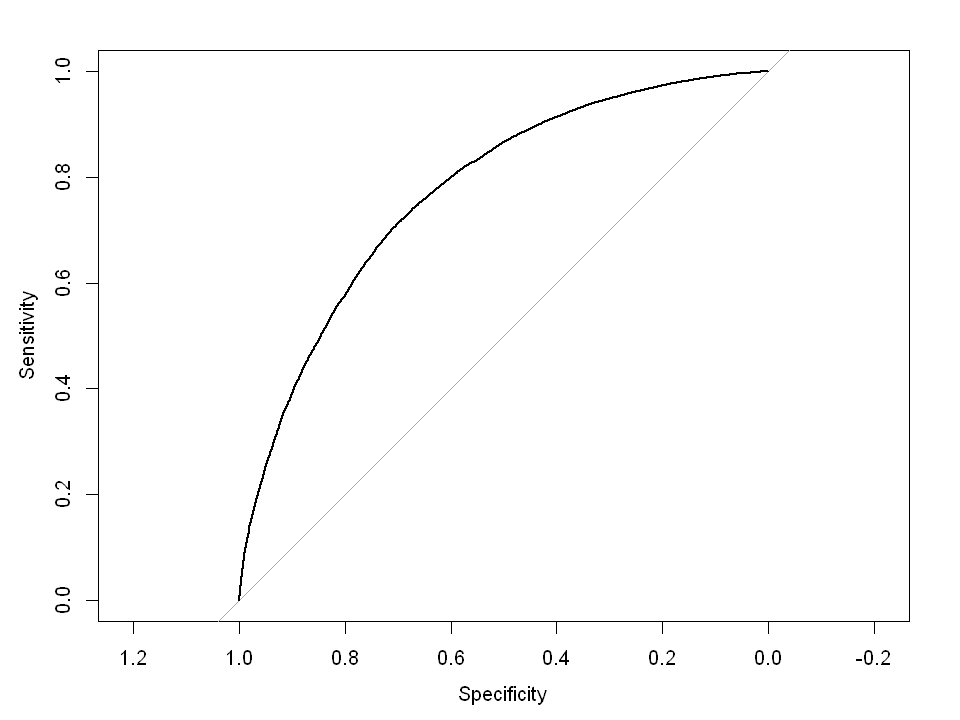

In [253]:
#curva roc con paquete ROCR
res_reglog_mod4_05roc<-roc(enigh_t_mod4_train_t$ingresotrim,as.vector(res_reglog_mod4_05$fitted.values))
plot(res_reglog_mod4_05roc)
auc(res_reglog_mod4_05roc)

In [254]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod4_05_pred_test<-predict(res_reglog_mod4_05,newdata=enigh_t_mod4_test_t,type="response")
table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_05_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  2629  742
            2  2377 3519

In [255]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_05_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28369483 0.08006906
            2 0.25650156 0.37973454

En este caso baja la capacidad de predicción, mantener entidad.

### Resultados:

modelo 4, regresión 1: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Entidad_Federativa+Ambito+casa_propia

In [256]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_01_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones     FALSE      TRUE
            1 0.2843423 0.0794216
            2 0.2189490 0.4172871

modelo 4, regresión 2: <br>
ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+Entidad_Federativa+Ambito+casa_propia

In [257]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28391065 0.07985324
            2 0.21894896 0.41728715

modelo 4, regresión 3: <br>
ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+Entidad_Federativa+Ambito+casa_propia

In [258]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_03_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28412647 0.07963742
            2 0.21970433 0.41653178

modelo 4, regresión 4: <br>
ingresotrim ~ edad+hor_1+focos_inca+focos_ahor+Entidad_Federativa+Ambito+casa_propia

In [259]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_04_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28401856 0.07974533
            2 0.21959642 0.41663969

modelo 4, regresión 5: <br>
ingresotrim ~ edad+hor_1+focos_inca+focos_ahor+Ambito+casa_propia

In [260]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_05_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28369483 0.08006906
            2 0.25650156 0.37973454

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

+ AIC mod1 reg 01: 38080
+ AIC mod1 reg 02: 38106
+ AIC mod1 reg 03: 38105
+ AIC mod1 reg 04: 38110
+ AIC mod1 reg 05: 40232

en cuanto Akaike, convienen los modelos 1 o 3 por menor Akaike (AIC)

Areas bajo la curva:

modelo 4, regresión 1: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Entidad_Federativa+Ambito+casa_propia

In [261]:
auc(res_reglog_mod4_01roc)

Area under the curve: 0.8026

modelo 4, regresión 2: <br>
ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+Entidad_Federativa+Ambito+casa_propia

In [262]:
auc(res_reglog_mod4_02roc)

Area under the curve: 0.8022

modelo 4, regresión 3: <br>
ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+Entidad_Federativa+Ambito+casa_propia

In [263]:
auc(res_reglog_mod4_03roc)

Area under the curve: 0.8022

modelo 4, regresión 4: <br>
ingresotrim ~ edad+hor_1+focos_inca+focos_ahor+Entidad_Federativa+Ambito+casa_propia

In [264]:
auc(res_reglog_mod4_04roc)

Area under the curve: 0.8026

modelo 4, regresión 5: <br>
ingresotrim ~ edad+hor_1+focos_inca+focos_ahor+Ambito+casa_propia

In [265]:
auc(res_reglog_mod4_05roc)

Area under the curve: 0.7733

In [266]:
options(repr.plot.width=8, repr.plot.height=6)#esta línea sólo se ejecuta para jupyterlab con R

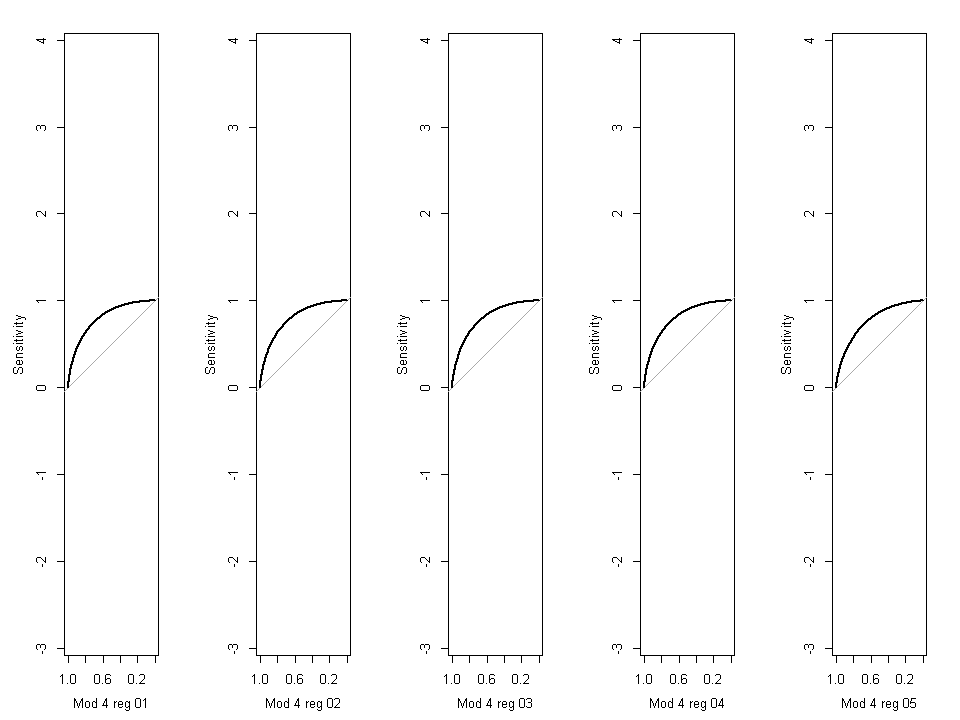

In [267]:
par(mfcol=c(1,5))#subplots
#par(cex=1)
plot(res_reglog_mod4_01roc,xlab="Mod 4 reg 01")
plot(res_reglog_mod4_02roc,xlab="Mod 4 reg 02")
plot(res_reglog_mod4_03roc,xlab="Mod 4 reg 03")
plot(res_reglog_mod4_04roc,xlab="Mod 4 reg 04")
plot(res_reglog_mod4_05roc,xlab="Mod 4 reg 05")


**CONCLUSION**:MODELO 4 REGRESIÓN 4, pues tot hom y tot muj se quitaron por no significativas

# MODELO 5: QUITANDO AMBAS VARIABLES : HIJOS VIV Y HOR_1

## Generando la base para este modelo

In [268]:
enigh_t_mod5<-enigh_t[,-c(4,5)]

In [269]:
head(enigh_t_mod5)

folioviv,ingresotrim,edad,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003801,2,33,0,3,8,1,1,Aguascalientes,Urbano,Renta
100003802,2,29,0,0,7,1,1,Aguascalientes,Urbano,Renta
100003803,2,47,20,0,17,2,4,Aguascalientes,Urbano,Propia
100003804,2,29,0,3,10,0,3,Aguascalientes,Urbano,Renta
100003805,2,55,7,0,12,2,0,Aguascalientes,Urbano,Propia
100010401,2,66,16,10,10,2,3,Aguascalientes,Urbano,Propia


In [270]:
names(enigh_t_mod5)

[1] "folioviv"           "ingresotrim"        "edad"              
 [4] "antiguedad"         "focos_inca"         "focos_ahor"        
 [7] "tot_hom"            "tot_muj"            "Entidad_Federativa"
[10] "Ambito"             "casa_propia"

## Plantando semilla y dividiendo la base en train y test

In [271]:
#insertando la semilla
set.seed(123972)
#obteniendo el 80% de los 66845 datos
66845*.8

#División de la base en 80% ajuste y 20% test
muestra<-sample(1:nrow(enigh),(nrow(enigh_t_mod5)*.8))
enigh_t_mod5_train<-enigh_t_mod5[muestra,]
enigh_t_mod5_test<-enigh_t_mod5[-muestra,]

[1] 53476

In [272]:
#asignandolas e forma de una tibble
enigh_t_mod5_train_t <- as_tibble(enigh_t_mod5_train)
enigh_t_mod5_test_t <- as_tibble(enigh_t_mod5_test)

In [273]:
#para que las imprima en forma de tibble
head(enigh_t_mod5_train_t)
head(enigh_t_mod5_test_t)

folioviv,ingresotrim,edad,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
2801907806,2,44,20,1,3,4,1,Tamaulipas,Urbano,Propia
1504414702,2,58,30,0,10,2,2,Estado de Mexico,Urbano,Propia
806716906,2,58,0,0,0,1,2,Chihuahua,Urbano,Propia
2760440001,1,37,15,0,12,3,3,Tabasco,Rural,Propia
860699511,2,75,20,0,4,1,1,Chihuahua,Rural,Propia
920370602,2,65,70,0,8,1,1,Ciudad de México,Urbano,Propia


folioviv,ingresotrim,edad,antiguedad,focos_inca,focos_ahor,tot_hom,tot_muj,Entidad_Federativa,Ambito,casa_propia
100003804,2,29,0,3,10,0,3,Aguascalientes,Urbano,Renta
100031903,2,54,40,6,0,3,1,Aguascalientes,Urbano,Propia
100062603,2,36,0,0,3,1,5,Aguascalientes,Urbano,Renta
100068001,1,73,51,0,6,1,1,Aguascalientes,Urbano,Propia
100068006,2,30,0,0,8,2,1,Aguascalientes,Urbano,Renta
100074205,2,25,0,0,6,2,1,Aguascalientes,Urbano,Renta


## Búsqueda del mejor modelo:

In [274]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 1, todas las variables (menos hijos_viv ni hor_1)

# Ajustando la regresión logística

res_reglog_mod5_01<-glm(ingresotrim ~ edad+antiguedad+focos_inca+focos_ahor+tot_hom+
                    tot_muj+Entidad_Federativa+Ambito+casa_propia,family=binomial(),data=enigh_t_mod5_train_t) 
summary(res_reglog_mod5_01)


Call:
glm(formula = ingresotrim ~ edad + antiguedad + focos_inca + 
    focos_ahor + tot_hom + tot_muj + Entidad_Federativa + Ambito + 
    casa_propia, family = binomial(), data = enigh_t_mod5_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.6061  -0.9444   0.4745   0.8813   2.4973  

Coefficients:
                                                    Estimate Std. Error z value
(Intercept)                                        1.5266850  0.0732511  20.842
edad                                              -0.0465039  0.0007577 -61.377
antiguedad                                        -0.0026945  0.0007036  -3.830
focos_inca                                         0.1302186  0.0054507  23.890
focos_ahor                                         0.2028737  0.0037091  54.697
tot_hom                                            0.0509793  0.0087882   5.801
tot_muj                                           -0.0754891  0.0084260  -8.959
Entidad_FederativaBaja Cali

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.788

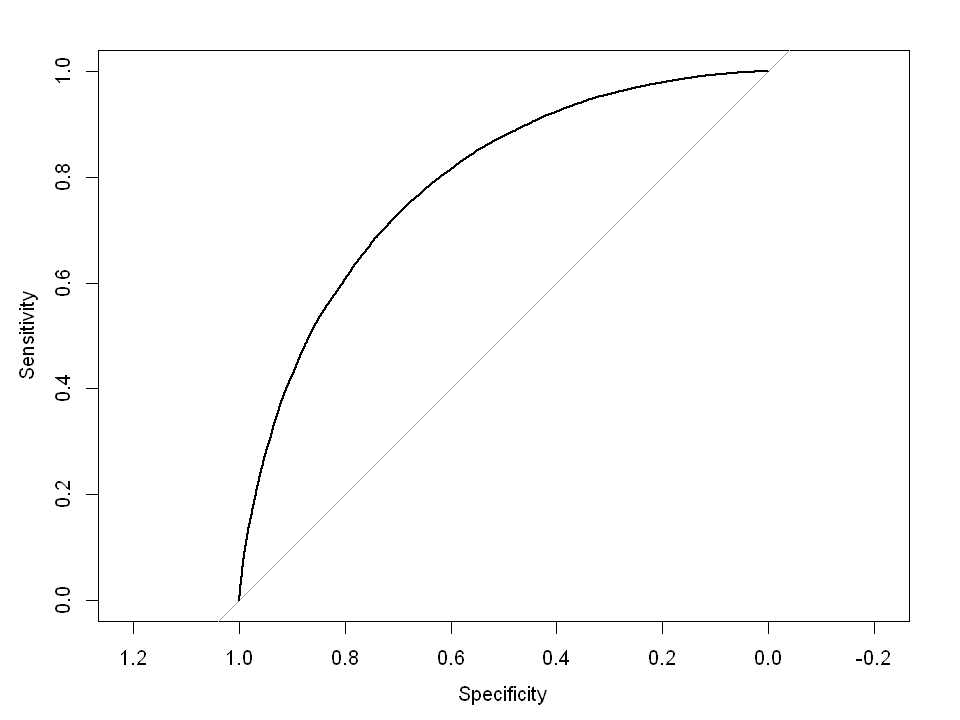

In [275]:
#curva roc con paquete ROCR
res_reglog_mod5_01roc<-roc(enigh_t_mod5_train_t$ingresotrim,as.vector(res_reglog_mod5_01$fitted.values))
plot(res_reglog_mod5_01roc)
auc(res_reglog_mod5_01roc)

In [276]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod5_01_pred_test<-predict(res_reglog_mod5_01,newdata=enigh_t_mod5_test_t,type="response")
table(enigh_t_mod5_test_t$ingresotrim,res_reglog_mod5_01_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  4530  880
            2  3681 4278

In [277]:
prop.table(table(enigh_t_mod5_test_t$ingresotrim,res_reglog_mod5_01_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.33884359 0.06582392
            2 0.27533847 0.31999402

En este caso, todas las variables resultaron significativas, probar el modelo sin entidad, por muchas variables.

In [278]:
##se inicia con la busqueda del mejor modelo de predicción de los datos
#regresión 2, sin entidad

# Ajustando la regresión logística

res_reglog_mod5_02<-glm(ingresotrim ~ edad+antiguedad+focos_inca+focos_ahor+tot_hom+
                    tot_muj+Ambito+casa_propia,family=binomial(),data=enigh_t_mod5_train_t) 
summary(res_reglog_mod5_02)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = ingresotrim ~ edad + antiguedad + focos_inca + 
    focos_ahor + tot_hom + tot_muj + Ambito + casa_propia, family = binomial(), 
    data = enigh_t_mod5_train_t)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -1.0008   0.5190   0.9223   2.3122  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       1.1791546  0.0452835  26.039  < 2e-16 ***
edad             -0.0452852  0.0007375 -61.405  < 2e-16 ***
antiguedad       -0.0021060  0.0006834  -3.081  0.00206 ** 
focos_inca        0.1513017  0.0053095  28.496  < 2e-16 ***
focos_ahor        0.2114692  0.0036560  57.841  < 2e-16 ***
tot_hom           0.0372790  0.0085602   4.355 1.33e-05 ***
tot_muj          -0.0986250  0.0082001 -12.027  < 2e-16 ***
AmbitoUrbano      0.5474609  0.0210561  26.000  < 2e-16 ***
casa_propiaRenta  0.3902395  0.0343080  11.375  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion paramete

Setting levels: control = 1, case = 2
Setting direction: controls < cases


Area under the curve: 0.7664

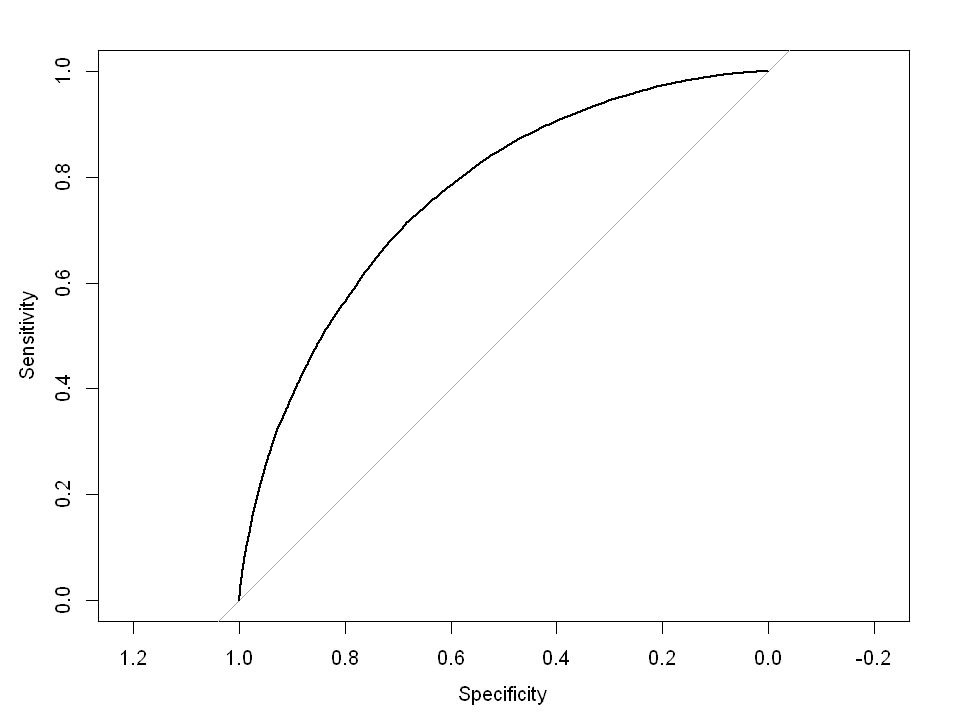

In [279]:
#curva roc con paquete ROCR
res_reglog_mod5_02roc<-roc(enigh_t_mod5_train_t$ingresotrim,as.vector(res_reglog_mod5_02$fitted.values))
plot(res_reglog_mod5_02roc)
auc(res_reglog_mod5_02roc)

In [280]:
#probando el modelo res_reglog_mod1_01_pred_test en los datos de prueba (conjunto test)
res_reglog_mod5_02_pred_test<-predict(res_reglog_mod5_02,newdata=enigh_t_mod5_test_t,type="response")
table(enigh_t_mod5_test_t$ingresotrim,res_reglog_mod5_02_pred_test>.7,dnn = c("observaciones", "predicciones"))

             predicciones
observaciones FALSE TRUE
            1  4601  809
            2  4093 3866

In [281]:
prop.table(table(enigh_t_mod5_test_t$ingresotrim,res_reglog_mod5_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34415439 0.06051313
            2 0.30615603 0.28917645

disminuye de una forma muy fuerte la predicción, mantener entidad en el modelo.

### Resultados:

modelo 5, regresión 1: <br>
ingresotrim ~ edad+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Entidad_Federativa+Ambito+casa_propia

In [282]:
prop.table(table(enigh_t_mod5_test_t$ingresotrim,res_reglog_mod5_01_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.33884359 0.06582392
            2 0.27533847 0.31999402

modelo 5, regresión 2: <br>
ingresotrim ~ edad+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Ambito+casa_propia

In [283]:
prop.table(table(enigh_t_mod5_test_t$ingresotrim,res_reglog_mod5_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34415439 0.06051313
            2 0.30615603 0.28917645

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

+ AIC mod1 reg 01: 58438
+ AIC mod1 reg 02: 60634

en cuanto Akaike, convienen los modelos 1 o 2 por menor Akaike (AIC)

Areas bajo la curva:

modelo 5, regresión 1: <br>
ingresotrim ~ edad+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Entidad_Federativa+Ambito+casa_propia

In [284]:
auc(res_reglog_mod5_01roc)

Area under the curve: 0.788

modelo 5, regresión 2: <br>
ingresotrim ~ edad+antiguedad+focos_inca+focos_ahor+tot_hom+tot_muj+Ambito+casa_propia

In [285]:
auc(res_reglog_mod5_02roc)

Area under the curve: 0.7664

In [286]:
options(repr.plot.width=8, repr.plot.height=6)#esta línea sólo se ejecuta para jupyterlab con R

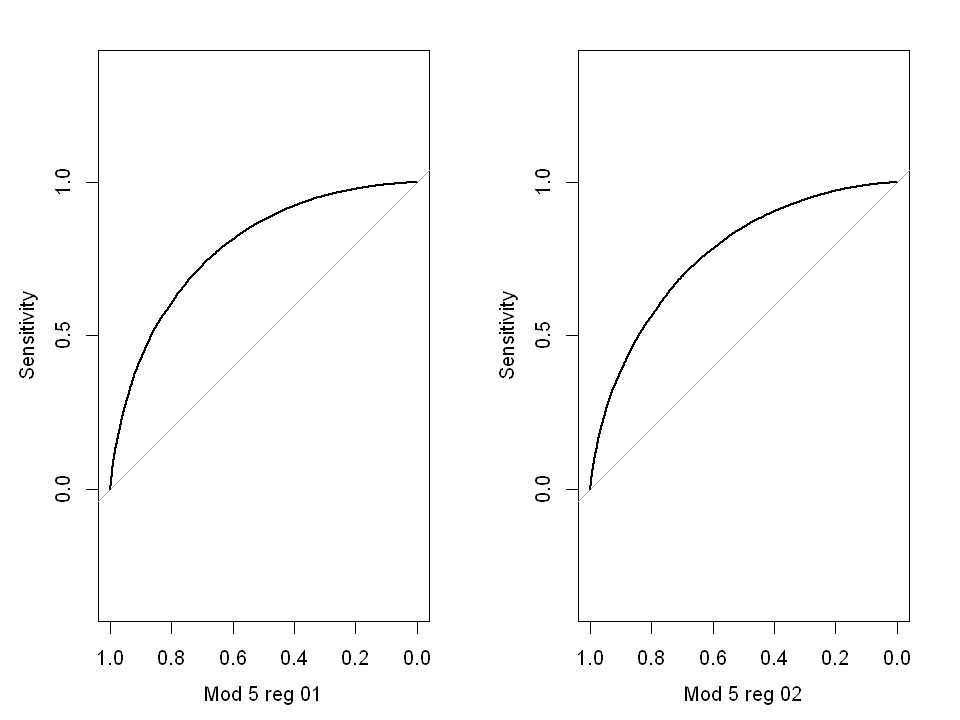

In [287]:
par(mfcol=c(1,2))#subplots
#par(cex=1)
plot(res_reglog_mod5_01roc,xlab="Mod 5 reg 01")
plot(res_reglog_mod5_02roc,xlab="Mod 5 reg 02")

# OK... ¿Y LUEGO? RESUMIENDO LA INFORMACIÓN:

## mejor del modelo 1:

### modelo1, regresión 2:

modelo 1, regresión 2: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+Entidad_Federativa+Ambito+casa_propia

In [288]:
prop.table(table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod1_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34273319 0.06193433
            2 0.25110330 0.34422919

+ AIC mod1 reg 02: 55794

Areas bajo la curva:

In [289]:
aucm1r2<-auc(res_reglog_mod1_02roc)
aucm1r2

Area under the curve: 0.8108

## mejor del modelo 2:

### modelo2, regresión 2:

modelo 2, regresión 2: <br>
ingresotrim ~ edad+hor_1+antiguedad+focos_inca+focos_ahor+tot_hom+Ambito+casa_propia

In [290]:
prop.table(table(enigh_t_mod1_test_t$ingresotrim,res_reglog_mod2_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.34265839 0.06200913
            2 0.25992969 0.33540280

+ AIC mod2 reg 02: 56813

Areas bajo la curva:

In [291]:
aucm2r2<-auc(res_reglog_mod2_02roc)
aucm2r2

Area under the curve: 0.8021

## mejor del modelo 3:

### modelo 3, regresión 2:

modelo 3, regresión 2: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+Entidad_Federativa+Ambito+casa_propia

In [292]:
prop.table(table(enigh_t_mod3_test_t$ingresotrim,res_reglog_mod3_02_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28488184 0.07888205
            2 0.21517212 0.42106399

+ AIC mod3 reg 02: 37753

Areas bajo la curva:

In [293]:
aucm3r2<-auc(res_reglog_mod3_02roc)
aucm3r2

Area under the curve: 0.807

## mejor del modelo 4:

### modelo 4, regresión 4:

modelo 4, regresión 4: <br>
ingresotrim ~ edad+hor_1+focos_inca+focos_ahor+Entidad_Federativa+Ambito+casa_propia

In [294]:
prop.table(table(enigh_t_mod4_test_t$ingresotrim,res_reglog_mod4_04_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.28401856 0.07974533
            2 0.21959642 0.41663969

+ AIC mod1 reg 02: 38110

Areas bajo la curva:

In [295]:
aucm4r4<-auc(res_reglog_mod4_04roc)
aucm4r4

Area under the curve: 0.8026

## mejor del modelo 5:

### modelo 5, regresión 1:

modelo 1, regresión 2: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+Entidad_Federativa+Ambito+casa_propia

In [296]:
prop.table(table(enigh_t_mod5_test_t$ingresotrim,res_reglog_mod5_01_pred_test>.7,dnn = c("observaciones", "predicciones")))

             predicciones
observaciones      FALSE       TRUE
            1 0.33884359 0.06582392
            2 0.27533847 0.31999402

+ AIC mod1 reg 02: 58438

Areas bajo la curva:

In [297]:
aucm5r1<-auc(res_reglog_mod5_01roc)
aucm5r1

Area under the curve: 0.788

## Comparando Gráficamente:

In [298]:
options(repr.plot.width=8, repr.plot.height=6)#esta línea sólo se ejecuta para jupyterlab con R

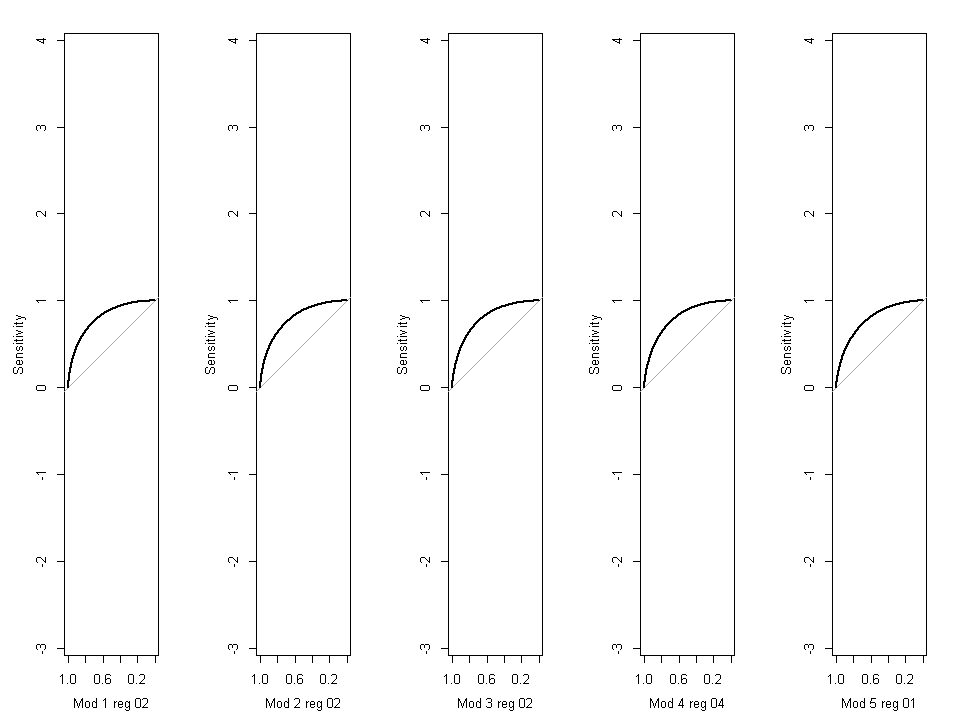

In [299]:
par(mfcol=c(1,5))#subplots
#par(cex=1)
plot(res_reglog_mod1_02roc,xlab="Mod 1 reg 02")
plot(res_reglog_mod2_02roc,xlab="Mod 2 reg 02")
plot(res_reglog_mod3_02roc,xlab="Mod 3 reg 02")
plot(res_reglog_mod4_04roc,xlab="Mod 4 reg 04")
plot(res_reglog_mod5_01roc,xlab="Mod 5 reg 01")


In [300]:
modelos<-c("Modelo 1","Modelo 2","Modelo 3","Modelo 4","Modelo 5")
regresiones<-c("regresión 2","regresión 2","regresión 2","regresión 4","regresión 5")
aucs<-c(aucm1r2,aucm2r2,aucm3r2,aucm4r4,aucm5r1)
aics<-c(55794,56813,37753,38110,58438)
resultados<-data.frame(modelos,regresiones,aucs,aics)

In [301]:
resultados

modelos,regresiones,aucs,aics
Modelo 1,regresión 2,0.8107549,55794
Modelo 2,regresión 2,0.8021148,56813
Modelo 3,regresión 2,0.8069830,37753
Modelo 4,regresión 4,0.8025933,38110
Modelo 5,regresión 5,0.7880028,58438


# EL MEJOR MODELO ES EL **MODELO 3, REGRESIÓN 2**

### modelo 3, regresión 2:

modelo 3, regresión 2: <br>
ingresotrim ~ edad+hor_1+hijos_viv+antiguedad+focos_inca+focos_ahor+tot_hom+Entidad_Federativa+Ambito+casa_propia

Por lo tanto, las mejores variables para predecir si algún hogar tiene un ingreso mayor a 12,000 son:

+ edad
+ hor_1
+ hijos_viv
+ antiguedad
+ focos_inca
+ focos_ahor
+ tot_hom
+ Entidad_Federativa
+ Ambito
+ casa_propia